In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import boxcox
from sklearn.feature_selection import mutual_info_regression

In [2]:
df_film = pd.read_csv('cinemas.csv') 

In [3]:
df_film.head()

Unnamed: 0  color      director_name  num_critic_for_reviews  duration  \
0           0  Color      James Cameron                   723.0     178.0   
1           1  Color     Gore Verbinski                   302.0     169.0   
2           2  Color         Sam Mendes                   602.0     148.0   
3           3  Color  Christopher Nolan                   813.0     164.0   
4           4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross  ... content_rating       budget  \
0                  1000.0  760505847.0  ...          PG-13  237000000.0   
1                 40000.0  309404152.0  ...          PG-13  300000000.0   
2                 11000.0  200074175.0  ...          PG-13  245000000.0   
3                 27000.0  448130642.0  ...          PG-13  250000000.0   
4                   131.0          NaN  ...            NaN          NaN   

  title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
0     2009.0                  936.0         7.9         1.78   
1     2007.0                 5000.0         7.1         2.35   
2     2015.0                  393.0         6.8         2.35   
3     2012.0                23000.0         8.5         2.35   
4        NaN                   12.0         7.1          NaN   

  movie_facebook_likes Unnamed: 28 war_symb_title point_symb_title  
0                33000         NaN              4                0  
1                    0         NaN              8                0  
2                85000         NaN              1                0  
3               164000         NaN              3                0  
4                    0         NaN              9                0  

[5 rows x 32 columns]

In [4]:
df_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5050 non-null   int64  
 1   color                      5031 non-null   object 
 2   director_name              4946 non-null   object 
 3   num_critic_for_reviews     5000 non-null   float64
 4   duration                   5035 non-null   float64
 5   director_facebook_likes    4946 non-null   float64
 6   actor_3_facebook_likes     5027 non-null   float64
 7   actor_2_name               5037 non-null   object 
 8   actor_1_facebook_likes     5043 non-null   float64
 9   gross                      4161 non-null   float64
 10  genres                     5050 non-null   object 
 11  actor_1_name               5043 non-null   object 
 12  movie_title                5050 non-null   object 
 13  num_voted_users            5050 non-null   objec

In [5]:
df_film.describe()

Unnamed: 0  num_critic_for_reviews     duration  \
count  5050.00000             5000.000000  5035.000000   
mean   2524.50000              140.167200   107.174578   
std    1457.95376              121.815619    25.192929   
min       0.00000                1.000000     7.000000   
25%    1262.25000               50.000000    93.000000   
50%    2524.50000              110.000000   103.000000   
75%    3786.75000              195.000000   118.000000   
max    5049.00000              813.000000   511.000000   

       director_facebook_likes  actor_3_facebook_likes  \
count              4946.000000             5027.000000   
mean                686.391630              664.526358   
std                2811.353082             2179.937100   
min                   0.000000                0.000000   
25%                   7.000000              133.000000   
50%                  49.000000              372.000000   
75%                 197.000000              636.000000   
max               23000.000000           100500.000000   

       actor_1_facebook_likes         gross  cast_total_facebook_likes  \
count             5043.000000  4.161000e+03                5050.000000   
mean              6551.834226  4.951350e+07                9688.141188   
std              15011.950367  9.658335e+07               18153.603823   
min                -32.000000  1.620000e+02                   0.000000   
25%                614.000000  5.333658e+06                1411.250000   
50%                986.000000  2.551750e+07                3086.000000   
75%              11000.000000  6.231888e+07               13740.500000   
max             640000.000000  4.444444e+09              656730.000000   

             budget     title_year  actor_2_facebook_likes   imdb_score  \
count  4.557000e+03    4942.000000             5037.000000  5050.000000   
mean   3.971317e+07    2042.540065             1650.540798     6.461802   
std    2.059827e+08    2816.518736             4039.812533     1.710715   
min    2.180000e+02    1916.000000                0.000000     1.600000   
25%    6.000000e+06    1999.000000              281.000000     5.800000   
50%    2.000000e+07    2005.000000              595.000000     6.600000   
75%    4.450000e+07    2011.000000              918.000000     7.200000   
max    1.221550e+10  200000.000000           137000.000000    98.000000   

       aspect_ratio  movie_facebook_likes  Unnamed: 28  war_symb_title  \
count   4721.000000           5050.000000     2.000000     5050.000000   
mean       2.217354           7517.337822   212.001500        2.214851   
std        1.370455          19308.667793   299.811154        1.715557   
min        1.000000              0.000000     0.003000        0.000000   
25%        1.850000              0.000000   106.002250        1.000000   
50%        2.350000            166.000000   212.001500        2.000000   
75%        2.350000           3000.000000   318.000750        3.000000   
max       16.000000         349000.000000   424.000000       16.000000   

       point_symb_title  
count       5050.000000  
mean           0.007327  
std            0.113226  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            5.000000

Text(0.5, 1.0, 'The number of different types of data')

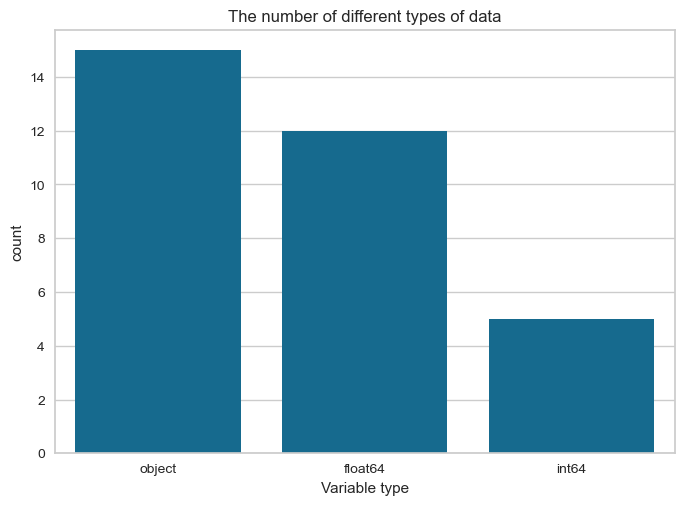

In [6]:
d_type = pd.DataFrame(df_film.dtypes.value_counts()).reset_index().rename(columns={'index':'Variable type', 0:'count'})    
barr_plot_dtype = sns.barplot(data = d_type, x = 'Variable type', y = 'count')
barr_plot_dtype.set_title('The number of different types of data')

## 1.Empty columns

In [8]:
df_film.isnull().sum()

Unnamed: 0                      0
color                          19
director_name                 104
num_critic_for_reviews         50
duration                       15
director_facebook_likes       104
actor_3_facebook_likes         23
actor_2_name                   13
actor_1_facebook_likes          7
gross                         889
genres                          0
actor_1_name                    7
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes       0
actor_3_name                   23
facenumber_in_poster           12
plot_keywords                 154
movie_imdb_link                 0
num_user_for_reviews           21
language                       14
country                         5
content_rating                308
budget                        493
title_year                    108
actor_2_facebook_likes         13
imdb_score                      0
aspect_ratio                  329
movie_facebook_likes            0
Unnamed: 28   

<Axes: title={'center': 'The number of missing value'}, xlabel='Name of feature'>

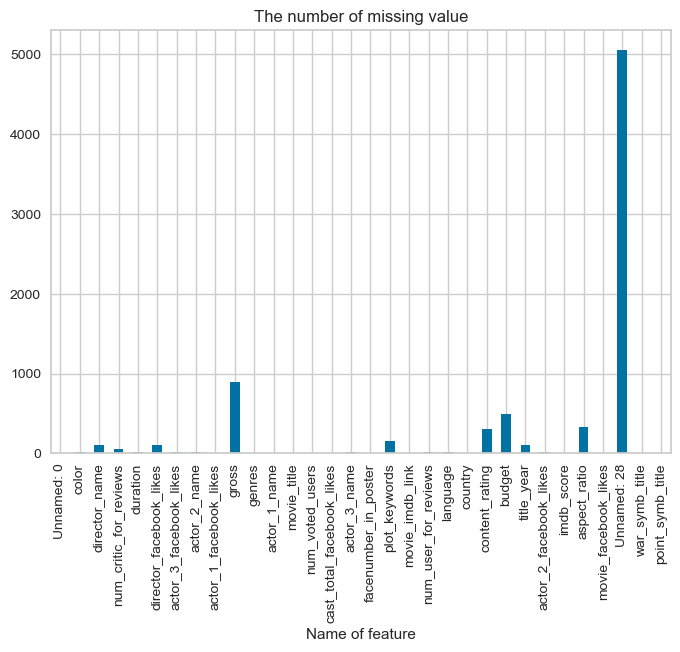

In [9]:
df_numb_miss_val = df_film.isnull().sum().reset_index().rename(columns={'index':'Name of feature', 0:'count'})
df_numb_miss_val.plot(kind='bar', x='Name of feature', y='count',legend=None, title='The number of missing value')

In [10]:
###If there are columns with more than 5% missing values

In [11]:
threshold_miss_val = 5

In [12]:
col_less_theresh_miss_val = df_film.columns[(df_film.notnull().sum()*100/df_film.shape[0]) < threshold_miss_val]
col_less_theresh_miss_val

Index(['Unnamed: 28'], dtype='object')

In [13]:
###check if value of 'Unnamed: 28' could belong to another column
df_film[df_film['Unnamed: 28'].notnull()]

Unnamed: 0  color       director_name  num_critic_for_reviews  duration  \
1761        1761  Color           IC Wiener                   666.0      69.0   
5038        5038  Color  Thomas L. Phillips                    13.0      82.0   

      director_facebook_likes  actor_3_facebook_likes actor_2_name  \
1761                     17.0                100500.0      Nibbler   
5038                    120.0                    84.0   Joe Coffey   

      actor_1_facebook_likes      gross  ... content_rating      budget  \
1761                   -32.0  1111111.0  ...              R  37000001.0   
5038                   785.0        NaN  ...            USA         NaN   

     title_year actor_2_facebook_likes  imdb_score aspect_ratio  \
1761     1999.0                  102.0         6.9         1.85   
5038   200000.0                 2012.0        98.0         5.40   

     movie_facebook_likes Unnamed: 28 war_symb_title point_symb_title  
1761                  123       0.003              1                0  
5038                   16     424.000              3                0  

[2 rows x 32 columns]

In [14]:
df_film.drop(col_less_theresh_miss_val, axis = 1, inplace = True)

In [15]:
df_film

Unnamed: 0  color      director_name  num_critic_for_reviews  duration  \
0              0  Color      James Cameron                   723.0     178.0   
1              1  Color     Gore Verbinski                   302.0     169.0   
2              2  Color         Sam Mendes                   602.0     148.0   
3              3  Color  Christopher Nolan                   813.0     164.0   
4              4    NaN        Doug Walker                     NaN       NaN   
...          ...    ...                ...                     ...       ...   
5045        5045  Color        Scott Smith                     1.0      87.0   
5046        5046  Color                NaN                    43.0      43.0   
5047        5047  Color   Benjamin Roberds                    13.0      76.0   
5048        5048  Color        Daniel Hsia                    14.0     100.0   
5049        5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross  ... country content_rating  \
0                     1000.0  760505847.0  ...     USA          PG-13   
1                    40000.0  309404152.0  ...     USA          PG-13   
2                    11000.0  200074175.0  ...      UK          PG-13   
3                    27000.0  448130642.0  ...     USA          PG-13   
4                      131.0          NaN  ...     NaN            NaN   
...                      ...          ...  ...     ...            ...   
5045                   637.0          NaN  ...  Canada            NaN   
5046                   841.0          NaN  ...     USA          TV-14   
5047                     0.0          NaN  ...     USA            NaN   
5048                   946.0      10443.0  ...     USA          PG-13   
5049                    86.0      85222.0  ...     USA             PG   

           budget title_year  actor_2_facebook_likes imdb_score aspect_ratio  \
0     237000000.0     2009.0                   936.0        7.9         1.78   
1     300000000.0     2007.0                  5000.0        7.1         2.35   
2     245000000.0     2015.0                   393.0        6.8         2.35   
3     250000000.0     2012.0                 23000.0        8.5         2.35   
4             NaN        NaN                    12.0        7.1          NaN   
...           ...        ...                     ...        ...          ...   
5045          NaN     2013.0                   470.0        7.7          NaN   
5046          NaN        NaN                   593.0        7.5        16.00   
5047       1400.0     2013.0                     0.0        6.3          NaN   
5048          NaN     2012.0                   719.0        6.3         2.35   
5049       1100.0     2004.0                    23.0        6.6         1.85   

     movie_facebook_likes war_symb_title point_symb_title  
0                   33000              4                0  
1                       0              8                0  
2                   85000              1                0  
3                  164000              3                0  
4     

## 2. Delete column duplicates
### Checking if there are colomns have the same value as index -> drop them

In [17]:
df_film.apply(lambda col: (col == df_film.index).all())

Unnamed: 0                    True
color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes

In [18]:
col_equal_index = df_film.columns[df_film.apply(lambda col: (col == df_film.index).all())]
col_equal_index

Index(['Unnamed: 0'], dtype='object')

In [19]:
df_film.drop(col_equal_index, axis =1, inplace = True)

In [20]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5045  Color        Scott Smith                     1.0      87.0   
5046  Color                NaN                    43.0      43.0   
5047  Color   Benjamin Roberds                    13.0      76.0   
5048  Color        Daniel Hsia                    14.0     100.0   
5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5045                   637.0          NaN                     Comedy|Drama   
5046                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5047                     0.0          NaN            Drama|Horror|Thriller   
5048                   946.0      10443.0             Comedy|Drama|Romance   
5049                    86.0      85222.0                      Documentary   

      ... country content_rating       budget  title_year  \
0     ...     USA          PG-13  237000000.0      2009.0   
1     ...     USA          PG-13  300000000.0      2007.0   
2     ...      UK          PG-13  245000000.0      2015.0   
3     ...     USA          PG-13  250000000.0      2012.0   
4     ...     NaN            NaN          NaN         NaN   
...   ...     ...            ...          ...         ...   
5045  ...  Canada            NaN          NaN      2013.0   
5046  ...     USA          TV-14          NaN         NaN   
5047  ...     USA            NaN       1400.0      2013.0   
5048  ...     USA          PG-13          NaN      2012.0   
5049  ...     USA             PG       1100.0      2004.0   

     actor_2_facebook_likes imdb_score aspect_ratio movie_facebook_likes  \
0                     936.0        7.9         1.78                33000   
1                    5000.0        7.1         2.35                    0   
2                     393.0        6.8         2.35                85000   
3                   23000.0        8.5         2.35               164000   
4                      12.0        7.1          NaN                    0   
...                     ...        ...          ...                  ...   
5045                  470.0        7.7          NaN                   84   
5046      

## 3.Check if there are empty rows / the number of fill columns in the row less than X% (threshold)

#### Check if there are rows which have more that 90% of nan values

In [23]:
threshold_row = df_film.shape[1] * 90 / 100
threshold_row

27.0

In [24]:
df_film[df_film.isna().sum(axis = 1) > threshold_row]

Empty DataFrame
Columns: [color, director_name, num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_2_name, actor_1_facebook_likes, gross, genres, actor_1_name, movie_title, num_voted_users, cast_total_facebook_likes, actor_3_name, facenumber_in_poster, plot_keywords, movie_imdb_link, num_user_for_reviews, language, country, content_rating, budget, title_year, actor_2_facebook_likes, imdb_score, aspect_ratio, movie_facebook_likes, war_symb_title, point_symb_title]
Index: []

[0 rows x 30 columns]

## 4.Check format of columns

#### Check if any columns get non-printable characters

In [27]:
df_film.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'point_symb_title'],
      dtype='object')

In [28]:
object_columns = df_film.select_dtypes(include = ['object'])

In [29]:
object_columns

color      director_name      actor_2_name  \
0     Color      James Cameron  Joel David Moore   
1     Color     Gore Verbinski     Orlando Bloom   
2     Color         Sam Mendes      Rory Kinnear   
3     Color  Christopher Nolan    Christian Bale   
4       NaN        Doug Walker        Rob Walker   
...     ...                ...               ...   
5045  Color        Scott Smith     Daphne Zuniga   
5046  Color                NaN     Valorie Curry   
5047  Color   Benjamin Roberds     Maxwell Moody   
5048  Color        Daniel Hsia     Daniel Henney   
5049  Color           Jon Gunn  Brian Herzlinger   

                               genres     actor_1_name  \
0     Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1            Action|Adventure|Fantasy      Johnny Depp   
2           Action|Adventure|Thriller  Christoph Waltz   
3                     Action|Thriller        Tom Hardy   
4                         Documentary      Doug Walker   
...                               ...              ...   
5045                     Comedy|Drama      Eric Mabius   
5046     Crime|Drama|Mystery|Thriller      Natalie Zea   
5047            Drama|Horror|Thriller      Eva Boehnke   
5048             Comedy|Drama|Romance        Alan Ruck   
5049                      Documentary      John August   

                                      movie_title num_voted_users  \
0                                         Avatar           886204   
1       Pirates of the Caribbean: At World's End           471220   
2                                        Spectre           275868   
3                          The Dark Knight Rises          1144337   
4     Star Wars: Episode VII - The Force Awakens                8   
...                                           ...             ...   
5045                     Signed Sealed Delivered              629   
5046                               The Following            73839   
5047                        A Plague So Pleasant               38   
5048                            Shanghai Calling             1255   
5049                           My Date with Drew             4285   

              actor_3_name facenumber_in_poster  \
0                Wes Studi                    0   
1           Jack Davenport                    0   
2         Stephanie Sigman                    1   
3     Joseph Gordon-Levitt                    0   
4                      NaN                    0   
...                    ...                  ...   
5045          Crystal Lowe                    2   
5046         Sam Underwood                    1   
5047        David Chandler                    0   
5048           Eliza Coupe                    5   
5049              Jon Gunn                    0   

                                          plot_keywords  \
0                avatar|future|marine|native|paraplegic   
1     goddess|marriage ceremony|marriage proposal|pi...   
2                   bomb|espionage|sequel|spy|terrorist   
3     deception|imprisonment|lawlessness|police offi...   
4                                                   NaN   
...                                                 ...   
5045             fraud|postal worker|prison|theft|trial   
5046       cult|fbi|hideout|prison escape|serial killer   
5047                                                NaN   
5048                                                NaN   
5049  actress name in title|crush|date|four word tit...   

                                        movie_imdb_link num_user_for_reviews  \
0     http://www.imdb.com/title/tt0499549/?ref_=fn_t...                 3054   
1     http://www.imdb.com/title/tt0449088/?ref_=fn_t...                 1238   
2     http://www.imdb.com/title/tt2379713/?ref_=fn_t...                  994   
3     http://www.imdb.com/title/tt1345836/?ref_=fn_t...                 2701   
4     http://www.imdb.com/title/tt5289954/?ref_=fn_t...                  NaN   
...                                                 .

In [30]:
object_columns.drop(['num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews'], axis = 1, inplace = True)

In [31]:
object_columns.shape[1]

12

In [32]:
def column_contain_spec_character(col):
    return col.apply(lambda text: str(text).isprintable()).all()

In [33]:
col_with_spec_char = object_columns.apply(column_contain_spec_character)

In [34]:
col_with_spec_char

color               True
director_name       True
actor_2_name        True
genres              True
actor_1_name        True
movie_title        False
actor_3_name        True
plot_keywords       True
movie_imdb_link     True
language            True
country             True
content_rating      True
dtype: bool

In [35]:
col_with_spec_char[~col_with_spec_char].index

Index(['movie_title'], dtype='object')

In [36]:
df_film['movie_title'].unique()

array(['Avatar\xa0', "Pirates of the Caribbean: At World's End\xa0",
       'Spectre\xa0', ..., 'A Plague So Pleasant\xa0',
       'Shanghai Calling\xa0', 'My Date with Drew\xa0'], dtype=object)

In [37]:
df_film['movie_title'] = df_film['movie_title'].str.replace('\xa0', '')

In [38]:
df_film['movie_title'].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'A Plague So Pleasant', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

#### Convert non-numeric columns to numeric (num_voted_users)

In [40]:
### In the next cell to use isnumeric() it's necessary to be sure that all values are str (even nan)
df_film['num_voted_users'] = df_film['num_voted_users'].astype(str)

In [41]:
df_film[~df_film['num_voted_users'].str.isnumeric()]['num_voted_users'].index

Index([5038], dtype='int64')

##### Move values in one row to the left (because the name of the title movie was put to the next column)

In [43]:
df_film.loc[5038]

color                                                                    Color
director_name                                               Thomas L. Phillips
num_critic_for_reviews                                                    13.0
duration                                                                  82.0
director_facebook_likes                                                  120.0
actor_3_facebook_likes                                                    84.0
actor_2_name                                                        Joe Coffey
actor_1_facebook_likes                                                   785.0
gross                                                                      NaN
genres                                                  Comedy|Horror|Thriller
actor_1_name                                                     Julianna Pitt
movie_title                                                          Sanctuary
num_voted_users                                     

In [44]:
df_film.loc[[5038], 'movie_title'] = (df_film.loc[[5038], 'movie_title'].values[0] + '; ' + df_film.loc[[5038], 'num_voted_users'].values[0])

In [45]:
df_film.loc[[5038], 'movie_title'] = df_film.loc[[5038], 'movie_title'].str.replace('\xa0', '')

In [46]:
df_film.loc[[5038], 'movie_title'].values[0]

'Sanctuary; Quite a Conundrum'

In [47]:
name_col = df_film.columns

In [48]:
name_col

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'point_symb_title'],
      dtype='object')

In [49]:
name_col.get_loc('num_voted_users')

12

In [50]:
name_col = name_col[name_col.get_loc('num_voted_users'):]

In [51]:
name_col

Index(['num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'point_symb_title'],
      dtype='object')

In [52]:
shifted_values = df_film.loc[5038, name_col].shift(-1)

In [53]:
shifted_values

num_voted_users                                                            133
cast_total_facebook_likes                                                 1111
actor_3_name                                                        John Lucas
facenumber_in_poster                                                       NaN
plot_keywords                    nudity|party|pirate|swimsuit|three word title
movie_imdb_link              http://www.imdb.com/title/tt2049518/?ref_=fn_t...
num_user_for_reviews                                                         8
language                                                               English
country                                                                    USA
content_rating                                                             NaN
budget                                                                200000.0
title_year                                                              2012.0
actor_2_facebook_likes                              

In [54]:
type(shifted_values['cast_total_facebook_likes'])

str

In [55]:
shifted_values['cast_total_facebook_likes'] = pd.to_numeric(shifted_values['cast_total_facebook_likes'])

In [56]:
type(shifted_values['cast_total_facebook_likes'])

numpy.int64

In [57]:
df_film.loc[5038, name_col] = shifted_values

In [58]:
df_film.loc[5038]

color                                                                    Color
director_name                                               Thomas L. Phillips
num_critic_for_reviews                                                    13.0
duration                                                                  82.0
director_facebook_likes                                                  120.0
actor_3_facebook_likes                                                    84.0
actor_2_name                                                        Joe Coffey
actor_1_facebook_likes                                                   785.0
gross                                                                      NaN
genres                                                  Comedy|Horror|Thriller
actor_1_name                                                     Julianna Pitt
movie_title                                       Sanctuary; Quite a Conundrum
num_voted_users                                     

In [59]:
df_film['num_voted_users'] = df_film['num_voted_users'].astype(str)
df_film[~df_film['num_voted_users'].str.isnumeric()].index

Index([], dtype='int64')

In [60]:
df_film['num_voted_users'] = pd.to_numeric(df_film['num_voted_users'])

#### Convert non-numeric columns to numeric (facenumber_in_poster)

In [62]:
df_film['facenumber_in_poster'] = pd.to_numeric(df_film['facenumber_in_poster'])

In [63]:
type(df_film.loc[248, 'facenumber_in_poster'])

numpy.float64

#### Convert non-numeric columns to numeric (num_user_for_reviews)

In [65]:
df_film['num_user_for_reviews'] = pd.to_numeric(df_film['num_user_for_reviews'])

In [66]:
type(df_film.loc[248, 'facenumber_in_poster'])

numpy.float64

## 5.Check if the column has mostly 1 value (e.g only 0)

In [68]:
unique_counts = df_film.nunique()
unique_counts

color                           3
director_name                2400
num_critic_for_reviews        529
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        907
actor_2_name                 3034
actor_1_facebook_likes        880
gross                        4037
genres                        916
actor_1_name                 2099
movie_title                  4918
num_voted_users              4828
cast_total_facebook_likes    3979
actor_3_name                 3523
facenumber_in_poster           19
plot_keywords                4762
movie_imdb_link              4920
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        441
title_year                     92
actor_2_facebook_likes        917
imdb_score                     79
aspect_ratio                   23
movie_facebook_likes          876
war_symb_title                 15
point_symb_tit

<Axes: title={'center': 'Number of Unique Values in Each Column'}>

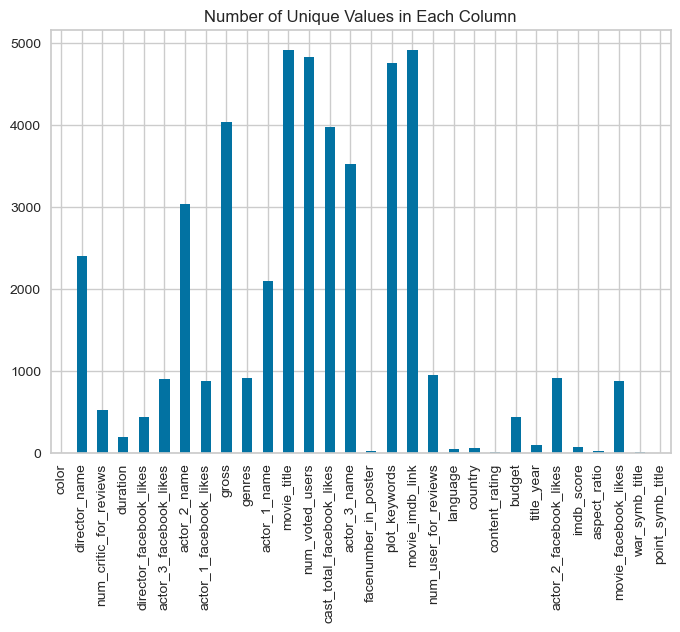

In [69]:
unique_counts.plot(kind='bar', x='Name of feature', y='count',legend=None, title='Number of Unique Values in Each Column')

In [70]:
df_film['point_symb_title'].value_counts()

point_symb_title
0.0    5019
1.0      27
3.0       1
2.0       1
5.0       1
Name: count, dtype: int64

In [71]:
df_film['point_symb_title'].unique()

array([ 0.,  1.,  3.,  2.,  5., nan])

In [72]:
df_film[df_film['point_symb_title'] != 0]

color        director_name  num_critic_for_reviews  duration  \
488              Color           Tim Burton                   132.0     106.0   
876              Color           Peter Lord                   238.0      88.0   
903    Black and White         Baz Luhrmann                   209.0     127.0   
914              Color       Phyllida Lloyd                   238.0     108.0   
1136             Color    Lawrence Kasanoff                    12.0      91.0   
1533             Color         Danny Cannon                    90.0     118.0   
1706             Color            Mike Disa                    77.0      86.0   
1934             Color    Richard Fleischer                    79.0     160.0   
2036             Color       Robert Luketic                    84.0      95.0   
2096             Color    Steven Soderbergh                   248.0     108.0   
2108             Color           Ethan Coen                   423.0     106.0   
2242             Color                  NaN                     6.0      24.0   
2480             Color         Cory Edwards                   142.0      80.0   
2495             Color         John Hoffman                    52.0      87.0   
3108             Color           Carol Reed                    56.0     153.0   
3152             Color    Robert Ben Garant                    89.0      84.0   
3155             Color          Tuck Tucker                    33.0      76.0   
3354             Color  Darren Lynn Bousman                   147.0     150.0   
3577   Black and White      Wolfgang Becker                   153.0     121.0   
3759             Color       Brian Dannelly                   121.0      92.0   
3905   Black and White        William Arntz                    74.0     109.0   
3986             Color         Jim Abrahams                   134.0      88.0   
4184             Color            Tom Hanks                    75.0     149.0   
4220             Color        Carmen Marron                     8.0     105.0   
4640             Color            Kat Coiro                    18.0     100.0   
4774             Color  Darren Lynn Bousman                    10.0      97.0   
4863             Color        Bill Plympton                    19.0      75.0   
4941  Green and Yellow           Aina Obama                   140.0     108.0   
4970             Color     Stephen Langford                     2.0      82.0   
4981             Color          Julie Davis                     5.0      86.0   
5038             Color   Thomas L. Phillips                    13.0      82.0   

      director_facebook_likes  actor_3_facebook_likes         actor_2_name  \
488                   13000.0                   733.0         Martin Short   
876                      91.0                   591.0        Russell Tovey   
903                    1000.0                   653.0        Kylie Minogue   
914                      58.0                   838.0         Meryl Streep   
1136                     11.0                   500.0         Larry Miller   
1533                     41.0                   577.0          Kuno Becker   
1706                      6.0                   843.0          Phil LaMarr   
1934                    130.0                   288.0     Richard Anderson   
2036                    126.0                   886.0            Gary Cole   
2096                      0.0                   690.0          Joel McHale   
2108                   1000.0                  1000.0       Channing Tatum   
2242                      NaN                     NaN                  NaN   
2480                     19.0                   854.0     Chazz Palminteri   
2495                      9.0                   503.0        Molly Shannon   
3108                     82.0                   139.0            Ron Moody   
3152                    134.0                   307.0        Thomas Lennon   
3155                     14.0                   636.0   Vincent Schiavelli   
3354                

#### Conclusion: the values in point_symb_title don't necessary

In [74]:
df_film.drop('point_symb_title', axis = 1, inplace = True)

In [75]:
df_film.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  language country  content_rating       budget title_year  \
0  English     USA           PG-13  237000000.0     2009.0   
1  English     USA           PG-13  300000000.0     2007.0   
2  English      UK           PG-13  245000000.0     2015.0   
3  English     USA           PG-13  250000000.0     2012.0   
4      NaN     NaN             NaN          NaN        NaN   

   actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                   936.0        7.9         1.78                 33000   
1                  5000.0        7.1         2.35                     0   
2                   393.0        6.8         2.35                 85000   
3                 23000.0        8.5         2.35                164000   
4                    12.0        7.1          NaN                     0   

  war_symb_title  
0              4  
1              8  
2              1  
3              3  
4              9  

[5 rows x 29 columns]

## 6.Delete rows duplicates

In [77]:
df_film[df_film.duplicated()]

color         director_name  num_critic_for_reviews  duration  \
137             Color           David Yates                   248.0     110.0   
187             Color           Bill Condon                   322.0     115.0   
204             Color          Hideaki Anno                     1.0     120.0   
303             Color            Joe Wright                   256.0     111.0   
389             Color            Josh Trank                   369.0     100.0   
395             Color             Rob Cohen                   187.0     106.0   
590             Color          Brett Ratner                   245.0     101.0   
656             Color        Paul Verhoeven                   196.0     113.0   
794             Color           Joss Whedon                   703.0     173.0   
1220            Color   Angelina Jolie Pitt                   322.0     137.0   
1305            Color         Paul McGuigan                   159.0     110.0   
1449            Color         Albert Hughes                   208.0     122.0   
2170            Color         Paul McGuigan                    98.0     114.0   
2293            Color              Frank Oz                   168.0      87.0   
2473            Color            Jon Cassar                    45.0      90.0   
2494  Black and White           Yimou Zhang                   283.0      80.0   
2534            Color           Neil Burger                   236.0     110.0   
2563            Color             Jon Lucas                    81.0     100.0   
2569            Color         Vic Armstrong                   169.0     110.0   
2620            Color        John Carpenter                   318.0     101.0   
2772            Color          Ole Bornedal                   264.0      92.0   
2778            Color        Stephen Frears                    51.0     119.0   
2799            Color            Shawn Levy                    69.0      88.0   
2972            Color      John Lee Hancock                   106.0     137.0   
3118            Color           Guy Ritchie                   151.0     104.0   
3346            Color          Herbert Ross                    60.0     107.0   
3453            Color           Paul Haggis                   287.0     115.0   
3481            Color  Michael Winterbottom                    71.0     115.0   
3730            Color      Tim Blake Nelson                    92.0      95.0   
3901            Color                   NaN                     9.0      60.0   
3916            Color            Wes Craven                   160.0     107.0   
4183            Color            Rob Zombie                   220.0     119.0   
4227            Color      William Friedkin                   138.0     104.0   
4283            Color       Kenneth Branagh                    85.0     150.0   
4314            Color       Bruce McCulloch                    52.0      85.0   
4409            Color           Yimou Zhang                   101.0      95.0   
4566            Color        Peter Cattaneo                   122.0      91.0   
4574            Color            Mel Brooks                    48.0      92.0   
4632            Color           Danny Boyle                   393.0     101.0   
4770            Color           Tamra Davis                   111.0      93.0   
4883            Color            Dan Curtis                     NaN      99.0   
4928            Color           Jason Stone                    48.0     108.0   
4944            Color         Paul Schrader                   130.0      93.0   
4952            Color         David Hewlett                     8.0      88.0   
4953            Color         David Hewlett                     8.0      88.0   
4954            Color         David Hewlett                     8.0      88.0   
4955            Color         David Hewlett                     8.0      88.0   
4956            Color         David Hewlett                     8.0      88.0   
4957            Color         David Hewlett    

In [78]:
df_film.drop_duplicates(inplace = True)

#### Check rows which have the same movie title

In [80]:
def find_nuniqu_col_movie_dupl(df_film):
    df_duplic_movie = df_film[df_film.duplicated('movie_title', keep = False)]
    #print(df_duplic_movie['movie_title'])
    
    def find_diff_columns(group_movie):
        nunique_counts = group_movie.nunique()
        return ', '.join(nunique_counts[nunique_counts > 1].index.tolist())
    
    df_nuniq_col_per_mov = pd.DataFrame(df_duplic_movie.groupby('movie_title').apply(find_diff_columns), columns = ['nunique_col'])
    #print(df_nuniq_col_per_mov.value_counts())
    return df_nuniq_col_per_mov

In [81]:
df_nuniq_col_per_mov = find_nuniqu_col_movie_dupl(df_film)
df_nuniq_col_per_mov.value_counts()

nunique_col                                                                                                                                                                                                                                                                                                                                                                                                                             
num_voted_users                                                                                                                                                                                                                                                                                                                                                                                                                             51
num_voted_users, cast_total_facebook_likes                                                                                                      

In [82]:
df_film.loc[df_film['movie_title'] == 'A Nightmare on Elm Street','num_voted_users']

1420    149285
4353    149293
Name: num_voted_users, dtype: int64

In [83]:
df_without_dup_film = df_film.drop_duplicates('movie_title', keep = False)

In [84]:
df_film.sort_values(by = ['num_voted_users'])['num_voted_users']

4965          5
4703          5
279           6
4881          6
4245          6
         ...   
3356    1324680
683     1347461
97      1468200
66      1676169
1938    1689764
Name: num_voted_users, Length: 5000, dtype: int64

In [85]:
df_without_dup_film.sort_values(by = ['num_voted_users'])['num_voted_users']

4703          5
4965          5
4717          6
4245          6
279           6
         ...   
3356    1324680
683     1347461
97      1468200
66      1676169
1938    1689764
Name: num_voted_users, Length: 4839, dtype: int64

In [86]:
median_num_vot = df_without_dup_film['num_voted_users'].median()
median_num_vot

32049.0

In [87]:
max_num_voted = df_without_dup_film['num_voted_users'].max()
max_num_voted

1689764

In [88]:
min_num_voted = df_without_dup_film['num_voted_users'].min()
min_num_voted

5

In [89]:
###actor_1_facebook_likes has value -32, so min_act_1_like calculates without this value
min_act_1_like = df_without_dup_film.drop(df_without_dup_film[df_without_dup_film['actor_1_facebook_likes'] == df_without_dup_film['actor_1_facebook_likes'].min()].index)['actor_1_facebook_likes'].min()
max_act_1_like = df_without_dup_film['actor_1_facebook_likes'].max()

In [90]:
min_act_2_like = df_without_dup_film['actor_2_facebook_likes'].min()
max_act_2_like = df_without_dup_film['actor_2_facebook_likes'].max()

In [91]:
min_act_3_like = df_without_dup_film['actor_3_facebook_likes'].min()
max_act_3_like = df_without_dup_film['actor_3_facebook_likes'].max()

In [92]:
min_cost_film_like = df_without_dup_film['cast_total_facebook_likes'].min()
max_cost_film_like = df_without_dup_film['cast_total_facebook_likes'].max()

#### Delete duplicates which has the same value of rows but 'num_voted_users' is different

##### Find the dataframe has movie_title which are duplicated in df_film and the difference between each rows (grouping by movie_title) is num_voted_users 

In [95]:
def create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, same_column):
    title_name_dup_film_diff = df_nuniq_col_per_mov[df_nuniq_col_per_mov['nunique_col'] == same_column].index
    #title_name_dup_film_diff.shape[0]
    df_dup_film_diff = df_film[df_film['movie_title'].isin(title_name_dup_film_diff)]
    return df_dup_film_diff

In [96]:
df_dup_film_diff_num_vot = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, 'num_voted_users')
df_dup_film_diff_num_vot

color      director_name  num_critic_for_reviews  duration  \
6     Color          Sam Raimi                   392.0     156.0   
30    Color         Sam Mendes                   750.0     143.0   
33    Color         Tim Burton                   451.0     108.0   
38    Color          Sam Raimi                   525.0     130.0   
79    Color        Jon Favreau                   370.0     106.0   
...     ...                ...                     ...       ...   
4843  Color       Julie Taymor                   156.0     133.0   
4906  Color  Steven Soderbergh                   450.0     106.0   
4937  Color        Tobe Hooper                   277.0      88.0   
4978  Color     Dennis Iliadis                   241.0     114.0   
5019  Color         David Ayer                   233.0     109.0   

      director_facebook_likes  actor_3_facebook_likes     actor_2_name  \
6                         0.0                  4000.0     James Franco   
30                        0.0                   393.0    Helen McCrory   
33                    13000.0                 11000.0     Alan Rickman   
38                        0.0                 11000.0       Mila Kunis   
79                     4000.0                   591.0      Bill Murray   
...                       ...                     ...              ...   
4843                    278.0                   107.0      T.V. Carpio   
4906                      0.0                   273.0  David Costabile   
4937                    365.0                   177.0       Edwin Neal   
4978                     29.0                   616.0    Monica Potter   
5019                    453.0                   120.0   Martin Donovan   

      actor_1_facebook_likes        gross                          genres  \
6                    24000.0  336530303.0        Action|Adventure|Romance   
30                     883.0  304360277.0       Action|Adventure|Thriller   
33                   40000.0  334185206.0        Adventure|Family|Fantasy   
38                   44000.0  234903076.0        Adventure|Family|Fantasy   
79                   19000.0  362645141.0  Adventure|Drama|Family|Fantasy   
...                      ...          ...                             ...   
4843                  5000.0   24343673.0   Drama|Fantasy|Musical|Romance   
4906                 17000.0   32154410.0            Crime|Drama|Thriller   
4937                   383.0   30859000.0                 Horror|Thriller   
4978                   956.0   32721635.0           Crime|Horror|Thriller   
5019                  1000.0   10499968.0     Action|Crime|Drama|Thriller   

      ... language country  content_rating       budget title_year  \
6     ...  English     USA           PG-13  258000000.0     2007.0   
30    ...  English      UK           PG-13  200000000.0     2012.0   
33    ...  English     USA              PG  200000000.0     2010.0   
38    ...  English     USA              PG  215000000.0     2013.0   
79    ...  English      UK              PG  175000000.0     2016.0   
...   ...      ...     ...             ...          ...        ...   
4843  ...  English     USA           PG-13   45000000.0     2007.0   
4906  ...  English     USA               R   30000000.0     2013.0   
4937  ...  English     USA               R      83532.0     1974.0   
4978  ...  English     USA               R   15000000.0     2009.0   
5019  ...  English     USA               R   35000000.0     2014.0   

      actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
6                    11000.0        6.2         2.35                     0   
30                     563.0        7.8         2.35                 80000   
33                   25000.0        6.5         1.85                 24000   
38                   15000.0        6.4         2.35                 60000   
79                   13000.0        7.8         1.85                 65000   
...                      ...        ...          ...              

In [97]:
def find_ind_for_del(df_group_mov, median):
    df_group_mov['abs_diff_median_num_vot'] = (df_group_mov['num_voted_users'] - median).abs()
    index_remov = df_group_mov[df_group_mov['abs_diff_median_num_vot'] != df_group_mov['abs_diff_median_num_vot'].min()].index.tolist()
    return index_remov

In [98]:
ser_mov_index_for_remov = df_dup_film_diff_num_vot.groupby('movie_title').apply(lambda group: find_ind_for_del(group, median_num_vot))
ser_mov_index_for_remov

movie_title
A Nightmare on Elm Street                 [4353]
Across the Universe                       [4843]
Alice in Wonderland                       [4129]
Aloha                                     [2640]
Around the World in 80 Days               [3588]
Carrie                                    [4351]
Casino Royale                             [2945]
Clash of the Titans                       [2651]
Conan the Barbarian                       [2194]
Creepshow                                  [430]
Dawn of the Dead                          [4402]
Day of the Dead                           [4002]
Dekalog                                   [2825]
Dodgeball: A True Underdog Story          [4203]
Dredd                                     [1122]
Eddie the Eagle                           [2060]
First Blood                               [2773]
Ghostbusters                              [1582]
Glory                                     [2419]
Goosebumps                                [4570]
Hallowee

In [99]:
def drop_duplicates(ser_mov_index_for_remov, df_film):
    list_index_for_remov = np.concatenate(ser_mov_index_for_remov.values)
    return df_film.drop(index = list_index_for_remov)

In [100]:
df_film = drop_duplicates(ser_mov_index_for_remov, df_film)

In [101]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5045  Color        Scott Smith                     1.0      87.0   
5046  Color                NaN                    43.0      43.0   
5047  Color   Benjamin Roberds                    13.0      76.0   
5048  Color        Daniel Hsia                    14.0     100.0   
5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5045                   637.0          NaN                     Comedy|Drama   
5046                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5047                     0.0          NaN            Drama|Horror|Thriller   
5048                   946.0      10443.0             Comedy|Drama|Romance   
5049                    86.0      85222.0                      Documentary   

      ... language country  content_rating       budget title_year  \
0     ...  English     USA           PG-13  237000000.0     2009.0   
1     ...  English     USA           PG-13  300000000.0     2007.0   
2     ...  English      UK           PG-13  245000000.0     2015.0   
3     ...  English     USA           PG-13  250000000.0     2012.0   
4     ...      NaN     NaN             NaN          NaN        NaN   
...   ...      ...     ...             ...          ...        ...   
5045  ...  English  Canada             NaN          NaN     2013.0   
5046  ...  English     USA           TV-14          NaN        NaN   
5047  ...  English     USA             NaN       1400.0     2013.0   
5048  ...  English     USA           PG-13          NaN     2012.0   
5049  ...  English     USA              PG       1100.0     2004.0   

      actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                      936.0        7.9         1.78                 33000   
1                     5000.0        7.1         2.35                     0   
2                      393.0        6.8         2.35                 85000   
3                    23000.0        8.5         2.35                164000   
4                       12.0        7.1          NaN                     0   
...                      ...        ...   

In [102]:
df_nuniq_col_per_mov = find_nuniqu_col_movie_dupl(df_film)
df_nuniq_col_per_mov.value_counts()

nunique_col                                                                                                                                                                                                                                                                                                                                                                                                                             
num_voted_users, cast_total_facebook_likes                                                                                                                                                                                                                                                                                                                                                                                                  6
num_voted_users, cast_total_facebook_likes, actor_2_facebook_likes                                                                               

#### Delete duplicates which have different several numeric columns and 'num_voted_users'

In [104]:
def remov_dupl_movie(df_film, diff_col, aim_dic, help_dic):
    df_nuniq_col_per_mov = find_nuniqu_col_movie_dupl(df_film)
    df_dup_film = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, diff_col)
    
    def find_ind_for_del_max_num_vot(group, aim_dic, help_dic):
        (help_dic.update(aim_dic))
        help_df = pd.DataFrame(help_dic)
        name_column = help_df.columns
        condition = (group[name_column] < help_df.loc[1, name_column]) & (group[name_column] > help_df.loc[0, name_column])
        indices = condition[condition.all(axis=1)].index
        valid_df = group.loc[indices]
        index_del =valid_df[valid_df[list(aim_dic.keys())[0]] == valid_df[list(aim_dic.keys())[0]].min()].index.tolist()
        return index_del
        
    mov_index_for_remov = df_dup_film.groupby('movie_title').apply(lambda group: find_ind_for_del_max_num_vot(group, aim_dic, help_dic))
    df_film = drop_duplicates(mov_index_for_remov, df_film)
    return df_film

In [105]:
df_film = remov_dupl_movie(df_film, 'num_voted_users, cast_total_facebook_likes', {'num_voted_users': [min_num_voted, max_num_voted]}, {'cast_total_facebook_likes': [min_cost_film_like, max_cost_film_like]})

In [106]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5045  Color        Scott Smith                     1.0      87.0   
5046  Color                NaN                    43.0      43.0   
5047  Color   Benjamin Roberds                    13.0      76.0   
5048  Color        Daniel Hsia                    14.0     100.0   
5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5045                   637.0          NaN                     Comedy|Drama   
5046                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5047                     0.0          NaN            Drama|Horror|Thriller   
5048                   946.0      10443.0             Comedy|Drama|Romance   
5049                    86.0      85222.0                      Documentary   

      ... language country  content_rating       budget title_year  \
0     ...  English     USA           PG-13  237000000.0     2009.0   
1     ...  English     USA           PG-13  300000000.0     2007.0   
2     ...  English      UK           PG-13  245000000.0     2015.0   
3     ...  English     USA           PG-13  250000000.0     2012.0   
4     ...      NaN     NaN             NaN          NaN        NaN   
...   ...      ...     ...             ...          ...        ...   
5045  ...  English  Canada             NaN          NaN     2013.0   
5046  ...  English     USA           TV-14          NaN        NaN   
5047  ...  English     USA             NaN       1400.0     2013.0   
5048  ...  English     USA           PG-13          NaN     2012.0   
5049  ...  English     USA              PG       1100.0     2004.0   

      actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                      936.0        7.9         1.78                 33000   
1                     5000.0        7.1         2.35                     0   
2                      393.0        6.8         2.35                 85000   
3                    23000.0        8.5         2.35                164000   
4                       12.0        7.1          NaN                     0   
...                      ...        ...   

In [107]:
df_film = remov_dupl_movie(df_film, 'num_voted_users, cast_total_facebook_likes, actor_2_facebook_likes', {'num_voted_users': [min_num_voted, max_num_voted]}, {'cast_total_facebook_likes': [min_cost_film_like, max_cost_film_like], 'actor_2_facebook_likes': [min_act_2_like, max_act_2_like]})

In [108]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5045  Color        Scott Smith                     1.0      87.0   
5046  Color                NaN                    43.0      43.0   
5047  Color   Benjamin Roberds                    13.0      76.0   
5048  Color        Daniel Hsia                    14.0     100.0   
5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5045                   637.0          NaN                     Comedy|Drama   
5046                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5047                     0.0          NaN            Drama|Horror|Thriller   
5048                   946.0      10443.0             Comedy|Drama|Romance   
5049                    86.0      85222.0                      Documentary   

      ... language country  content_rating       budget title_year  \
0     ...  English     USA           PG-13  237000000.0     2009.0   
1     ...  English     USA           PG-13  300000000.0     2007.0   
2     ...  English      UK           PG-13  245000000.0     2015.0   
3     ...  English     USA           PG-13  250000000.0     2012.0   
4     ...      NaN     NaN             NaN          NaN        NaN   
...   ...      ...     ...             ...          ...        ...   
5045  ...  English  Canada             NaN          NaN     2013.0   
5046  ...  English     USA           TV-14          NaN        NaN   
5047  ...  English     USA             NaN       1400.0     2013.0   
5048  ...  English     USA           PG-13          NaN     2012.0   
5049  ...  English     USA              PG       1100.0     2004.0   

      actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                      936.0        7.9         1.78                 33000   
1                     5000.0        7.1         2.35                     0   
2                      393.0        6.8         2.35                 85000   
3                    23000.0        8.5         2.35                164000   
4                       12.0        7.1          NaN                     0   
...                      ...        ...   

In [109]:
df_film = remov_dupl_movie(df_film, 'actor_3_facebook_likes, num_voted_users, cast_total_facebook_likes', {'num_voted_users': [min_num_voted, max_num_voted]}, {'cast_total_facebook_likes': [min_cost_film_like, max_cost_film_like], 'actor_3_facebook_likes': [min_act_3_like, max_act_3_like]})

In [110]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5045  Color        Scott Smith                     1.0      87.0   
5046  Color                NaN                    43.0      43.0   
5047  Color   Benjamin Roberds                    13.0      76.0   
5048  Color        Daniel Hsia                    14.0     100.0   
5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5045                   637.0          NaN                     Comedy|Drama   
5046                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5047                     0.0          NaN            Drama|Horror|Thriller   
5048                   946.0      10443.0             Comedy|Drama|Romance   
5049                    86.0      85222.0                      Documentary   

      ... language country  content_rating       budget title_year  \
0     ...  English     USA           PG-13  237000000.0     2009.0   
1     ...  English     USA           PG-13  300000000.0     2007.0   
2     ...  English      UK           PG-13  245000000.0     2015.0   
3     ...  English     USA           PG-13  250000000.0     2012.0   
4     ...      NaN     NaN             NaN          NaN        NaN   
...   ...      ...     ...             ...          ...        ...   
5045  ...  English  Canada             NaN          NaN     2013.0   
5046  ...  English     USA           TV-14          NaN        NaN   
5047  ...  English     USA             NaN       1400.0     2013.0   
5048  ...  English     USA           PG-13          NaN     2012.0   
5049  ...  English     USA              PG       1100.0     2004.0   

      actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                      936.0        7.9         1.78                 33000   
1                     5000.0        7.1         2.35                     0   
2                      393.0        6.8         2.35                 85000   
3                    23000.0        8.5         2.35                164000   
4                       12.0        7.1          NaN                     0   
...                      ...        ...   

In [111]:
df_film = remov_dupl_movie(df_film, 'actor_1_facebook_likes, num_voted_users, cast_total_facebook_likes', {'num_voted_users': [min_num_voted, max_num_voted]}, {'cast_total_facebook_likes': [min_cost_film_like, max_cost_film_like], 'actor_1_facebook_likes': [min_act_1_like, max_act_1_like]})
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5045  Color        Scott Smith                     1.0      87.0   
5046  Color                NaN                    43.0      43.0   
5047  Color   Benjamin Roberds                    13.0      76.0   
5048  Color        Daniel Hsia                    14.0     100.0   
5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5045                   637.0          NaN                     Comedy|Drama   
5046                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5047                     0.0          NaN            Drama|Horror|Thriller   
5048                   946.0      10443.0             Comedy|Drama|Romance   
5049                    86.0      85222.0                      Documentary   

      ... language country  content_rating       budget title_year  \
0     ...  English     USA           PG-13  237000000.0     2009.0   
1     ...  English     USA           PG-13  300000000.0     2007.0   
2     ...  English      UK           PG-13  245000000.0     2015.0   
3     ...  English     USA           PG-13  250000000.0     2012.0   
4     ...      NaN     NaN             NaN          NaN        NaN   
...   ...      ...     ...             ...          ...        ...   
5045  ...  English  Canada             NaN          NaN     2013.0   
5046  ...  English     USA           TV-14          NaN        NaN   
5047  ...  English     USA             NaN       1400.0     2013.0   
5048  ...  English     USA           PG-13          NaN     2012.0   
5049  ...  English     USA              PG       1100.0     2004.0   

      actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                      936.0        7.9         1.78                 33000   
1                     5000.0        7.1         2.35                     0   
2                      393.0        6.8         2.35                 85000   
3                    23000.0        8.5         2.35                164000   
4                       12.0        7.1          NaN                     0   
...                      ...        ...   

In [112]:
df_nuniq_col_per_mov = find_nuniqu_col_movie_dupl(df_film)
df_dup_film = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, 'actor_3_facebook_likes, actor_1_facebook_likes, cast_total_facebook_likes')
df_nuniq_col_per_mov.value_counts()

nunique_col                                                                                                                                                                                                                                                                                                                                                                                                                             
actor_3_facebook_likes, actor_1_facebook_likes, cast_total_facebook_likes                                                                                                                                                                                                                                                                                                                                                                   1
actor_3_facebook_likes, num_voted_users, cast_total_facebook_likes, actor_3_name                                                                 

In [113]:
df_dup_film.loc[:,['actor_3_facebook_likes', 'actor_1_facebook_likes','cast_total_facebook_likes']]

actor_3_facebook_likes  actor_1_facebook_likes  \
84                     283.0                   622.0   
1508                   282.0                   621.0   

      cast_total_facebook_likes  
84                         1982  
1508                       1980

In [114]:
df_film.drop(index = [1508], inplace = True)

In [115]:
df_dup_film = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, 'actor_3_facebook_likes, num_voted_users, cast_total_facebook_likes, actor_3_name')

In [116]:
df_dup_film.loc[:, ['actor_3_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name']]

actor_3_facebook_likes  num_voted_users  cast_total_facebook_likes  \
1853                  3000.0            88035                      42473   
2883                  1000.0            88037                      39473   

        actor_3_name  
1853  Bailee Madison  
2883    Ethan Suplee

In [117]:
df_film.drop(index = [2883], inplace = True)

In [118]:
df_dup_film = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, 'cast_total_facebook_likes')

In [119]:
df_dup_film.loc[:, ['cast_total_facebook_likes']]

cast_total_facebook_likes
1705                        842
2064                        829

In [120]:
df_film.drop(index = [2064], inplace = True)

In [121]:
df_dup_film = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, 'num_voted_users')

In [122]:
df_dup_film.loc[:, ['num_voted_users']]

num_voted_users
2050           316020
4695           316027

In [123]:
df_film.drop(index = [2050], inplace = True)

In [124]:
df_dup_film = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, 'num_voted_users, cast_total_facebook_likes, actor_2_facebook_likes, imdb_score')

In [125]:
df_dup_film.loc[:, ['num_voted_users', 'cast_total_facebook_likes', 'actor_2_facebook_likes', 'imdb_score', 'movie_title']]

num_voted_users  cast_total_facebook_likes  actor_2_facebook_likes  \
367                57                      13379                   745.0   
2614               62                      13390                   744.0   
3968               67                      13391                   744.0   

      imdb_score movie_title  
367          6.1     Ben-Hur  
2614         6.1     Ben-Hur  
3968         6.0     Ben-Hur

In [126]:
df_film.drop(index = [367, 2614], inplace = True)

In [127]:
df_dup_film = create_df_dupl_film_for_group(df_film, df_nuniq_col_per_mov, 'num_voted_users, num_user_for_reviews')
df_dup_film.loc[:, ['num_voted_users', 'num_user_for_reviews']]

num_voted_users  num_user_for_reviews
336            103737                 322.0
4142           103749                 323.0

In [128]:
df_film.drop(index = [336], inplace = True)

##### Conclusion: duplicated rows were deleted, rows which have the same movie title were deleted. But there were 3 rows which have the same title but totally different movies

In [130]:
find_nuniqu_col_movie_dupl(df_film).value_counts()

nunique_col                                                                                                                                                                                                                                                                                                                                                                                                                             
director_name, num_critic_for_reviews, duration, actor_3_facebook_likes, actor_2_name, actor_1_facebook_likes, genres, actor_1_name, num_voted_users, cast_total_facebook_likes, actor_3_name, facenumber_in_poster, plot_keywords, movie_imdb_link, num_user_for_reviews, country, title_year, actor_2_facebook_likes, imdb_score, movie_facebook_likes                                                                                    1
director_name, num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_2_name, actor_1_facebook_likes, gross, ge

In [131]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5045  Color        Scott Smith                     1.0      87.0   
5046  Color                NaN                    43.0      43.0   
5047  Color   Benjamin Roberds                    13.0      76.0   
5048  Color        Daniel Hsia                    14.0     100.0   
5049  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5045                      2.0                   318.0     Daphne Zuniga   
5046                      NaN                   319.0     Valorie Curry   
5047                      0.0                     0.0     Maxwell Moody   
5048                      0.0                   489.0     Daniel Henney   
5049                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5045                   637.0          NaN                     Comedy|Drama   
5046                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5047                     0.0          NaN            Drama|Horror|Thriller   
5048                   946.0      10443.0             Comedy|Drama|Romance   
5049                    86.0      85222.0                      Documentary   

      ... language country  content_rating       budget title_year  \
0     ...  English     USA           PG-13  237000000.0     2009.0   
1     ...  English     USA           PG-13  300000000.0     2007.0   
2     ...  English      UK           PG-13  245000000.0     2015.0   
3     ...  English     USA           PG-13  250000000.0     2012.0   
4     ...      NaN     NaN             NaN          NaN        NaN   
...   ...      ...     ...             ...          ...        ...   
5045  ...  English  Canada             NaN          NaN     2013.0   
5046  ...  English     USA           TV-14          NaN        NaN   
5047  ...  English     USA             NaN       1400.0     2013.0   
5048  ...  English     USA           PG-13          NaN     2012.0   
5049  ...  English     USA              PG       1100.0     2004.0   

      actor_2_facebook_likes imdb_score aspect_ratio  movie_facebook_likes  \
0                      936.0        7.9         1.78                 33000   
1                     5000.0        7.1         2.35                     0   
2                      393.0        6.8         2.35                 85000   
3                    23000.0        8.5         2.35                164000   
4                       12.0        7.1          NaN                     0   
...                      ...        ...   

## 7. Cluster analysis for title_year and budget

### title_year

In [135]:
title_year_buf = df_film.groupby('title_year')['budget'].median()
title_year_buf_df = title_year_buf.reset_index()
title_year_buf_df.columns = ['title_year', 'median_budget']

In [136]:
title_year_buf_df

title_year  median_budget
0       1916.0       385907.0
1       1920.0       100000.0
2       1925.0       245000.0
3       1927.0      6000000.0
4       1929.0       379000.0
..         ...            ...
87      2013.0     20000000.0
88      2014.0     15000000.0
89      2015.0     14400000.0
90      2016.0     23000000.0
91      2019.0     21345000.0

[92 rows x 2 columns]

In [137]:
kmeans = KMeans(n_clusters=2)
title_year_buf_df["Cluster"] = kmeans.fit_predict(title_year_buf_df)
title_year_buf_df["Cluster"] = title_year_buf_df["Cluster"].astype("category")

title_year_buf_df.head()

title_year  median_budget Cluster
0      1916.0       385907.0       0
1      1920.0       100000.0       0
2      1925.0       245000.0       0
3      1927.0      6000000.0       0
4      1929.0       379000.0       0

In [138]:
centroids = kmeans.cluster_centers_

In [139]:
centroids

array([[1.95563934e+03, 3.98808586e+06],
       [2.00200000e+03, 2.14616129e+07]])

In [140]:
separator_x = np.mean([centroids[0, 0], centroids[1, 0]])
separator_x

1978.8196721311474

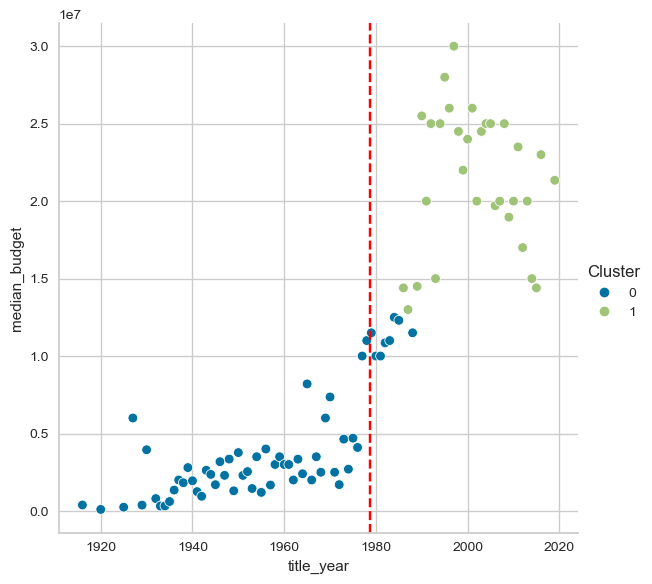

In [141]:
sns.relplot(x="title_year", y="median_budget", hue="Cluster", data=title_year_buf_df, height=6,)
plt.axvline(x=separator_x, color='red', linestyle='--');

In [142]:
separator_x = round(separator_x, 0)

In [143]:
df_film['categ_year_film'] = pd.cut(x = df_film['title_year'], bins = [-float('inf'), separator_x, float('inf')], labels = ['Before 1979', 'After 1979'])

In [144]:
df_film['categ_year_film'] 

0       After 1979
1       After 1979
2       After 1979
3       After 1979
4              NaN
           ...    
5045    After 1979
5046           NaN
5047    After 1979
5048    After 1979
5049    After 1979
Name: categ_year_film, Length: 4921, dtype: category
Categories (2, object): ['Before 1979' < 'After 1979']

In [145]:
df_film.loc[df_film['title_year'].isnull(), ['categ_year_film', 'title_year']]

categ_year_film  title_year
4                NaN         NaN
177              NaN         NaN
260              NaN         NaN
279              NaN         NaN
404              NaN         NaN
...              ...         ...
4799             NaN         NaN
4804             NaN         NaN
4820             NaN         NaN
4870             NaN         NaN
5046             NaN         NaN

[106 rows x 2 columns]

In [146]:
#df_film.drop(['title_year'], axis = 1, inplace = True)

In [147]:
df_film.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'categ_year_film'],
      dtype='object')

## 8.Miss values

<Axes: title={'center': 'The number of missing value'}, xlabel='Name of feature'>

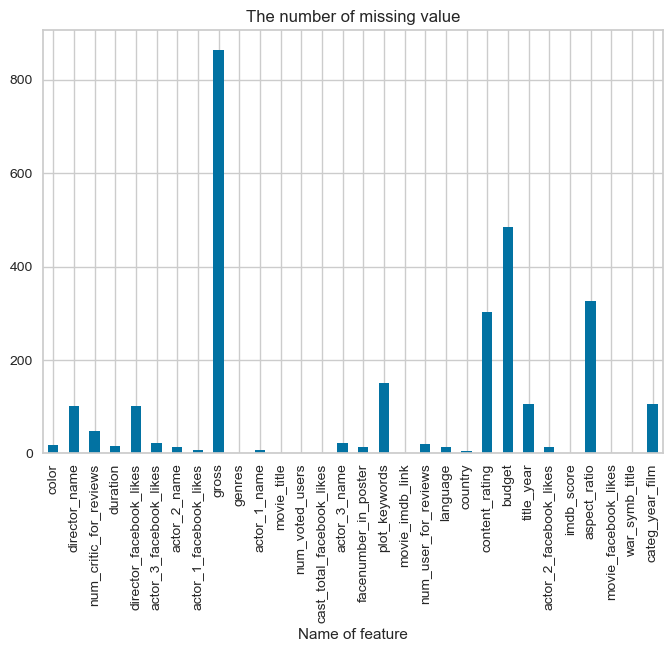

In [149]:
df_numb_miss_val = df_film.isnull().sum().reset_index().rename(columns={'index':'Name of feature', 0:'count'})
df_numb_miss_val.plot(kind='bar', x='Name of feature', y='count',legend=None, title='The number of missing value')

In [150]:
df_film.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'categ_year_film'],
      dtype='object')

In [151]:
categorical_columns = ['director_name', 'actor_2_name', 'movie_title', 'genres', 'actor_1_name', 'actor_3_name', 'content_rating', 'language', 'country', 'color', 'categ_year_film']
df_buff = df_film.drop(['plot_keywords', 'movie_imdb_link'], axis = 1)
df_film_encoded = df_buff.copy()
for column in categorical_columns:
    df_film_encoded[column] = df_film_encoded[column].astype('category').cat.codes

# Build the correlation matrix
correlation_matrix = df_film_encoded.corr()

<Axes: >

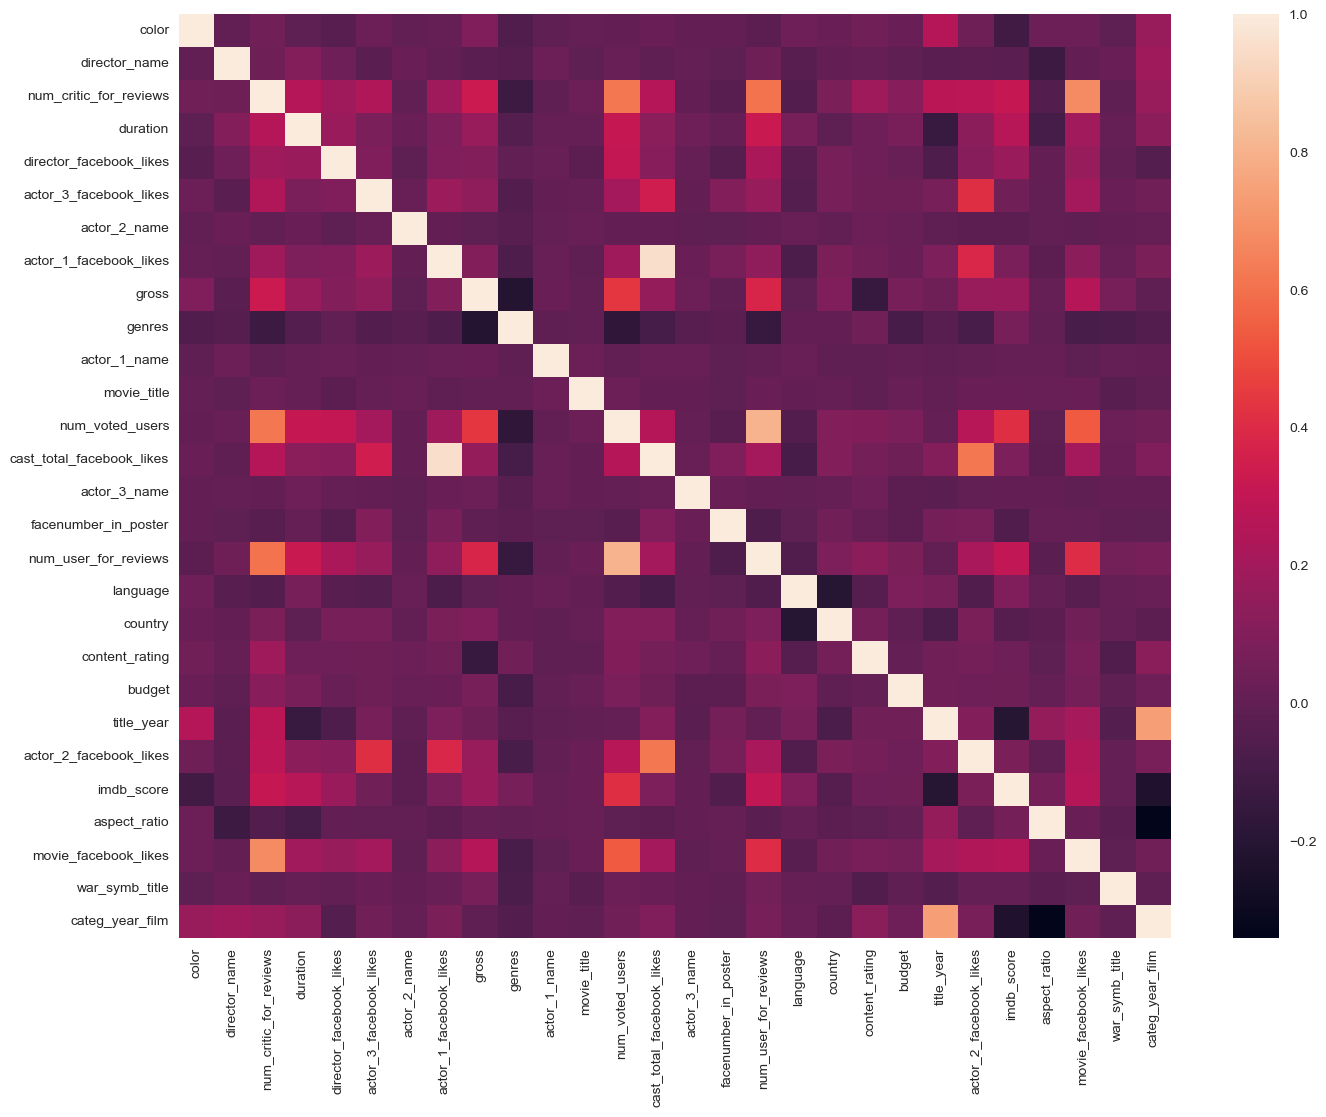

In [152]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix)

In [153]:
###Fill miss value of budget

In [154]:
df_film['budget'].fillna(df_film.groupby('categ_year_film', observed = False)['budget'].transform('median'), inplace = True)

In [155]:
df_film.isnull().sum()['budget']

98

In [156]:
####Using categ_year_film (493-98) 391 rows were fulled

In [157]:
df_film['budget'].fillna(df_film.groupby('actor_1_name')['budget'].transform('median'), inplace = True)

In [158]:
df_film.isnull().sum()['budget']

51

In [159]:
###Using actor_1_name (98 - 51) 47 rows were fulled

In [160]:
df_film['budget'].fillna(df_film.groupby('actor_2_name')['budget'].transform('median'), inplace = True)

In [161]:
df_film.isnull().sum()['budget']

39

In [162]:
###Using actor_2_name (47 - 39) 8 rows were fulled

In [163]:
df_film['budget'].fillna(df_film.groupby('genres')['budget'].transform('median'), inplace = True)

In [164]:
df_film.isnull().sum()['budget']

4

In [165]:
###Using genres (39 - 4) 35 rows were fulled

In [166]:
df_film[df_film['budget'].isnull()]

color director_name  num_critic_for_reviews  duration  \
2371  Color           NaN                     NaN      43.0   
2703  Color           NaN                    18.0      60.0   
3330  Color           NaN                    47.0      23.0   
4461  Color           NaN                    13.0     120.0   

      director_facebook_likes  actor_3_facebook_likes          actor_2_name  \
2371                      NaN                   211.0  Jenni 'Jwoww' Farley   
2703                      NaN                   186.0        Nicole de Boer   
3330                      NaN                   265.0   James Arnold Taylor   
4461                      NaN                     NaN       Michael Douglas   

      actor_1_facebook_likes  gross  \
2371                   341.0    NaN   
2703                   443.0    NaN   
3330                   668.0    NaN   
4461                   416.0    NaN   

                                               genres  ... country  \
2371                  Comedy|Drama|Reality-TV|Romance  ...     NaN   
2703                     Drama|Fantasy|Mystery|Sci-Fi  ...  Canada   
3330  Action|Adventure|Animation|Drama|Fantasy|Sci-Fi  ...     USA   
4461                       Action|Crime|Drama|Mystery  ...     USA   

     content_rating  budget  title_year actor_2_facebook_likes  imdb_score  \
2371          TV-14     NaN         NaN                  230.0         6.6   
2703          TV-14     NaN         NaN                  319.0         7.5   
3330          TV-PG     NaN         NaN                  296.0         7.9   
4461            NaN     NaN         NaN                    0.0         7.3   

     aspect_ratio movie_facebook_likes  war_symb_title categ_year_film  
2371         1.33                    0               1             NaN  
2703          NaN                  576               1             NaN  
3330         2.35                 2000               8             NaN  
4461         4.00                  533               4             NaN  

[4 rows x 30 columns]

In [167]:
###Because of director name is NAN (it's imposible to fill value)=> delete rows

In [168]:
###Fill miss value of director facebook likes

In [169]:
df_film[df_film['director_name'].isnull() & df_film['director_name'].isnull()]

color director_name  num_critic_for_reviews  duration  \
177             Color           NaN                    21.0      60.0   
260             Color           NaN                    29.0      60.0   
404             Color           NaN                   103.0      44.0   
459               NaN           NaN                    95.0      54.0   
479   Black and White           NaN                    31.0      25.0   
...               ...           ...                     ...       ...   
4799            Color           NaN                    75.0      60.0   
4804            Color           NaN                    11.0      22.0   
4820            Color           NaN                    23.0      43.0   
4870            Color           NaN                    11.0      58.0   
5046            Color           NaN                    43.0      43.0   

      director_facebook_likes  actor_3_facebook_likes           actor_2_name  \
177                       NaN                   184.0  Philip Michael Thomas   
260                       NaN                   432.0          Dirk Benedict   
404                       NaN                   148.0         Scott Thompson   
459                       NaN                     0.0          Royce Johnson   
479                       NaN                   474.0        Agnes Moorehead   
...                       ...                     ...                    ...   
4799                      NaN                   833.0               Masi Oka   
4804                      NaN                     6.0              Ron Lynch   
4820                      NaN                   576.0       Tracy Spiridakos   
4870                      NaN                   250.0           James Norton   
5046                      NaN                   319.0          Valorie Curry   

      actor_1_facebook_likes  gross  \
177                    982.0    NaN   
260                    669.0    NaN   
404                    544.0    NaN   
459                    577.0    NaN   
479                   1000.0    NaN   
...                      ...    ...   
4799                  1000.0    NaN   
4804                    59.0    NaN   
4820                  2000.0    NaN   
4870                   887.0    NaN   
5046                   841.0    NaN   

                                            genres  ... country  \
177            Action|Crime|Drama|Mystery|Thriller  ...     USA   
260                         Action|Adventure|Crime  ...     USA   
404            Crime|Drama|Horror|Mystery|Thriller  ...     USA   
459   Action|Adventure|Crime|Drama|Sci-Fi|Thriller  ...     USA   
479                          Comedy|Family|Fantasy  ...     USA   
...                                            ...  ...     ...   
4799                 Drama|Fantasy|Sci-Fi|Thriller  ...     USA   
4804                        Animation|Comedy|Drama  ...     USA   
4820                 Action|Adventure|Drama|Sci-Fi  ...     USA   
4870                                   Crime|Drama  ...      UK   
5046                  Crime|Drama|Mystery|Thriller  ...     USA   

     content_rating      budget  title_year actor_2_facebook_likes  \
177           TV-14   1500000.0         NaN                  321.0   
260           TV-PG  17000000.0         NaN                  554.0   
404           TV-14  19000000.0         NaN                  183.0   
459           TV-MA  19000000.0         NaN                    4.0   
479            TV-G  50000000.0         NaN                  960.0   
...             ...         ...         ...                    ...   
4799          TV-14  10000000.0         NaN                  923.0   
4804          TV-PG   9500000.0         NaN                   11.0   
4820          TV-14  25000000.0         NaN                  821.0   
4870          TV-MA  45500000.0         NaN                  340.0   
5046          TV-14  27610000.0         NaN                  593.0   

      imdb_score aspect_ratio movie_facebook_likes  war_symb_ti

In [170]:
###Conclusion: rows where director name is NAN equals to rows where director facebook likes are Nan => it doesn't necessary make smth with them

In [171]:
df_film[df_film['actor_1_facebook_likes'].isnull() & df_film['actor_1_name'].isnull()]

color      director_name  num_critic_for_reviews  duration  \
4503  Color           Léa Pool                    23.0      97.0   
4520  Color        Harry Gantz                    12.0     105.0   
4721  Color  U. Roberto Romano                     3.0      80.0   
4838  Color          Pan Nalin                    15.0     102.0   
4947  Color    Amal Al-Agroobi                     NaN      62.0   
4948  Color     Andrew Berends                    12.0      90.0   
4997  Color          Jem Cohen                    12.0     111.0   

      director_facebook_likes  actor_3_facebook_likes actor_2_name  \
4503                      4.0                     NaN          NaN   
4520                      0.0                     NaN          NaN   
4721                      6.0                     NaN          NaN   
4838                     95.0                     NaN          NaN   
4947                     58.0                     NaN          NaN   
4948                      0.0                     NaN          NaN   
4997                      6.0                     NaN          NaN   

      actor_1_facebook_likes     gross              genres  ...  \
4503                     NaN   24784.0         Documentary  ...   
4520                     NaN  247740.0   Documentary|Drama  ...   
4721                     NaN    2245.0         Documentary  ...   
4838                     NaN   16892.0         Documentary  ...   
4947                     NaN       NaN  Documentary|Family  ...   
4948                     NaN       NaN     Documentary|War  ...   
4997                     NaN       NaN         Documentary  ...   

                   country content_rating      budget  title_year  \
4503                Canada      Not Rated   1200000.0      2011.0   
4520                   USA            NaN  20000000.0      2002.0   
4721                   USA            NaN    560000.0      2011.0   
4838                 India            NaN    300000.0      2001.0   
4947  United Arab Emirates            NaN    125000.0      2013.0   
4948                   USA            NaN    120000.0      2005.0   
4997                   USA            NaN     50000.0      2015.0   

     actor_2_facebook_likes  imdb_score aspect_ratio movie_facebook_likes  \
4503                    NaN         7.4          NaN                 5000   
4520                    NaN         4.7         1.33                   51   
4721                    NaN         7.2          NaN                   88   
4838                    NaN         7.6         1.85                  379   
4947                    NaN         8.2          NaN                   54   
4948                    NaN         6.6         1.66                   14   
4997                    NaN         6.0         1.78                    5   

      war_symb_title categ_year_film  
4503               1      After 1979  
4520               4      After 1979  
4721               4      After 1979  
4838               5      After 1979  
4947               3      After 1979  
4948               2      After 1979  
4997               0      After 1979  

[7 rows x 30 columns]

In [172]:
###Conclusion: rows where actor 1 name is NAN equals to rows where director actor 1 likes are Nan => it doesn't necessary make smth with them

In [173]:
df_film[df_film['actor_2_facebook_likes'].isnull() & df_film['actor_2_name'].isnull()]

color        director_name  num_critic_for_reviews  duration  \
279     NaN  Christopher Barnard                     NaN      22.0   
2144  Color                  NaN                     5.0      60.0   
2242  Color                  NaN                     6.0      24.0   
3347  Color         J.C. Chandor                   346.0     106.0   
4503  Color             Léa Pool                    23.0      97.0   
4520  Color          Harry Gantz                    12.0     105.0   
4721  Color    U. Roberto Romano                     3.0      80.0   
4816  Color           Mor Loushy                    23.0      84.0   
4838  Color            Pan Nalin                    15.0     102.0   
4947  Color      Amal Al-Agroobi                     NaN      62.0   
4948  Color       Andrew Berends                    12.0      90.0   
4997  Color            Jem Cohen                    12.0     111.0   
4999  Color         Dave Carroll                    10.0      92.0   

      director_facebook_likes  actor_3_facebook_likes actor_2_name  \
279                       0.0                     NaN          NaN   
2144                      NaN                     NaN          NaN   
2242                      NaN                     NaN          NaN   
3347                     78.0                     NaN          NaN   
4503                      4.0                     NaN          NaN   
4520                      0.0                     NaN          NaN   
4721                      6.0                     NaN          NaN   
4816                      0.0                     NaN          NaN   
4838                     95.0                     NaN          NaN   
4947                     58.0                     NaN          NaN   
4948                      0.0                     NaN          NaN   
4997                      6.0                     NaN          NaN   
4999                      0.0                     NaN          NaN   

      actor_1_facebook_likes      gross  \
279                      5.0        NaN   
2144                    98.0        NaN   
2242                     0.0        NaN   
3347                     0.0  6262942.0   
4503                     NaN    24784.0   
4520                     NaN   247740.0   
4721                     NaN     2245.0   
4816                     3.0    34151.0   
4838                     NaN    16892.0   
4947                     NaN        NaN   
4948                     NaN        NaN   
4997                     NaN        NaN   
4999                     0.0        NaN   

                                         genres  ...               country  \
279                                      Comedy  ...                   NaN   
2144               Game-Show|Reality-TV|Romance  ...                   USA   
2242  Action|Adventure|Animation|Family|Fantasy  ...                 Japan   
3347                     Action|Adventure|Drama  ...                   USA   
4503                                Documentary  ...                Canada   
4520                          Documentary|Drama  ...                   USA   
4721                                Documentary  ...                   USA   
4816                        Documentary|History  ...                Israel   
4838                                Documentary  ...                 India   
4947                         Documentary|Family  ...  United Arab Emirates   
4948                            Documentary|War  ...                   USA   
4997                                Documentary  ...                   USA   
4999                                Documentary  ...                   USA   

     content_rating      budget  title_year actor_2_facebook_likes  \
279             NaN  17000000.0         NaN                    NaN   
2144            NaN   3000000.0         NaN                    NaN   
2242            NaN  80000000.0         NaN                    NaN   
3347          PG-13   9000000.0      2013.0                    NaN  

In [174]:
###Conclusion: rows where actor 2 name is NAN equals to rows where director actor 2 likes are Nan => it doesn't necessary make smth with them

In [175]:
df_film[df_film['actor_3_facebook_likes'].isnull() & df_film['actor_3_name'].isnull()]

color          director_name  num_critic_for_reviews  duration  \
4       NaN            Doug Walker                     NaN       NaN   
279     NaN    Christopher Barnard                     NaN      22.0   
1783  Color         Jacques Perrin                   100.0      81.0   
2144  Color                    NaN                     5.0      60.0   
2242  Color                    NaN                     6.0      24.0   
3347  Color           J.C. Chandor                   346.0     106.0   
3529  Color           Gus Van Sant                   103.0     103.0   
3611  Color  Jean-Jacques Mantello                     9.0      42.0   
4226  Color            James Algar                    99.0     120.0   
4461  Color                    NaN                    13.0     120.0   
4503  Color               Léa Pool                    23.0      97.0   
4520  Color            Harry Gantz                    12.0     105.0   
4549  Color       Davis Guggenheim                   372.0      96.0   
4721  Color      U. Roberto Romano                     3.0      80.0   
4816  Color             Mor Loushy                    23.0      84.0   
4837  Color         Florence Ayisi                    27.0     104.0   
4838  Color              Pan Nalin                    15.0     102.0   
4947  Color        Amal Al-Agroobi                     NaN      62.0   
4948  Color         Andrew Berends                    12.0      90.0   
4950  Color              Valentine                     NaN       NaN   
4997  Color              Jem Cohen                    12.0     111.0   
4999  Color           Dave Carroll                    10.0      92.0   
5016  Color          James Bidgood                     8.0      65.0   

      director_facebook_likes  actor_3_facebook_likes     actor_2_name  \
4                       131.0                     NaN       Rob Walker   
279                       0.0                     NaN              NaN   
1783                     63.0                     NaN   Philippe Labro   
2144                      NaN                     NaN              NaN   
2242                      NaN                     NaN              NaN   
3347                     78.0                     NaN              NaN   
3529                    835.0                     NaN    Casey Affleck   
3611                      0.0                     NaN     Daryl Hannah   
4226                     11.0                     NaN     Deems Taylor   
4461                      NaN                     NaN  Michael Douglas   
4503                      4.0                     NaN              NaN   
4520                      0.0                     NaN              NaN   
4549                     49.0                     NaN          Al Gore   
4721                      6.0                     NaN              NaN   
4816                      0.0                     NaN              NaN   
4837                      0.0                     NaN   Beatrice Ntuba   
4838                     95.0                     NaN              NaN   
4947                     58.0                     NaN              NaN   
4948                      0.0                     NaN              NaN   
4950                      0.0                     NaN        Valentine   
4997                      6.0                     NaN              NaN   
4999                      0.0                     NaN              NaN   
5016                      0.0                     NaN    Bobby Kendall   

      actor_1_facebook_likes       gross  \
4                      131.0         NaN   
279                      5.0         NaN   
1783                    63.0  10762178.0   
2144                    98.0         NaN   
2242                     0.0         NaN   
3347                     0.0   6262942.0   
3529                 13000.0    236266.0   
3611                   844.0   7518876.0   
4226                    16.0  76400000.0   
4461                   416.0         NaN   
4503            

In [176]:
###Conclusion: rows where actor 3 name is NAN equals to rows where director actor 3 likes are Nan => it doesn't necessary make smth with them

In [177]:
###Delete values in obsrved columns

In [178]:
df_film.dropna(subset = ['budget'], inplace = True)

In [179]:
df_film.budget.isnull().sum()

0

In [180]:
df_film.dropna(subset = ['director_facebook_likes'], inplace = True)

In [181]:
###Checking if miss value of director_name (director_facebook_likes because rows equals) were romoved corecct
df_film.director_name.isnull().sum()

0

In [182]:
df_film.dropna(subset = ['actor_1_facebook_likes'], inplace = True)

In [183]:
###Checking if miss value of actor_1_name (actor_1_facebook_likes because rows equals) were romoved corecct
df_film.actor_1_name.isnull().sum()

0

In [184]:
df_film.dropna(subset = ['actor_2_facebook_likes'], inplace = True)

In [185]:
###Checking if miss value of actor_2_name (actor_2_facebook_likes because rows equals) were romoved corecct
df_film.actor_2_name.isnull().sum()

0

In [186]:
df_film.dropna(subset = ['actor_3_facebook_likes'], inplace = True)

In [187]:
###Checking if miss value of actor_3_name (actor_3_facebook_likes because rows equals) were romoved corecct
df_film.actor_3_name.isnull().sum()

0

In [188]:
df_film.isnull().sum()

color                         15
director_name                  0
num_critic_for_reviews        40
duration                      11
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        756
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                136
movie_imdb_link                0
num_user_for_reviews          15
language                      11
country                        1
content_rating               253
budget                         0
title_year                     2
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 300
movie_facebook_likes           0
war_symb_title                 0
categ_year_film                2
dtype: int

In [189]:
df_film.aspect_ratio.unique()

array([ 1.78,  2.35,  1.85,  2.  ,   nan,  2.2 ,  2.39,  2.24,  1.66,
        1.5 ,  1.77,  2.4 ,  1.37,  2.76,  1.33,  1.18, 16.  ,  1.44,
        2.55,  1.2 ,  1.75,  1.89,  1.  ])

In [190]:
df_genre_aspect = df_film.groupby('genres')['aspect_ratio'].value_counts().unstack(fill_value=0)
df_genre_aspect

aspect_ratio                                        1.00   1.18   1.20   \
genres                                                                    
Action                                                  0      0      0   
Action|Adventure                                        0      0      0   
Action|Adventure|Animation|Comedy|Crime|Family|...      0      0      0   
Action|Adventure|Animation|Comedy|Drama|Family|...      0      0      0   
Action|Adventure|Animation|Comedy|Family                0      0      0   
...                                                   ...    ...    ...   
Sci-Fi|Thriller                                         0      0      0   
Thriller                                                0      0      0   
Thriller|War                                            0      0      0   
Thriller|Western                                        0      0      0   
Western                                                 0      0      0   

aspect_ratio                                        1.33   1.37   1.44   \
genres                                                                    
Action                                                  0      0      0   
Action|Adventure                                        0      0      0   
Action|Adventure|Animation|Comedy|Crime|Family|...      0      0      0   
Action|Adventure|Animation|Comedy|Drama|Family|...      0      0      0   
Action|Adventure|Animation|Comedy|Family                0      0      0   
...                                                   ...    ...    ...   
Sci-Fi|Thriller                                         0      0      0   
Thriller                                                1      0      0   
Thriller|War                                            0      0      0   
Thriller|Western                                        0      1      0   
Western                                                 0      1      0   

aspect_ratio                                        1.50   1.66   1.75   \
genres                                                                    
Action                                                  0      0      0   
Action|Adventure                                        0      0      0   
Action|Adventure|Animation|Comedy|Crime|Family|...      0      0      0   
Action|Adventure|Animation|Comedy|Drama|Family|...      0      0      0   
Action|Adventure|Animation|Comedy|Family                0      0      0   
...                                                   ...    ...    ...   
Sci-Fi|Thriller                                         0      0      0   
Thriller                                                0      0      0   
Thriller|War                                            0      1      0   
Thriller|Western                                        0      0      0   
Western                                                 0      1      0   

aspect_ratio                                        1.77   ...  1.89   2.00   \
genres                                                     ...                 
Action                                                  0  ...      0      0   
Action|Adventure                                        0  ...      0      0   
Action|Adventure|Animation|Comedy|Crime|Family|...      0  ...      0      0   
Action|Adventure|Animation|Comedy|Drama|Family|...      0  ...      0      0   
Action|Adventure|Animation|Comedy|Family                0  ...      0      0   
...                                                   ...  ...    ...    ...   
Sci-Fi|Thriller                                         0  ...      0      0   
Thriller                                                0  ...      0      0   
Thriller|War                                            0  ...      0      0   
Thriller|Western                                        0  ...      0      0   
Western                                                 0  ...      0      0   

aspect_ratio                   

In [191]:
df_film['genres'].unique().shape[0]

899

In [192]:
ser_genre_best_aspect = df_genre_aspect.idxmax(axis = 1)
ser_genre_best_aspect 

genres
Action                                                    1.85
Action|Adventure                                          2.35
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy    2.35
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi     2.35
Action|Adventure|Animation|Comedy|Family                  2.35
                                                          ... 
Sci-Fi|Thriller                                           2.35
Thriller                                                  1.85
Thriller|War                                              1.66
Thriller|Western                                          1.37
Western                                                   2.35
Length: 866, dtype: float64

In [193]:
df_genre_best_aspect = ser_genre_best_aspect.reset_index()

In [194]:
df_genre_best_aspect.rename(columns = {0: 'aspect_ratio'})

genres  aspect_ratio
0                                               Action          1.85
1                                     Action|Adventure          2.35
2    Action|Adventure|Animation|Comedy|Crime|Family...          2.35
3    Action|Adventure|Animation|Comedy|Drama|Family...          2.35
4             Action|Adventure|Animation|Comedy|Family          2.35
..                                                 ...           ...
861                                    Sci-Fi|Thriller          2.35
862                                           Thriller          1.85
863                                       Thriller|War          1.66
864                                   Thriller|Western          1.37
865                                            Western          2.35

[866 rows x 2 columns]

In [195]:
df_film = df_film.merge(df_genre_best_aspect, on = 'genres', how = 'left', suffixes = ('','_from_help_ds'))

In [196]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
4794  Color       Edward Burns                    14.0      95.0   
4795  Color        Scott Smith                     1.0      87.0   
4796  Color   Benjamin Roberds                    13.0      76.0   
4797  Color        Daniel Hsia                    14.0     100.0   
4798  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0                  1000.0       Orlando Bloom   
2                         0.0                   161.0        Rory Kinnear   
3                     22000.0                 23000.0      Christian Bale   
4                       475.0                   530.0     Samantha Morton   
...                       ...                     ...                 ...   
4794                      0.0                   133.0  Caitlin FitzGerald   
4795                      2.0                   318.0       Daphne Zuniga   
4796                      0.0                     0.0       Maxwell Moody   
4797                      0.0                   489.0       Daniel Henney   
4798                     16.0                    16.0    Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      640.0   73058679.0          Action|Adventure|Sci-Fi   
...                      ...          ...                              ...   
4794                   296.0       4584.0                     Comedy|Drama   
4795                   637.0          NaN                     Comedy|Drama   
4796                     0.0          NaN            Drama|Horror|Thriller   
4797                   946.0      10443.0             Comedy|Drama|Romance   
4798                    86.0      85222.0                      Documentary   

      ... content_rating       budget  title_year  actor_2_facebook_likes  \
0     ...          PG-13  237000000.0      2009.0                   936.0   
1     ...          PG-13  300000000.0      2007.0                  5000.0   
2     ...          PG-13  245000000.0      2015.0                   393.0   
3     ...          PG-13  250000000.0      2012.0                 23000.0   
4     ...          PG-13  263700000.0      2012.0                   632.0   
...   ...            ...          ...         ...                     ...   
4794  ...      Not Rated       9000.0      2011.0                   205.0   
4795  ...            NaN   20000000.0      2013.0                   470.0   
4796  ...            NaN       1400.0      2013.0                     0.0   
4797  ...          PG-13   20000000.0      2012.0                   719.0   
4798  ...             PG       1100.0      2004.0                    23.0   

     imdb_score  aspect_ratio movie_facebook_likes war_symb_title  \
0           7.9          1.78                33000              4   
1           7.1          2.35                    0              8   
2           6.8          2.35                85000              1   
3           8.5          2.35               164000              3   
4           6.6          2.35                24000       

In [197]:
df_film['aspect_ratio'].fillna(df_film[0], inplace = True)

In [198]:
df_film[df_film['aspect_ratio'].isnull()]

color       director_name  num_critic_for_reviews  duration  \
196   Color          Matt Birch                     4.0       NaN   
483   Color    Andrés Couturier                     3.0      89.0   
596   Color           Will Finn                    51.0      88.0   
1088  Color   Lawrence Kasanoff                    12.0      91.0   
1922  Color      Andrew Adamson                    73.0      91.0   
2150  Color         Henry Joost                    86.0      96.0   
2639  Color    Daniele Luchetti                     4.0      98.0   
2646  Color       Peter Cousens                     5.0      94.0   
2892  Color       David Winters                     3.0      89.0   
3116  Color        Taedong Park                     8.0      85.0   
3141  Color         Anurag Basu                    41.0      90.0   
3389    NaN        Richard Rich                     2.0      45.0   
3510  Color     Stewart Raffill                     9.0     105.0   
3614  Color        Jerry Belson                    21.0      87.0   
3645  Color        Jim Amatulli                     NaN      90.0   
3647  Color    Barrett Esposito                     3.0      67.0   
3796  Color     Bruce Macdonald                     3.0      94.0   
3843  Color           Jay Oliva                    44.0     148.0   
3934  Color  Michael Landon Jr.                     5.0      87.0   
3938  Color          Bobby Roth                     1.0     120.0   
3991  Color       Stacy Peralta                    74.0     105.0   
4014  Color      Randall Miller                     1.0      34.0   
4145  Color        Tanner Beard                     2.0     108.0   
4305  Color     Brenton Spencer                    22.0      84.0   
4415  Color   Jeffrey St. Jules                    16.0      90.0   
4423  Color        Sanjay Rawal                     9.0      83.0   
4442  Color           Nick Love                    16.0      86.0   
4457  Color         Ryan Little                    33.0      90.0   
4458  Color         Clark Baker                     1.0      14.0   
4549  Color      Patrick Gilles                     NaN      90.0   
4553  Color     Warren Sheppard                     3.0      94.0   
4555  Color  Justin Paul Miller                     1.0      90.0   
4557  Color      Catherine Gund                    10.0      82.0   
4649  Color       Jason Naumann                     NaN      35.0   
4659  Color       James O'Brien                     5.0     105.0   
4679  Color     Livingston Oden                     1.0      89.0   
4705  Color         Dena Seidel                     5.0      72.0   

      director_facebook_likes  actor_3_facebook_likes            actor_2_name  \
196                       0.0                  1000.0              Toby Jones   
483                       0.0                    20.0           David Hoffman   
596                       6.0                   854.0            Oliver Platt   
1088                     11.0                   500.0            Larry Miller   
1922                     80.0                    31.0              Erica Linz   
2150                     24.0                   374.0     Marc John Jefferies   
2639                      6.0                    50.0     Rodrigo De la Serna   
2646                      5.0                   124.0            David Rasche   
2892                     49.0                    84.0               Matt Marr   
3116                      0.0                   196.0              Tom Arnold   
3141                    116.0                   303.0  Steven Michael Quezada   
3389                     24.0                    29.0            Kate Higgins   
3510                     12.0                    10.0         Alexis Biesiada   
3614                      3.0                    83.0           Tim Thomerson   
3645                      0.0                   483.0           Patricia Neal   
3647                      0.0                   388.0            Cyndi Lauper   
3796  

In [199]:
df_film[df_film['genres'] == 'Adventure|Documentary']

color director_name  num_critic_for_reviews  duration  \
4705  Color   Dena Seidel                     5.0      72.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
4705                      0.0                     0.0  Hugh Ducklow   

      actor_1_facebook_likes   gross                 genres  ...  \
4705                     0.0  4914.0  Adventure|Documentary  ...   

     content_rating    budget  title_year  actor_2_facebook_likes imdb_score  \
4705            NaN  150000.0      2015.0                     0.0        7.0   

      aspect_ratio movie_facebook_likes war_symb_title  categ_year_film   0  
4705           NaN                  215              3       After 1979 NaN  

[1 rows x 31 columns]

In [200]:
df_film.drop([0], axis = 1, inplace = True)

In [201]:
###Conclussion there is 30 rows with null values which have unique genre. ????Is it better to fill the most friequent aspect ration using the category year_film or year_film

In [202]:
df_year_aspect = df_film.groupby('title_year')['aspect_ratio'].value_counts().unstack(fill_value=0)
df_year_aspect

aspect_ratio  1.00   1.18   1.20   1.33   1.37   1.44   1.50   1.66   1.75   \
title_year                                                                    
1916.0            0      0      0      1      0      0      0      0      0   
1920.0            0      0      0      1      0      0      0      0      0   
1925.0            0      0      0      1      0      0      0      0      0   
1927.0            0      0      0      1      0      0      0      0      0   
1929.0            0      0      0      1      1      0      0      0      0   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
2013.0            0      0      0      1      0      0      0      1      0   
2014.0            0      0      0      2      2      0      0      0      0   
2015.0            0      0      0      1      1      0      0      2      0   
2016.0            0      0      0      0      0      0      0      0      0   
2019.0            1      0      0      0      0      0      0      0      0   

aspect_ratio  1.77   ...  1.89   2.00   2.20   2.24   2.35   2.39   2.40   \
title_year           ...                                                    
1916.0            0  ...      0      0      0      0      0      0      0   
1920.0            0  ...      0      0      0      0      0      0      0   
1925.0            0  ...      0      0      0      0      0      0      0   
1927.0            0  ...      0      0      0      0      0      0      0   
1929.0            0  ...      0      0      0      0      0      0      0   
...             ...  ...    ...    ...    ...    ...    ...    ...    ...   
2013.0            0  ...      1      0      0      1    150      0      0   
2014.0            0  ...      0      0      0      0    149      6      1   
2015.0            0  ...      0      1      1      0    126      4      0   
2016.0            0  ...      0      1      0      0     70      0      0   
2019.0            0  ...      0      0      0      0      0      0      0   

aspect_ratio  2.55   2.76   16.00  
title_year                         
1916.0            0      0      0  
1920.0            0      0      0  
1925.0            0      0      0  
1927.0            0      0      0  
1929.0            0      0      0  
...             ...    ...    ...  
2013.0            0      0      2  
2014.0            0      0      1  
2015.0            0      1      1  
2016.0            0      0      1  
2019.0            0      0      0  

[92 rows x 22 columns]

In [203]:
df_film['title_year'].unique().shape[0]

93

In [204]:
### If fill aspect ratio using year, only 1 missing value will be. make sense to do it 

In [205]:
ser_year_best_aspect = df_year_aspect.idxmax(axis = 1)
ser_year_best_aspect 

title_year
1916.0    1.33
1920.0    1.33
1925.0    1.33
1927.0    1.33
1929.0    1.33
          ... 
2013.0    2.35
2014.0    2.35
2015.0    2.35
2016.0    2.35
2019.0    1.00
Length: 92, dtype: float64

In [206]:
df_year_best_aspect = ser_year_best_aspect.reset_index()

In [207]:
df_year_best_aspect.rename(columns = {0: 'aspect_ratio'})
df_film = df_film.merge(df_year_best_aspect, on = 'title_year', how = 'left', suffixes = ('','_from_help_ds'))

In [208]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
4794  Color       Edward Burns                    14.0      95.0   
4795  Color        Scott Smith                     1.0      87.0   
4796  Color   Benjamin Roberds                    13.0      76.0   
4797  Color        Daniel Hsia                    14.0     100.0   
4798  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0                  1000.0       Orlando Bloom   
2                         0.0                   161.0        Rory Kinnear   
3                     22000.0                 23000.0      Christian Bale   
4                       475.0                   530.0     Samantha Morton   
...                       ...                     ...                 ...   
4794                      0.0                   133.0  Caitlin FitzGerald   
4795                      2.0                   318.0       Daphne Zuniga   
4796                      0.0                     0.0       Maxwell Moody   
4797                      0.0                   489.0       Daniel Henney   
4798                     16.0                    16.0    Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      640.0   73058679.0          Action|Adventure|Sci-Fi   
...                      ...          ...                              ...   
4794                   296.0       4584.0                     Comedy|Drama   
4795                   637.0          NaN                     Comedy|Drama   
4796                     0.0          NaN            Drama|Horror|Thriller   
4797                   946.0      10443.0             Comedy|Drama|Romance   
4798                    86.0      85222.0                      Documentary   

      ... content_rating       budget  title_year  actor_2_facebook_likes  \
0     ...          PG-13  237000000.0      2009.0                   936.0   
1     ...          PG-13  300000000.0      2007.0                  5000.0   
2     ...          PG-13  245000000.0      2015.0                   393.0   
3     ...          PG-13  250000000.0      2012.0                 23000.0   
4     ...          PG-13  263700000.0      2012.0                   632.0   
...   ...            ...          ...         ...                     ...   
4794  ...      Not Rated       9000.0      2011.0                   205.0   
4795  ...            NaN   20000000.0      2013.0                   470.0   
4796  ...            NaN       1400.0      2013.0                     0.0   
4797  ...          PG-13   20000000.0      2012.0                   719.0   
4798  ...             PG       1100.0      2004.0                    23.0   

     imdb_score  aspect_ratio movie_facebook_likes war_symb_title  \
0           7.9          1.78                33000              4   
1           7.1          2.35                    0              8   
2           6.8          2.35                85000              1   
3           8.5          2.35               164000              3   
4           6.6          2.35                24000       

In [209]:
df_film['aspect_ratio'].fillna(df_film[0], inplace = True)

In [210]:
df_film['aspect_ratio'].isnull().sum()

0

In [211]:
df_film.drop([0], axis = 1, inplace = True)

In [212]:
df_film.isnull().sum()

color                         15
director_name                  0
num_critic_for_reviews        40
duration                      11
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        756
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                136
movie_imdb_link                0
num_user_for_reviews          15
language                      11
country                        1
content_rating               253
budget                         0
title_year                     2
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
war_symb_title                 0
categ_year_film                2
dtype: int

#### Full miss value of color column

In [214]:
df_film.loc[df_film['color'].isnull(), 'title_year']

1870    2010.0
1936    2014.0
2640    2009.0
3140    2015.0
3389    2014.0
3483    2011.0
3500    2012.0
3957    2014.0
4030    2015.0
4137    2012.0
4211    2016.0
4243    2013.0
4418    2014.0
4618    1990.0
4777    2011.0
Name: title_year, dtype: float64

In [215]:
color_counts = df_film.groupby('title_year')['color'].value_counts().unstack(fill_value=0)

In [216]:
color_counts

color       Black and White  Color  Green and Yellow
title_year                                          
1916.0                    1      0                 0
1920.0                    1      0                 0
1925.0                    1      0                 0
1927.0                    1      0                 0
1929.0                    2      0                 0
...                     ...    ...               ...
2013.0                    5    222                 0
2014.0                    3    236                 0
2015.0                    1    205                 0
2016.0                    0     97                 0
2019.0                    0      0                 1

[92 rows x 3 columns]

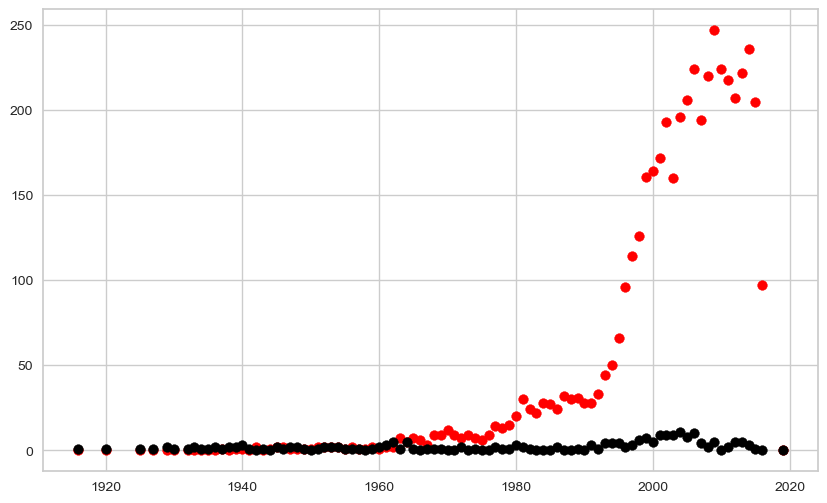

In [217]:
plt.figure(figsize=(10, 6))
plt.scatter(color_counts.index, color_counts['Color'], color='red', label='Color')
plt.scatter(color_counts.index, color_counts['Black and White'], color='black', label='Black and White')

In [218]:
df_film['categ_year_film_color'] = pd.cut(x = df_film['title_year'], bins = [-float('inf'), 1965, float('inf')], labels = ['Black and White', 'Color'])

In [219]:
df_film['color'].fillna(df_film['categ_year_film_color'], inplace = True)

In [220]:
df_film.drop('categ_year_film_color', axis = 1, inplace = True)

In [221]:
df_film.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews        40
duration                      11
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        756
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                136
movie_imdb_link                0
num_user_for_reviews          15
language                      11
country                        1
content_rating               253
budget                         0
title_year                     2
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
war_symb_title                 0
categ_year_film                2
dtype: int

#### Explore content rating column

In [223]:
df_film.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', nan, 'TV-14', 'Unrated', 'Approved',
       'NC-17', 'X', 'Not Rated', 'GP', 'Passed', 'M', 'TV-G', 'TV-PG',
       nan], dtype=object)

In [224]:
df_film.dropna(subset=['content_rating'], inplace = True)

In [225]:
df_film.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews        18
duration                       1
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        563
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          12
plot_keywords                 68
movie_imdb_link                0
num_user_for_reviews           3
language                       8
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
war_symb_title                 0
categ_year_film                0
dtype: int

#### Delete 'num_critic_for_reviews', 'duration', 'facenumber_in_poster', 'num_user_for_reviews', 'language'

In [227]:
df_film.dropna(subset=['num_critic_for_reviews', 'duration', 'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country', 'title_year', 'categ_year_film'], inplace = True)

In [228]:
df_film.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        539
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                 58
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
war_symb_title                 0
categ_year_film                0
dtype: int

## 9. Delete unnacessary columns

In [230]:
#df_film.drop(['plot_keywords', 'movie_imdb_link'], axis = 1, inplace = True)
df_film.drop(['plot_keywords'], axis = 1, inplace = True)

In [231]:
df_film.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'categ_year_film'],
      dtype='object')

In [232]:
df_film.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        539
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
war_symb_title                 0
categ_year_film                0
dtype: int64

In [233]:
####Before
categorical_columns = ['director_name', 'actor_2_name', 'movie_title', 'genres', 'actor_1_name', 'actor_3_name', 'content_rating', 'language', 'country', 'color', 'categ_year_film']
df_film_encoded = df_film.drop('movie_imdb_link', axis = 1)
for column in categorical_columns:
    df_film_encoded[column] = df_film_encoded[column].astype('category').cat.codes

# Build the correlation matrix
correlation_matrix = df_film_encoded.corr()

In [234]:
correlation_matrix['gross'].sort_values(ascending=False)

gross                        1.000000
num_voted_users              0.631915
num_user_for_reviews         0.554113
num_critic_for_reviews       0.461282
movie_facebook_likes         0.360019
duration                     0.246628
actor_2_facebook_likes       0.246083
cast_total_facebook_likes    0.232007
actor_3_facebook_likes       0.205413
imdb_score                   0.204992
actor_1_facebook_likes       0.146811
country                      0.145293
director_facebook_likes      0.141816
war_symb_title               0.106689
budget                       0.098197
aspect_ratio                 0.070819
color                        0.043392
title_year                   0.024746
movie_title                  0.021074
actor_3_name                 0.012186
actor_2_name                 0.006680
actor_1_name                 0.006410
director_name               -0.006437
categ_year_film             -0.017622
facenumber_in_poster        -0.027322
language                    -0.099529
content_rati

<Axes: >

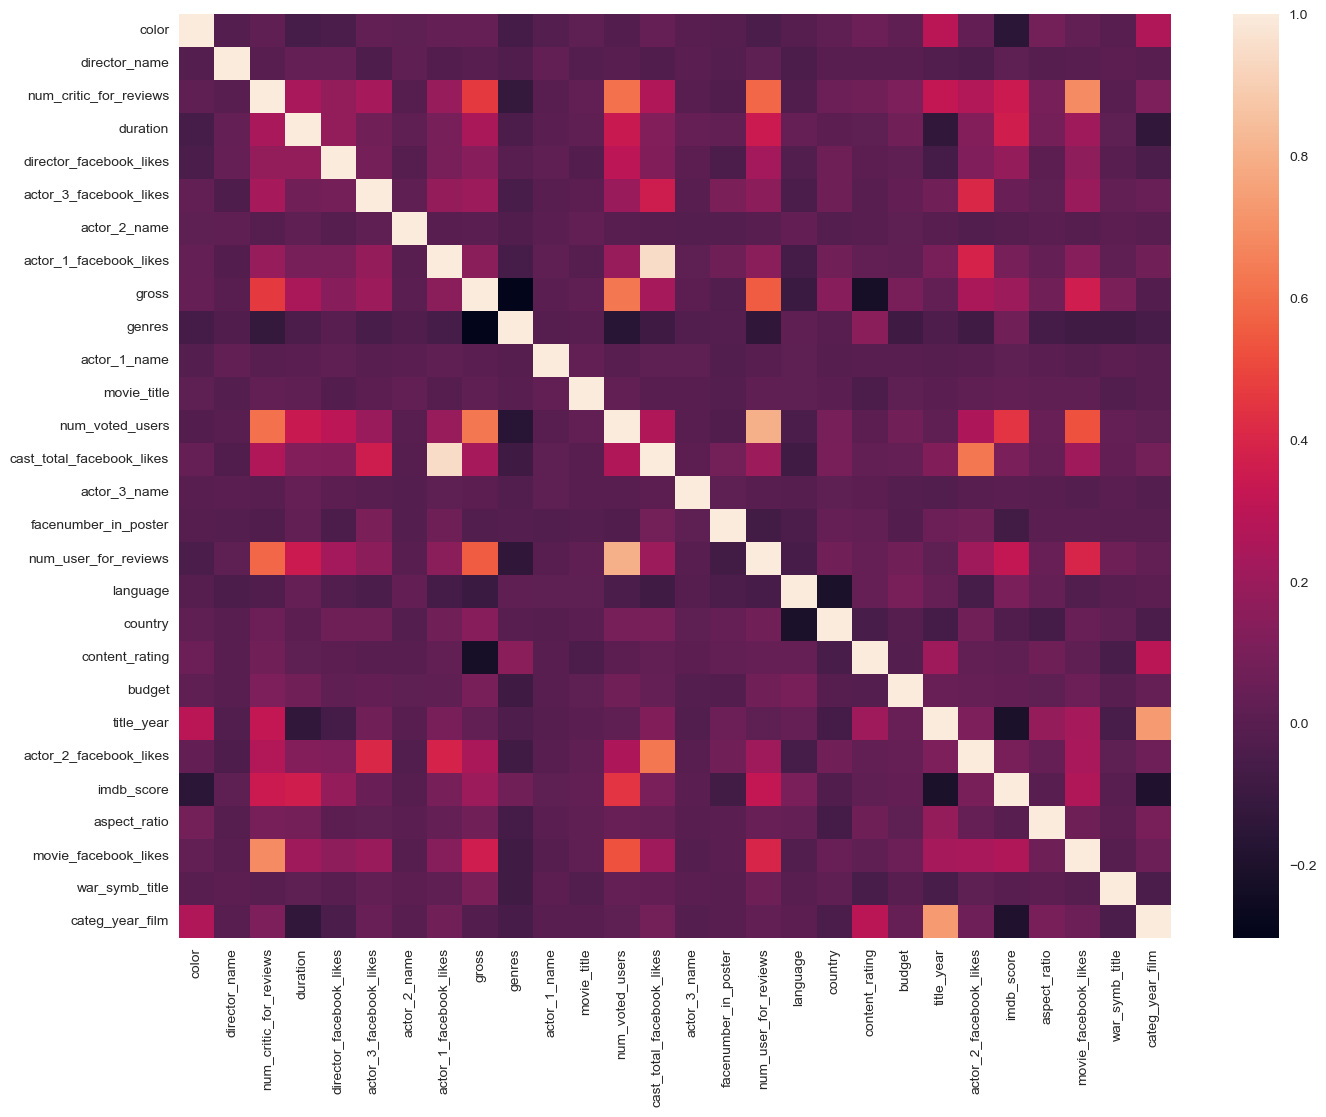

In [235]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix)

## Categorical features

### Color

In [238]:
df_film['color'].value_counts()

color
Color              4323
Black and White     185
Name: count, dtype: int64

In [239]:
label_encoder = LabelEncoder()

In [240]:
df_film['color'] = label_encoder.fit_transform(df_film['color'])

In [241]:
df_film['color'].value_counts()

color
1    4323
0     185
Name: count, dtype: int64

### Country

In [243]:
country_count = df_film['country'].value_counts().values

In [244]:
country_label = df_film['country'].value_counts().index

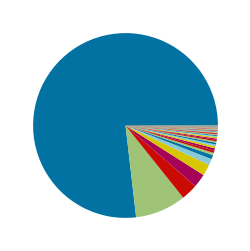

In [245]:
plt.figure(figsize=(7, 3))
plt.pie(country_count)
plt.show()

In [246]:
df_film[df_film['country'] != 'USA'].shape[0]

1044

##### For analizing budget 

In [248]:
df_film['name_country'] = df_film['country']

##### convert names of countries

In [250]:
df_film.loc[df_film['country'] != 'USA', ['country']] = 'not USA'

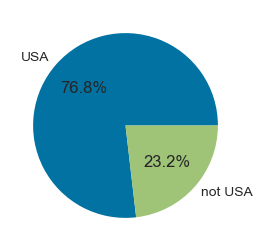

In [251]:
country_count = df_film['country'].value_counts().values
country_label = df_film['country'].value_counts().index
plt.figure(figsize=(7, 3))
plt.pie(country_count, labels = country_label, autopct='%1.1f%%')
plt.show()

In [252]:
df_film['country'] = label_encoder.fit_transform(df_film['country'])

In [253]:
df_film['country'].value_counts()

country
0    3464
1    1044
Name: count, dtype: int64

### Language

In [255]:
df_film['language'].value_counts()

language
English       4273
French          50
Spanish         36
Mandarin        20
Hindi           15
German          15
Japanese        13
Italian          8
Portuguese       8
Cantonese        8
Russian          7
Korean           7
Danish           5
Hebrew           4
Norwegian        4
Persian          4
Dutch            3
Thai             3
Dari             2
Swedish          2
Indonesian       2
Arabic           2
Zulu             2
Aboriginal       2
Romanian         1
Polish           1
Vietnamese       1
Chinese          1
Czech            1
Hungarian        1
Bosnian          1
Mongolian        1
Aramaic          1
Kazakh           1
Maya             1
Filipino         1
Greek            1
Name: count, dtype: int64

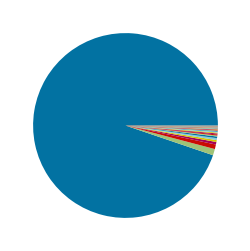

In [256]:
plt.figure(figsize=(7, 3))
plt.pie(df_film['language'].value_counts().values)
plt.show()

In [257]:
df_film.loc[df_film['language'] != 'English', ['language']] = 'not English'

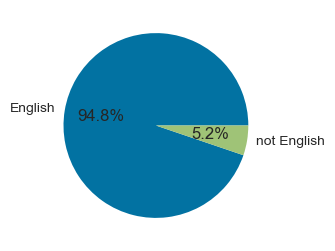

In [258]:
plt.figure(figsize=(7, 3))
plt.pie(df_film['language'].value_counts().values, labels = df_film['language'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [259]:
df_film['language'] = label_encoder.fit_transform(df_film['language'])

In [260]:
df_film['language'].value_counts()

language
0    4273
1     235
Name: count, dtype: int64

### Genres

In [262]:
df_film['genres'].unique()

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Drama|Romance',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thriller', 'Animation|Drama|Family|Fantasy',
       'Act

In [263]:
genre_columns = df_film['genres'].str.get_dummies(sep='|')

In [264]:
df_film = pd.concat([df_film, genre_columns], axis = 1)

In [265]:
df_film.drop('genres', axis = 1, inplace = True)

In [266]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0         1      James Cameron                   723.0     178.0   
1         1     Gore Verbinski                   302.0     169.0   
2         1         Sam Mendes                   602.0     148.0   
3         1  Christopher Nolan                   813.0     164.0   
4         1     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
4791      1   Neill Dela Llana                    35.0      80.0   
4792      1   Robert Rodriguez                    56.0      81.0   
4794      1       Edward Burns                    14.0      95.0   
4797      1        Daniel Hsia                    14.0     100.0   
4798      1           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0                  1000.0       Orlando Bloom   
2                         0.0                   161.0        Rory Kinnear   
3                     22000.0                 23000.0      Christian Bale   
4                       475.0                   530.0     Samantha Morton   
...                       ...                     ...                 ...   
4791                      0.0                     0.0     Edgar Tancangco   
4792                      0.0                     6.0     Peter Marquardt   
4794                      0.0                   133.0  Caitlin FitzGerald   
4797                      0.0                   489.0       Daniel Henney   
4798                     16.0                    16.0    Brian Herzlinger   

      actor_1_facebook_likes        gross     actor_1_name  ... Music  \
0                     1000.0  760505847.0      CCH Pounder  ...     0   
1                    40000.0  309404152.0      Johnny Depp  ...     0   
2                    11000.0  200074175.0  Christoph Waltz  ...     0   
3                    27000.0  448130642.0        Tom Hardy  ...     0   
4                      640.0   73058679.0     Daryl Sabara  ...     0   
...                      ...          ...              ...  ...   ...   
4791                     0.0      70071.0      Ian Gamazon  ...     0   
4792                   121.0    2040920.0  Carlos Gallardo  ...     0   
4794                   296.0       4584.0      Kerry Bishé  ...     0   
4797                   946.0      10443.0        Alan Ruck  ...     0   
4798                    86.0      85222.0      John August  ...     0   

      Musical  Mystery News  Romance Sci-Fi  Sport  Thriller  War Western  
0           0        0    0        0      1      0         0    0       0  
1           0        0    0        0      0      0         0    0       0  
2           0        0    0        0      0      0         1    0       0  
3           0        0    0        0      0      0         1    0       0  
4           0        0    0        0      1      0         0    0       0  
...       ...      ...  ...      ...    ...    ...       ...  ...     ...  
4791        0        0    0        0      0      0         1    0       0  
4792        0        0    0        1      0      0         1    0       0  
4794        0        0    0        0      0      0         0    0       0  
4797        0        0    0        1      0      0         0    0       0  
4798        0        0    0        0      0      0         0    0       0  

[4508 rows x 52 columns]

In [267]:
df_film.loc[df_film['Music'] == 1, 'budget'].median()

19500000.0

In [268]:
name_genres = ['Action','Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary','Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music','Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller','War', 'Western']

In [269]:
df_genre_budget = df_film[name_genres +['budget']]

In [270]:
df_genre_budget

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          1          1          0          0       0      0            0   
1          1          1          0          0       0      0            0   
2          1          1          0          0       0      0            0   
3          1          0          0          0       0      0            0   
4          1          1          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
4791       0          0          0          0       0      0            0   
4792       1          0          0          0       0      1            0   
4794       0          0          0          0       1      0            0   
4797       0          0          0          0       1      0            0   
4798       0          0          0          0       0      0            1   

      Drama  Family  Fantasy  ...  Musical  Mystery  News  Romance  Sci-Fi  \
0         0       0        1  ...        0        0     0        0       1   
1         0       0        1  ...        0        0     0        0       0   
2         0       0        0  ...        0        0     0        0       0   
3         0       0        0  ...        0        0     0        0       0   
4         0       0        0  ...        0        0     0        0       1   
...     ...     ...      ...  ...      ...      ...   ...      ...     ...   
4791      0       0        0  ...        0        0     0        0       0   
4792      1       0        0  ...        0        0     0        1       0   
4794      1       0        0  ...        0        0     0        0       0   
4797      1       0        0  ...        0        0     0        1       0   
4798      0       0        0  ...        0        0     0        0       0   

      Sport  Thriller  War  Western       budget  
0         0         0    0        0  237000000.0  
1         0         0    0        0  300000000.0  
2         0         1    0        0  245000000.0  
3         0         1    0        0  250000000.0  
4         0         0    0        0  263700000.0  
...     ...       ...  ...      ...          ...  
4791      0         1    0        0       7000.0  
4792      0         1    0        0       7000.0  
4794      0         0    0        0       9000.0  
4797      0         0    0        0   20000000.0  
4798      0         0    0        0       1100.0  

[4508 rows x 24 columns]

In [271]:
df_long = df_genre_budget.melt(id_vars=['budget'], var_name='genre', value_name='is_genre')

In [272]:
df_long

budget    genre  is_genre
0       237000000.0   Action         1
1       300000000.0   Action         1
2       245000000.0   Action         1
3       250000000.0   Action         1
4       263700000.0   Action         1
...             ...      ...       ...
103679       7000.0  Western         0
103680       7000.0  Western         0
103681       9000.0  Western         0
103682   20000000.0  Western         0
103683       1100.0  Western         0

[103684 rows x 3 columns]

In [273]:
df_filtered = df_long[df_long['is_genre'] == 1]

In [274]:
df_filtered

budget    genre  is_genre
0       237000000.0   Action         1
1       300000000.0   Action         1
2       245000000.0   Action         1
3       250000000.0   Action         1
4       263700000.0   Action         1
...             ...      ...       ...
103307    1200000.0  Western         1
103404    1000000.0  Western         1
103451     750000.0  Western         1
103599     200000.0  Western         1
103665      30000.0  Western         1

[13118 rows x 3 columns]

In [275]:
df_subgender = df_filtered.groupby('genre').agg(median_budget=('budget', 'median'), count=('is_genre', 'size')).reset_index()

In [276]:
df_subgender

genre  median_budget  count
0        Action     40000000.0   1051
1     Adventure     50000000.0    844
2     Animation     70000000.0    225
3     Biography     20000000.0    277
4        Comedy     20000000.0   1727
5         Crime     20000000.0    811
6   Documentary      2500000.0     77
7         Drama     20000000.0   2310
8        Family     38000000.0    501
9       Fantasy     40000000.0    547
10    Film-Noir      1288000.0      5
11      History     25000000.0    187
12       Horror     11500000.0    497
13        Music     19500000.0    198
14      Musical     20000000.0    123
15      Mystery     20000000.0    443
16         News     10750000.0      2
17      Romance     20000000.0   1013
18       Sci-Fi     35500000.0    558
19        Sport     20000000.0    173
20     Thriller     25000000.0   1271
21          War     23750000.0    192
22      Western     20000000.0     86

In [277]:
scaler = RobustScaler()
df_subgender[['median_budget', 'count']] = scaler.fit_transform(df_subgender[['median_budget', 'count']])

In [278]:
df_subgender

genre  median_budget     count
0        Action       1.951220  0.938996
1     Adventure       2.926829  0.619305
2     Animation       4.878049 -0.336680
3     Biography       0.000000 -0.256371
4        Comedy       0.000000  1.983012
5         Crime       0.000000  0.568340
6   Documentary      -1.707317 -0.565251
7         Drama       0.000000  2.883398
8        Family       1.756098  0.089575
9       Fantasy       1.951220  0.160618
10    Film-Noir      -1.825561 -0.676448
11      History       0.487805 -0.395367
12       Horror      -0.829268  0.083398
13        Music      -0.048780 -0.378378
14      Musical       0.000000 -0.494208
15      Mystery       0.000000  0.000000
16         News      -0.902439 -0.681081
17      Romance       0.000000  0.880309
18       Sci-Fi       1.512195  0.177606
19        Sport       0.000000 -0.416988
20     Thriller       0.487805  1.278764
21          War       0.365854 -0.387645
22      Western       0.000000 -0.551351

In [279]:
def silhouette(lst_num_cl, X):
    num_col = 2
    fig, ax = plt.subplots(round(len(lst_num_cl)/num_col), num_col, figsize=(15,12))
    for i in lst_num_cl:
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
        q, mod = divmod(i, 2)
        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(X)

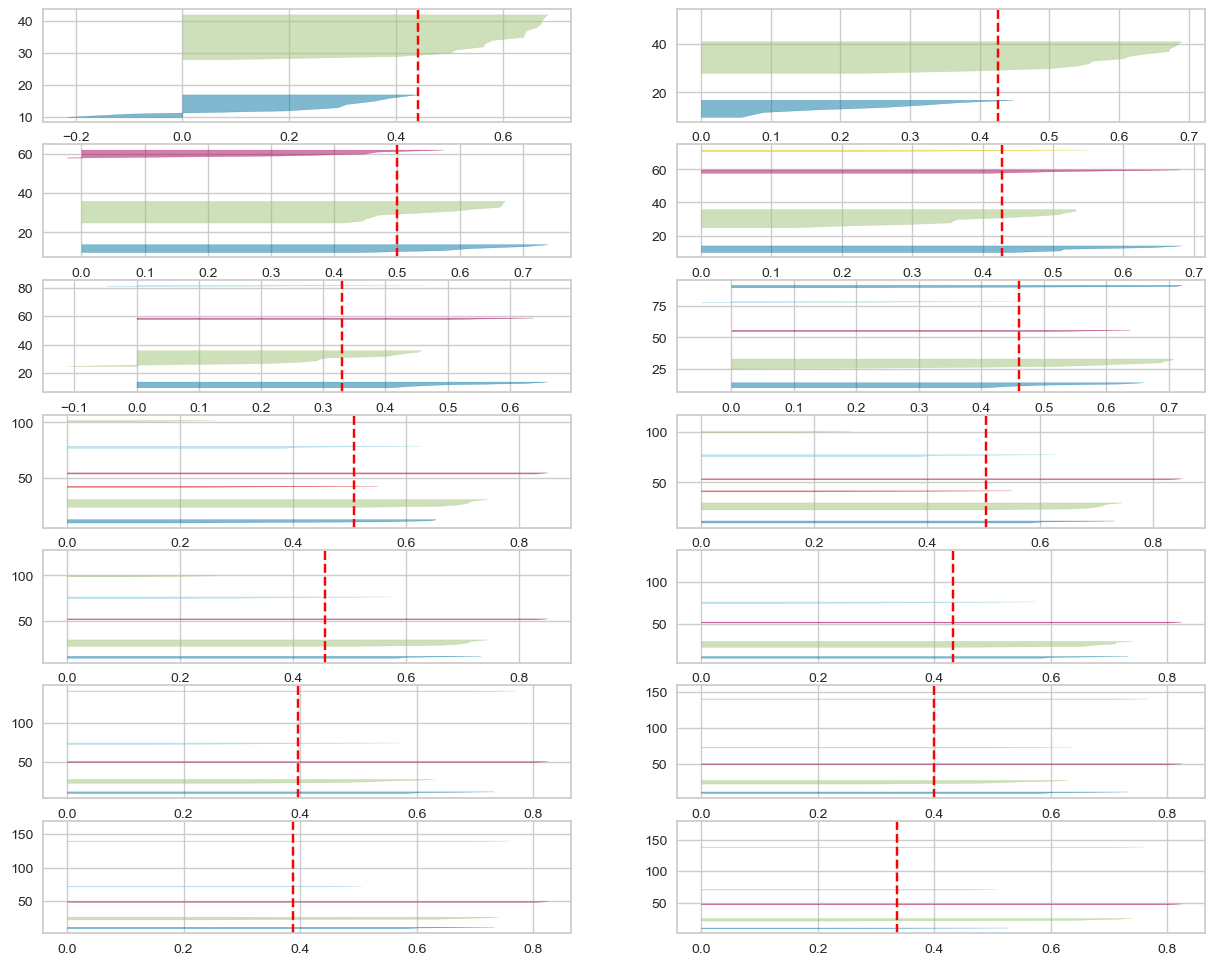

In [280]:
silhouette(np.arange(2,16), df_subgender.drop('genre', axis = 1))

In [281]:
def elbow_method(max_clust, X):
    wcss = []
    for num_cluster in range(1, max_clust):
        kmeans = KMeans(n_clusters=num_cluster, n_init='auto', random_state = 42)
        kmeans = kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clust), wcss, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')

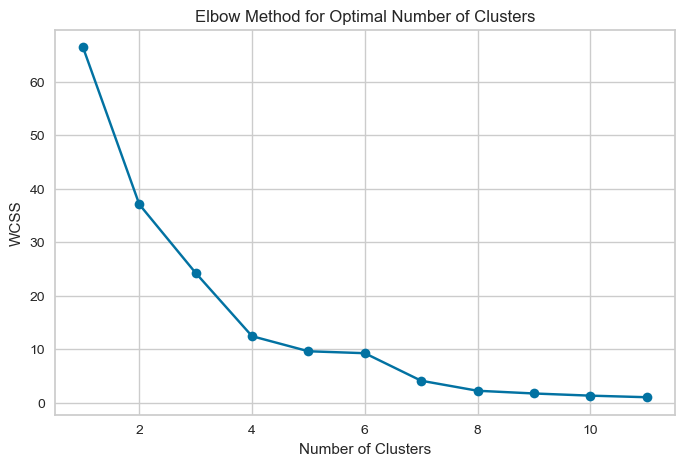

In [282]:
elbow_method(12, df_subgender.drop('genre', axis = 1))

In [283]:
num_cluster = 5
kmeans = KMeans(n_clusters=num_cluster)
df_subgender["cluster"] = kmeans.fit_predict(df_subgender.drop('genre', axis = 1))
df_subgender["cluster"] = df_subgender["cluster"].astype("category")

In [284]:
df_subgender.sort_values(by='cluster')

genre  median_budget     count cluster
0        Action       1.951220  0.938996       0
1     Adventure       2.926829  0.619305       0
18       Sci-Fi       1.512195  0.177606       0
8        Family       1.756098  0.089575       0
9       Fantasy       1.951220  0.160618       0
19        Sport       0.000000 -0.416988       1
16         News      -0.902439 -0.681081       1
14      Musical       0.000000 -0.494208       1
13        Music      -0.048780 -0.378378       1
12       Horror      -0.829268  0.083398       1
21          War       0.365854 -0.387645       1
22      Western       0.000000 -0.551351       1
6   Documentary      -1.707317 -0.565251       1
3     Biography       0.000000 -0.256371       1
10    Film-Noir      -1.825561 -0.676448       1
7         Drama       0.000000  2.883398       2
4        Comedy       0.000000  1.983012       2
2     Animation       4.878049 -0.336680       3
5         Crime       0.000000  0.568340       4
15      Mystery       0.000000  0.000000       4
17      Romance       0.000000  0.880309       4
20     Thriller       0.487805  1.278764       4
11      History       0.487805 -0.395367       4

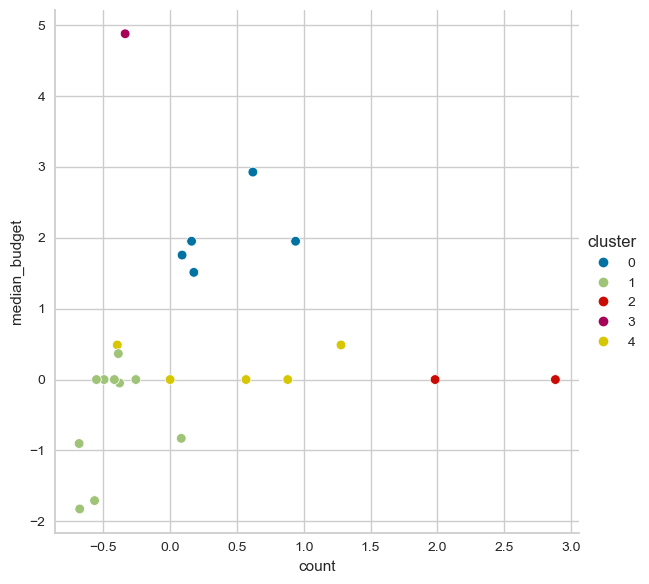

In [285]:
sns.relplot(x="count", y="median_budget", hue = 'cluster', data=df_subgender, height=6)

In [286]:
df_subgender['cluster'] = pd.to_numeric(df_subgender['cluster'])

In [287]:
df_subgender.loc[df_subgender['cluster'] == 4, 'cluster'] = 1

In [288]:
df_genre = df_genre_budget.drop('budget', axis = 1)

In [289]:
df_genre

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          1          1          0          0       0      0            0   
1          1          1          0          0       0      0            0   
2          1          1          0          0       0      0            0   
3          1          0          0          0       0      0            0   
4          1          1          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
4791       0          0          0          0       0      0            0   
4792       1          0          0          0       0      1            0   
4794       0          0          0          0       1      0            0   
4797       0          0          0          0       1      0            0   
4798       0          0          0          0       0      0            1   

      Drama  Family  Fantasy  ...  Music  Musical  Mystery  News  Romance  \
0         0       0        1  ...      0        0        0     0        0   
1         0       0        1  ...      0        0        0     0        0   
2         0       0        0  ...      0        0        0     0        0   
3         0       0        0  ...      0        0        0     0        0   
4         0       0        0  ...      0        0        0     0        0   
...     ...     ...      ...  ...    ...      ...      ...   ...      ...   
4791      0       0        0  ...      0        0        0     0        0   
4792      1       0        0  ...      0        0        0     0        1   
4794      1       0        0  ...      0        0        0     0        0   
4797      1       0        0  ...      0        0        0     0        1   
4798      0       0        0  ...      0        0        0     0        0   

      Sci-Fi  Sport  Thriller  War  Western  
0          1      0         0    0        0  
1          0      0         0    0        0  
2          0      0         1    0        0  
3          0      0         1    0        0  
4          1      0         0    0        0  
...      ...    ...       ...  ...      ...  
4791       0      0         1    0        0  
4792       0      0         1    0        0  
4794       0      0         0    0        0  
4797       0      0         0    0        0  
4798       0      0         0    0        0  

[4508 rows x 23 columns]

In [290]:
unique_cluster = df_subgender['cluster'].unique()

In [291]:
df_genre[unique_cluster] = 0

In [292]:
def update_clusters(row, df_subgender):
    genre_in_film = row[row == 1].index.tolist()
    num_clust_in_row = df_subgender.loc[df_subgender['genre'].isin(genre_in_film), 'cluster'].unique()
    row[num_clust_in_row] = 1
    return row

In [293]:
df_genre = df_genre.apply(lambda row: update_clusters(row, df_subgender), axis = 1)

In [294]:
df_genre

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0          1          1          0          0       0      0            0   
1          1          1          0          0       0      0            0   
2          1          1          0          0       0      0            0   
3          1          0          0          0       0      0            0   
4          1          1          0          0       0      0            0   
...      ...        ...        ...        ...     ...    ...          ...   
4791       0          0          0          0       0      0            0   
4792       1          0          0          0       0      1            0   
4794       0          0          0          0       1      0            0   
4797       0          0          0          0       1      0            0   
4798       0          0          0          0       0      0            1   

      Drama  Family  Fantasy  ...  Romance  Sci-Fi  Sport  Thriller  War  \
0         0       0        1  ...        0       1      0         0    0   
1         0       0        1  ...        0       0      0         0    0   
2         0       0        0  ...        0       0      0         1    0   
3         0       0        0  ...        0       0      0         1    0   
4         0       0        0  ...        0       1      0         0    0   
...     ...     ...      ...  ...      ...     ...    ...       ...  ...   
4791      0       0        0  ...        0       0      0         1    0   
4792      1       0        0  ...        1       0      0         1    0   
4794      1       0        0  ...        0       0      0         0    0   
4797      1       0        0  ...        1       0      0         0    0   
4798      0       0        0  ...        0       0      0         0    0   

      Western  0  3  1  2  
0           0  1  0  0  0  
1           0  1  0  0  0  
2           0  1  0  1  0  
3           0  1  0  1  0  
4           0  1  0  0  0  
...       ... .. .. .. ..  
4791        0  0  0  1  0  
4792        0  1  0  1  1  
4794        0  0  0  0  1  
4797        0  0  0  1  1  
4798        0  0  0  1  0  

[4508 rows x 27 columns]

In [295]:
df_film = df_film.join(df_genre[unique_cluster])

In [296]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0         1      James Cameron                   723.0     178.0   
1         1     Gore Verbinski                   302.0     169.0   
2         1         Sam Mendes                   602.0     148.0   
3         1  Christopher Nolan                   813.0     164.0   
4         1     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
4791      1   Neill Dela Llana                    35.0      80.0   
4792      1   Robert Rodriguez                    56.0      81.0   
4794      1       Edward Burns                    14.0      95.0   
4797      1        Daniel Hsia                    14.0     100.0   
4798      1           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0                  1000.0       Orlando Bloom   
2                         0.0                   161.0        Rory Kinnear   
3                     22000.0                 23000.0      Christian Bale   
4                       475.0                   530.0     Samantha Morton   
...                       ...                     ...                 ...   
4791                      0.0                     0.0     Edgar Tancangco   
4792                      0.0                     6.0     Peter Marquardt   
4794                      0.0                   133.0  Caitlin FitzGerald   
4797                      0.0                   489.0       Daniel Henney   
4798                     16.0                    16.0    Brian Herzlinger   

      actor_1_facebook_likes        gross     actor_1_name  ... Romance  \
0                     1000.0  760505847.0      CCH Pounder  ...       0   
1                    40000.0  309404152.0      Johnny Depp  ...       0   
2                    11000.0  200074175.0  Christoph Waltz  ...       0   
3                    27000.0  448130642.0        Tom Hardy  ...       0   
4                      640.0   73058679.0     Daryl Sabara  ...       0   
...                      ...          ...              ...  ...     ...   
4791                     0.0      70071.0      Ian Gamazon  ...       0   
4792                   121.0    2040920.0  Carlos Gallardo  ...       1   
4794                   296.0       4584.0      Kerry Bishé  ...       0   
4797                   946.0      10443.0        Alan Ruck  ...       1   
4798                    86.0      85222.0      John August  ...       0   

      Sci-Fi  Sport Thriller  War Western  0  3  1  2  
0          1      0        0    0       0  1  0  0  0  
1          0      0        0    0       0  1  0  0  0  
2          0      0        1    0       0  1  0  1  0  
3          0      0        1    0       0  1  0  1  0  
4          1      0        0    0       0  1  0  0  0  
...      ...    ...      ...  ...     ... .. .. .. ..  
4791       0      0        1    0       0  0  0  1  0  
4792       0      0        1    0       0  1  0  1  1  
4794       0      0        0    0       0  0  0  0  1  
4797       0      0        0    0       0  0  0  1  1  
4798       0      0        0    0       0  0  0  1  0  

[4508 rows x 56 columns]

In [297]:
#df_film.drop(name_genres, axis = 1, inplace = True)

In [298]:
df_film

color      director_name  num_critic_for_reviews  duration  \
0         1      James Cameron                   723.0     178.0   
1         1     Gore Verbinski                   302.0     169.0   
2         1         Sam Mendes                   602.0     148.0   
3         1  Christopher Nolan                   813.0     164.0   
4         1     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
4791      1   Neill Dela Llana                    35.0      80.0   
4792      1   Robert Rodriguez                    56.0      81.0   
4794      1       Edward Burns                    14.0      95.0   
4797      1        Daniel Hsia                    14.0     100.0   
4798      1           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0                  1000.0       Orlando Bloom   
2                         0.0                   161.0        Rory Kinnear   
3                     22000.0                 23000.0      Christian Bale   
4                       475.0                   530.0     Samantha Morton   
...                       ...                     ...                 ...   
4791                      0.0                     0.0     Edgar Tancangco   
4792                      0.0                     6.0     Peter Marquardt   
4794                      0.0                   133.0  Caitlin FitzGerald   
4797                      0.0                   489.0       Daniel Henney   
4798                     16.0                    16.0    Brian Herzlinger   

      actor_1_facebook_likes        gross     actor_1_name  ... Romance  \
0                     1000.0  760505847.0      CCH Pounder  ...       0   
1                    40000.0  309404152.0      Johnny Depp  ...       0   
2                    11000.0  200074175.0  Christoph Waltz  ...       0   
3                    27000.0  448130642.0        Tom Hardy  ...       0   
4                      640.0   73058679.0     Daryl Sabara  ...       0   
...                      ...          ...              ...  ...     ...   
4791                     0.0      70071.0      Ian Gamazon  ...       0   
4792                   121.0    2040920.0  Carlos Gallardo  ...       1   
4794                   296.0       4584.0      Kerry Bishé  ...       0   
4797                   946.0      10443.0        Alan Ruck  ...       1   
4798                    86.0      85222.0      John August  ...       0   

      Sci-Fi  Sport Thriller  War Western  0  3  1  2  
0          1      0        0    0       0  1  0  0  0  
1          0      0        0    0       0  1  0  0  0  
2          0      0        1    0       0  1  0  1  0  
3          0      0        1    0       0  1  0  1  0  
4          1      0        0    0       0  1  0  0  0  
...      ...    ...      ...  ...     ... .. .. .. ..  
4791       0      0        1    0       0  0  0  1  0  
4792       0      0        1    0       0  1  0  1  1  
4794       0      0        0    0       0  0  0  0  1  
4797       0      0        0    0       0  0  0  1  1  
4798       0      0        0    0       0  0  0  1  0  

[4508 rows x 56 columns]

In [299]:
df_film.rename(columns={0: 'genre_aver_bud_aver_freq', 1: 'genre_high_bud_aver_freq', 2 : 'genre_aver_bud_high_freq', 3:'genre_low_bud_low_freq'}, inplace = True)

In [300]:
df_film[(df_film['genre_aver_bud_aver_freq'] == 1) & (df_film['genre_aver_bud_high_freq'] == 1) & (df_film['genre_low_bud_low_freq'] == 1) & (df_film['genre_high_bud_aver_freq'] == 1)]

color        director_name  num_critic_for_reviews  duration  \
6         1         Nathan Greno                   324.0     100.0   
38        1        John Lasseter                   304.0     106.0   
121       1           Chris Buck                   406.0     102.0   
168       1        George Miller                   156.0     100.0   
172       1          David Soren                   166.0      96.0   
173       1       Gore Verbinski                   362.0     107.0   
199       1      Carlos Saldanha                   159.0     101.0   
251       1            Will Finn                   104.0      76.0   
283       1       Gary Trousdale                    80.0      91.0   
313       1          Ash Brannon                   154.0      85.0   
319       1        Bibo Bergeron                    82.0      89.0   
351       1          Walt Becker                    70.0      92.0   
366       1      Carlos Saldanha                   240.0      96.0   
377       1        George Miller                   206.0     108.0   
383       1           Kevin Lima                   222.0     107.0   
426       1        Mike Mitchell                    91.0      87.0   
443       1            Joe Pytka                    46.0      88.0   
485       1         Roger Allers                   186.0      73.0   
524       1            Gil Kenan                   190.0      91.0   
556       1       Andrew Adamson                   205.0      93.0   
557       1        John Lasseter                   256.0     117.0   
569       1         Betty Thomas                   107.0      88.0   
595       1       Bobby Farrelly                    81.0      95.0   
689       1       Brenda Chapman                   120.0      99.0   
759       1      Patrick Gilmore                    98.0      85.0   
800       1             Tim Hill                   131.0      92.0   
802       1         Mike Gabriel                    92.0      84.0   
862       1            Don Bluth                    78.0      94.0   
930       1   Jorge R. Gutiérrez                   156.0      95.0   
1231      1     Frederik Du Chau                    34.0      86.0   
1242      1         Wes Anderson                   335.0      87.0   
1262      1        Marc F. Adler                    41.0      94.0   
1271      1        Bibo Bergeron                    63.0      90.0   
1277      0           Tim Burton                   370.0      87.0   
1406      1         Gary Chapman                    93.0      76.0   
1500      1          Mark Dindal                    18.0      75.0   
1541      1       Stig Bergqvist                    41.0      78.0   
1566      1            Steve Box                   209.0      85.0   
1573      1           Tim Burton                   267.0      77.0   
1596      1          Shane Acker                   263.0      79.0   
1599      1  Stephen J. Anderson                   162.0      63.0   
1674      1         Ron Clements                   124.0      90.0   
1677      1        Igor Kovalyov                    45.0      83.0   
1836      1             John Eng                    45.0      80.0   
2049      1          Trey Parker                   163.0      81.0   
2102      1      Jun Falkenstein                    89.0      77.0   
2145      1         Anthony Bell                    84.0      90.0   
2219      1    Richard Linklater                   232.0     100.0   
2379      1         Cory Edwards                   142.0      80.0   
2665      1        Mike Nawrocki                    38.0      82.0   
2797      1      Stéphane Aubier                    99.0      80.0   
2807      1           Mike Judge                    63.0      81.0   
2981      1         Chuck Sheetz                    44.0      82.0   
3046      1    Timothy Björklund                    33.0      74.0   
4039      1           Jerry Rees                    17.0      90.0   
4113      1        Jugal Hansraj                     6.0      93.0   

      director_

##### for 3 clusters of genres (BUFF)

In [302]:
#df_film.rename(columns={2: 'genre_high_gr_aver_freq', 0: 'genre_aver_gr_high_freq', 1:'genre_low_gr_low_freq'}, inplace = True)

In [303]:
#df_film[(df_film['genre_high_gr_aver_freq'] == 1) & (df_film['genre_aver_gr_high_freq'] == 1) & (df_film['genre_low_gr_low_freq'] == 1)]

### Category_year_film

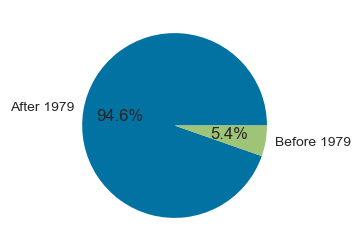

In [305]:
plt.figure(figsize=(7, 3))
plt.pie(df_film['categ_year_film'].value_counts().values, labels = df_film['categ_year_film'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [306]:
df_film['categ_year_film'] = label_encoder.fit_transform(df_film['categ_year_film'])

In [307]:
df_film['categ_year_film'].value_counts()

categ_year_film
0    4266
1     242
Name: count, dtype: int64

### Aspect ratio

In [309]:
df_film['aspect_ratio'].value_counts()

aspect_ratio
2.35     2281
1.85     1917
1.37       93
1.78       70
1.66       60
1.33       31
2.20       14
2.39       14
16.00       5
2.00        4
2.76        3
1.75        3
2.40        3
1.50        2
2.24        2
2.55        2
1.77        1
1.18        1
1.20        1
1.89        1
Name: count, dtype: int64

In [310]:
sorted(df_film['aspect_ratio'].unique())

[1.18,
 1.2,
 1.33,
 1.37,
 1.5,
 1.66,
 1.75,
 1.77,
 1.78,
 1.85,
 1.89,
 2.0,
 2.2,
 2.24,
 2.35,
 2.39,
 2.4,
 2.55,
 2.76,
 16.0]

In [311]:
df_film.loc[df_film['aspect_ratio'] == 16.00, ['movie_title', 'movie_imdb_link']]

movie_title  \
4401                                 Frat Party   
4519  Sholem Aleichem: Laughing in the Darkness   
4552                         The King of Najayo   
4727                      Indie Game: The Movie   
4754                      This Is Martin Bonner   

                                        movie_imdb_link  
4401  http://www.imdb.com/title/tt1414361/?ref_=fn_t...  
4519  http://www.imdb.com/title/tt1976608/?ref_=fn_t...  
4552  http://www.imdb.com/title/tt2275671/?ref_=fn_t...  
4727  http://www.imdb.com/title/tt1942884/?ref_=fn_t...  
4754  http://www.imdb.com/title/tt1798291/?ref_=fn_t...

In [312]:
df_film.loc[df_film['aspect_ratio'] < 2, 'aspect_ratio'] = 1.85

In [313]:
df_film.loc[df_film['aspect_ratio'] >= 2, 'aspect_ratio'] = 2.35

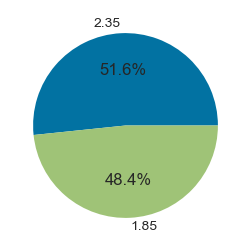

In [314]:
plt.figure(figsize=(7, 3))
plt.pie(df_film['aspect_ratio'].value_counts().values, labels = df_film['aspect_ratio'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [315]:
df_film.loc[df_film['aspect_ratio'] == 1.85, 'aspect_ratio'] = 0
df_film.loc[df_film['aspect_ratio'] == 2.35, 'aspect_ratio'] = 1

### Content rating

In [317]:
df_film['content_rating'].value_counts()

content_rating
R            2061
PG-13        1395
PG            678
G             109
Not Rated     107
Unrated        57
Approved       54
X              12
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           1
Name: count, dtype: int64

In [318]:
df_film.dropna(subset=['gross'])['content_rating'].value_counts()

content_rating
R            1816
PG-13        1345
PG            591
G              93
Not Rated      52
Unrated        33
Approved       18
X               9
NC-17           6
Passed          3
M               2
GP              1
Name: count, dtype: int64

#### Join ratings which are totally the same but in different years have different names and rating without gross (TV) 

In [320]:
df_film.loc[df_film['content_rating'].isin(['PG', 'GP', 'M', 'TV-PG']), 'content_rating'] = 'PG'

In [321]:
df_film.loc[df_film['content_rating'].isin(['G','TV-G']), 'content_rating'] = 'G'

In [322]:
df_film.loc[df_film['content_rating'].isin(['TV-14','PG-13']), 'content_rating'] = 'PG-13'

In [323]:
df_film.loc[df_film['content_rating'].isin(['X', 'NC-17']), 'content_rating'] = 'NC-17'

In [324]:
df_film.loc[df_film['content_rating'].isin(['Unrated', 'Not Rated']), 'content_rating'] = 'Unrated'

In [325]:
df_film.loc[df_film['content_rating'].isin(['Approved', 'Passed']), 'content_rating'] = 'Passed'

<Axes: xlabel='content_rating', ylabel='gross'>

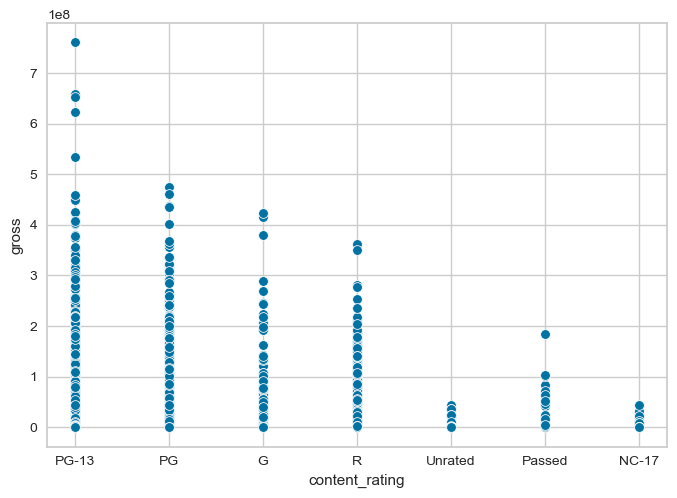

In [326]:
sns.scatterplot(data = df_film, x="content_rating", y="gross")

#### Clustering analysis

In [328]:
df_film_buff = df_film.copy()

In [329]:
scaler = RobustScaler()
df_film_buff[['gross']] = scaler.fit_transform(df_film_buff[['gross']])

In [330]:
rating_med_gross = df_film_buff.groupby('content_rating')['gross'].median()

In [331]:
rating_med_gross

content_rating
G          0.546993
NC-17     -0.311034
PG         0.371379
PG-13      0.200186
Passed    -0.015433
R         -0.186115
Unrated   -0.447798
Name: gross, dtype: float64

In [332]:
df_rating = rating_med_gross.reset_index()

##### Silhouette method for define the number of clusters

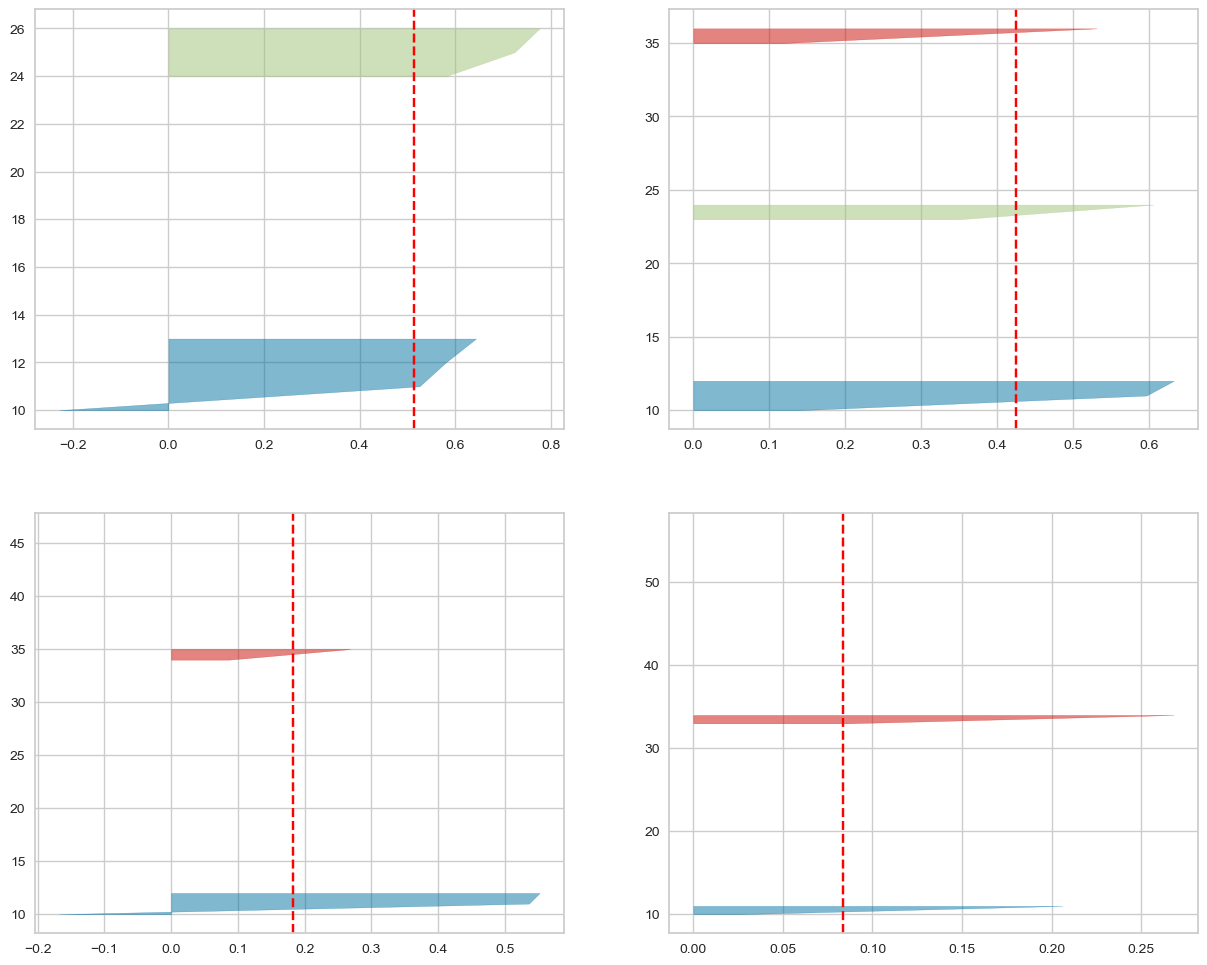

In [334]:
silhouette([2, 3, 4, 5], df_rating.drop('content_rating', axis = 1))

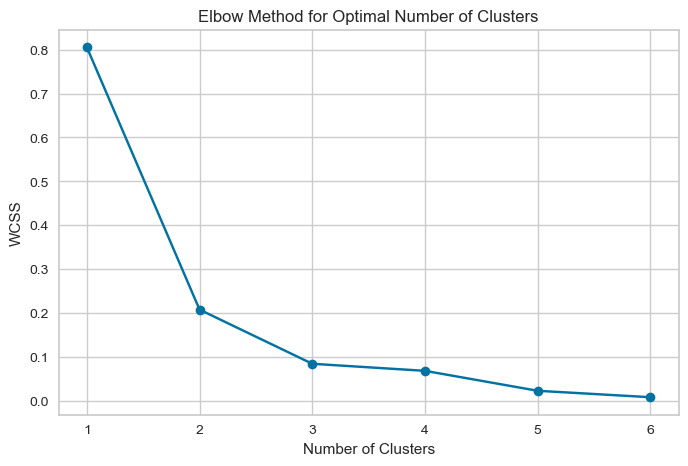

In [335]:
elbow_method(7, df_rating.drop('content_rating', axis = 1))

In [336]:
num_cluster = 2
kmeans = KMeans(n_clusters=num_cluster)
df_rating["cluster"] = kmeans.fit_predict(df_rating.drop(['content_rating'], axis = 1))
df_rating["cluster"] = df_rating["cluster"].astype("category")

In [337]:
df_rating

content_rating     gross cluster
0              G  0.546993       0
1          NC-17 -0.311034       1
2             PG  0.371379       0
3          PG-13  0.200186       0
4         Passed -0.015433       1
5              R -0.186115       1
6        Unrated -0.447798       1

<Axes: xlabel='gross'>

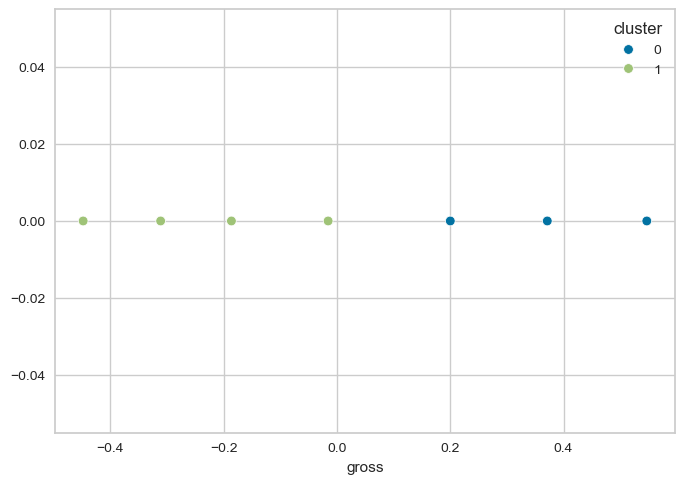

In [338]:
sns.scatterplot(x=df_rating["gross"], y=np.array([0]*df_rating.shape[0]), hue = df_rating['cluster'])

#### using succes_categ for group rating (buff)

In [340]:
#df_film_buff = df_film.copy()

In [341]:
#scaler = RobustScaler()
#df_film_buff[['gross', 'budget']] = scaler.fit_transform(df_film_buff[['gross', 'budget']])

In [342]:
#rating_med_gross = df_film_buff.groupby('content_rating')['gross'].median()

In [343]:
#rating_med_gross

In [344]:
#rating_med_budget = df_film_buff.groupby('content_rating')['budget'].median()

In [345]:
#rating_med_budget

In [346]:
#df_rating = pd.merge(rating_med_gross, rating_med_budget, on = 'content_rating')

In [347]:
#df_rating = df_rating.reset_index()

In [348]:
#df_rating['succes_categ'] = df_rating['gross']/ df_rating['budget']

In [349]:
#df_rating

In [350]:
#df_rating.drop(['budget', 'gross'], axis = 1, inplace = True)

In [351]:
#silhouette([2, 3, 4, 5], df_rating.drop('content_rating', axis = 1))

In [352]:
#elbow_method(7, df_rating.drop('content_rating', axis = 1))

In [353]:
#num_cluster = 2
#kmeans = KMeans(n_clusters=num_cluster)
#df_rating["cluster"] = kmeans.fit_predict(df_rating.drop(['content_rating'], axis = 1))
#df_rating["cluster"] = df_rating["cluster"].astype("category")

In [354]:
#df_rating

In [355]:
#sns.scatterplot(x=df_rating["succes_categ"], y=np.array([0]*df_rating.shape[0]), hue = df_rating['cluster'])

##### Explore films when content_rating == 'Passed' (Why it's necessary to use RobustScaler)

In [357]:
#df_film.dropna(subset=['gross']).loc[df_film['content_rating'] == 'Passed', 'title_year'].sort_values()

In [358]:
#df_film.dropna(subset=['gross']).loc[df_film['content_rating'] == 'Passed', 'gross'].sort_values()

In [359]:
#df_film.iloc[4250]

###### The films with such characteristic (year, color etc.) couldn't be more sucessful in 8 times comparing with others 

#### Filling content rating using subrating

In [362]:
df_rating.drop('gross', axis = 1, inplace = True)

In [363]:
df_rating

content_rating cluster
0              G       0
1          NC-17       1
2             PG       0
3          PG-13       0
4         Passed       1
5              R       1
6        Unrated       1

In [364]:
df_rating['cluster'] = pd.to_numeric(df_rating['cluster'])

In [365]:
df_film = pd.merge(df_film, df_rating, how ='left', on ='content_rating')

In [366]:
df_film.rename(columns = {'cluster': 'content_rating_high_gross'}, inplace = True)

In [367]:
df_film.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'movie_imdb_link', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'war_symb_title', 'categ_year_film',
       'name_country', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'genre_aver_bud_aver_freq', 'genre_low_bud_low_freq',
       'genre_high_bud_aver_freq', 'genre_aver_bud_high_freq',
       'content_ra

In [368]:
df_film.content_rating_high_gross.value_counts()

content_rating_high_gross
1    2307
0    2201
Name: count, dtype: int64

#### Manual joining rating (buff)

In [370]:
#df_film.loc[df_film['content_rating'].isin(['R', 'X', 'NC-17']), 'content_rating'] = 'Udult'

In [371]:
#df_film.loc[df_film['content_rating'].isin(['PG-13', 'PG', 'Approved', 'Passed', 'GP', 'M', 'TV-14', 'TV-PG']), 'content_rating'] = 'Under_control'

In [372]:
#df_film.loc[df_film['content_rating'].isin(['G', 'TV-G']), 'content_rating'] = 'General'

In [373]:
#df_film.loc[df_film['content_rating'].isin(['Not Rated', 'Unrated']), 'content_rating'] = 'Not_rate'

In [374]:
#df_film['content_rating'].value_counts()

In [375]:
#sns.scatterplot(data = df_film, y="content_rating", x="gross")

## Outliers

##### IQR def

In [378]:
def find_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = col < (Q1 - 1.5 * IQR)
    upper = col > (Q3 + 1.5 * IQR)
    outliers = (lower) | (upper)
    outliers = col[outliers]
    return outliers

##### winsorizing

In [380]:
def winorizing(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    low_whisker = Q1 - 1.5 * (Q3 - Q1)
    high_whisker = Q3 + 1.5 * (Q3 - Q1)
    df.loc[df[col] < low_whisker, col] = low_whisker
    df.loc[df[col] > high_whisker, col] = high_whisker
    return df[col]

#### Duration

<Axes: ylabel='duration'>

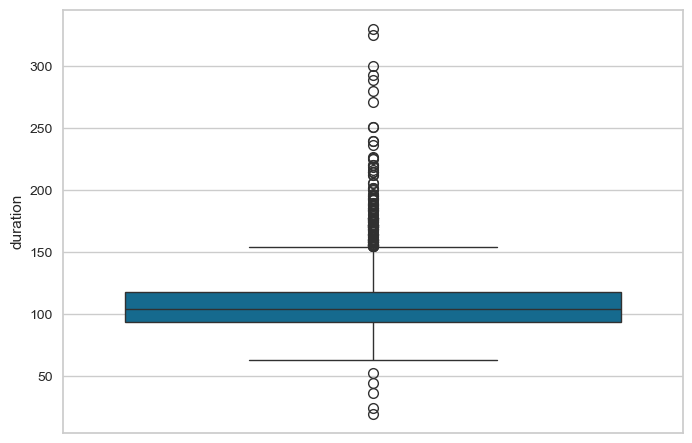

In [382]:
sns.boxplot(df_film['duration'])

<Axes: xlabel='duration', ylabel='Count'>

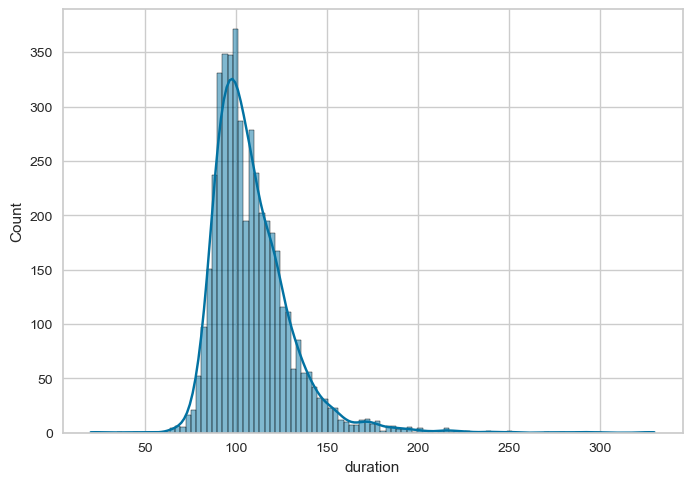

In [383]:
sns.histplot(df_film['duration'], kde= True)

In [384]:
outlier_dur = find_outliers_iqr(df_film['duration'])

In [385]:
outlier_dur.index

Index([   0,    1,    3,    5,    9,   10,   16,   19,   21,   22,
       ...
       3795, 3923, 4016, 4090, 4200, 4276, 4280, 4289, 4317, 4447],
      dtype='int64', length=153)

In [386]:
Q1 = df_film['duration'].quantile(0.25)
Q3 = df_film['duration'].quantile(0.75)
upper = df_film.loc[ df_film['duration'] > (Q3 + 1.5 * (Q3-Q1)), 'duration']
upper

0       178.0
1       169.0
3       164.0
5       156.0
9       183.0
        ...  
4016    160.0
4276    170.0
4280    201.0
4289    215.0
4317    202.0
Name: duration, Length: 148, dtype: float64

##### check the pattern of the year

In [388]:
df_film.loc[upper.index, 'categ_year_film'].value_counts()

categ_year_film
0    118
1     30
Name: count, dtype: int64

##### check the pattern of the content rating

In [390]:
df_film.loc[upper.index, 'content_rating'].value_counts()

content_rating
R          63
PG-13      44
PG         16
Unrated    12
G           7
Passed      6
Name: count, dtype: int64

##### check the pattern of the genres

In [392]:
def find_num_each_genre(df):
    df_dur_gen = df[['duration']+ name_genres]
    ser_gen = df_dur_gen.drop('duration', axis = 1).sum(axis= 0)
    ser_gen = ser_gen.sort_values(ascending = False)
    df_gen = ser_gen.reset_index()
    return df_gen

In [393]:
df_gen = find_num_each_genre(df_film)

In [394]:
df_gen

index     0
0         Drama  2310
1        Comedy  1727
2      Thriller  1271
3        Action  1051
4       Romance  1013
5     Adventure   844
6         Crime   811
7        Sci-Fi   558
8       Fantasy   547
9        Family   501
10       Horror   497
11      Mystery   443
12    Biography   277
13    Animation   225
14        Music   198
15          War   192
16      History   187
17        Sport   173
18      Musical   123
19      Western    86
20  Documentary    77
21    Film-Noir     5
22         News     2

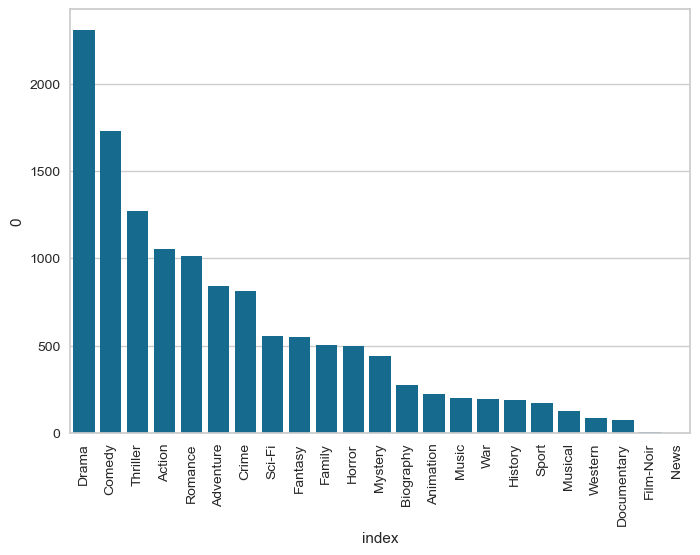

In [395]:
sns.barplot(x = 'index', y = 0, data = df_gen)
plt.xticks(rotation=90);

In [396]:
df_over_outl = df_film.loc[upper.index]

In [397]:
df_over_outl

color      director_name  num_critic_for_reviews  duration  \
0         1      James Cameron                   723.0     178.0   
1         1     Gore Verbinski                   302.0     169.0   
3         1  Christopher Nolan                   813.0     164.0   
5         1          Sam Raimi                   392.0     156.0   
9         1        Zack Snyder                   673.0     183.0   
...     ...                ...                     ...       ...   
4016      1               Remo                    15.0     160.0   
4276      1        Steve James                    53.0     170.0   
4280      1      Peter Jackson                   446.0     201.0   
4289      1   Michael Wadleigh                    53.0     215.0   
4317      0     Akira Kurosawa                   153.0     202.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0                  1000.0       Orlando Bloom   
3                     22000.0                 23000.0      Christian Bale   
5                         0.0                  4000.0        James Franco   
9                         0.0                  2000.0        Lauren Cohan   
...                       ...                     ...                 ...   
4016                    168.0                    71.0                Remo   
4276                     23.0                     2.0         Arthur Agee   
4280                      0.0                    84.0  Thomas Kretschmann   
4289                     14.0                   136.0        Jimi Hendrix   
4317                      0.0                     4.0       Minoru Chiaki   

      actor_1_facebook_likes        gross     actor_1_name  ... Sci-Fi  Sport  \
0                     1000.0  760505847.0      CCH Pounder  ...      1      0   
1                    40000.0  309404152.0      Johnny Depp  ...      0      0   
3                    27000.0  448130642.0        Tom Hardy  ...      0      0   
5                    24000.0  336530303.0     J.K. Simmons  ...      0      0   
9                    15000.0  330249062.0     Henry Cavill  ...      1      0   
...                      ...          ...              ...  ...    ...    ...   
4016                   733.0      95236.0  Lauren Gottlieb  ...      0      0   
4276                     7.0    7830611.0    William Gates  ...      0      1   
4280                  6000.0  218051260.0      Naomi Watts  ...      0      0   
4289                   262.0   13300000.0       Joe Cocker  ...      0      0   
4317                   304.0     269061.0  Takashi Shimura  ...      0      0   

      Thriller War  Western genre_aver_bud_aver_freq  genre_low_bud_low_freq  \
0            0   0        0                        1                       0   
1            0   0        0                        1                       0   
3            1   0        0                        1                       0   
5            0   0        0                        1                       0   
9            0   0        0                        1                       0   
...        ...  ..      ...                      ...                     ...   
4016         0   0        0                        0                       0   
4276         0   0        0                        0                       0   
4280         0   0        0                        1                       0   
4289         0   0        0                        0                       0   
4317         0   0        0                        1                       0   

      genre_high_bud_aver_freq  genre_aver_bud_high_freq  \
0                            0                         0   
1                            0                         0   
3                            1                         0   
5                            1                         0   
9                            0

In [398]:
df_genre_out_over = find_num_each_genre(df_over_outl)

In [399]:
df_genre_out_over

index    0
0         Drama  120
1     Adventure   48
2       History   43
3        Action   36
4       Romance   32
5           War   31
6     Biography   31
7      Thriller   22
8         Crime   22
9        Sci-Fi   19
10      Fantasy   17
11      Mystery   13
12      Western   10
13      Musical    8
14       Family    7
15       Comedy    6
16       Horror    4
17        Music    4
18        Sport    3
19  Documentary    2
20         News    0
21    Animation    0
22    Film-Noir    0

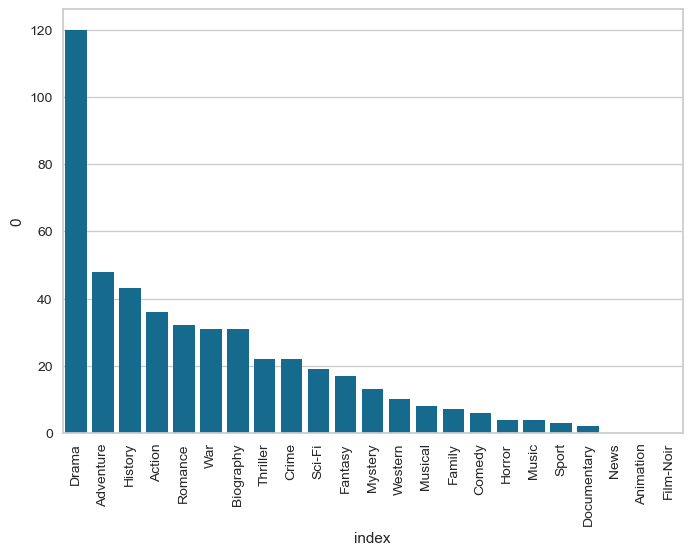

In [400]:
sns.barplot(x = 'index', y = 0, data = df_genre_out_over)
plt.xticks(rotation=90);

In [401]:
df_filter_dur = df_film.loc[(~df_film.index.isin(upper.index)) & (df_film['Drama'] == 1), 'duration']

In [402]:
df_filter_dur.max()

154.0

In [403]:
df_film.loc[upper.index, 'duration'] = df_filter_dur.max()

In [404]:
df_film.loc[upper.index, 'duration']

0       154.0
1       154.0
3       154.0
5       154.0
9       154.0
        ...  
4016    154.0
4276    154.0
4280    154.0
4289    154.0
4317    154.0
Name: duration, Length: 148, dtype: float64

<Axes: ylabel='duration'>

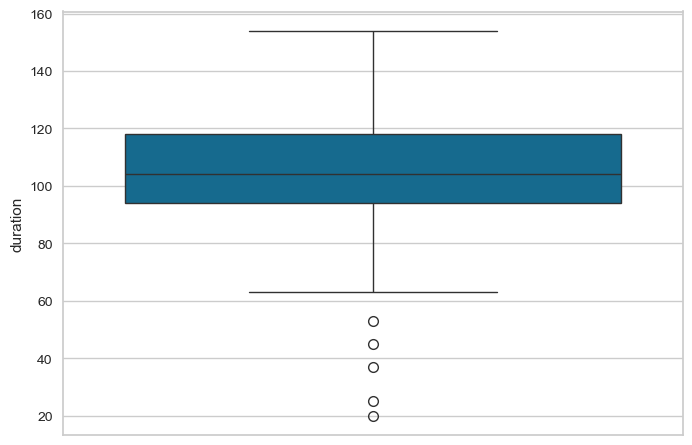

In [405]:
sns.boxplot(df_film['duration'])

In [406]:
outlier_under = find_outliers_iqr(df_film['duration'])

In [407]:
outlier_under.index

Index([3130, 3727, 4090, 4200, 4447], dtype='int64')

In [408]:
df_under_outl = df_film.loc[outlier_under.index]

In [409]:
df_gen_out_under = find_num_each_genre(df_under_outl)

In [410]:
df_gen_out_under

index  0
0           War  2
1        Comedy  2
2   Documentary  2
3      Thriller  2
4       History  1
5     Animation  1
6         Crime  1
7         Drama  1
8        Family  1
9       Fantasy  1
10       Horror  1
11         News  0
12        Sport  0
13       Sci-Fi  0
14      Romance  0
15       Action  0
16      Mystery  0
17      Musical  0
18        Music  0
19    Adventure  0
20    Film-Noir  0
21    Biography  0
22      Western  0

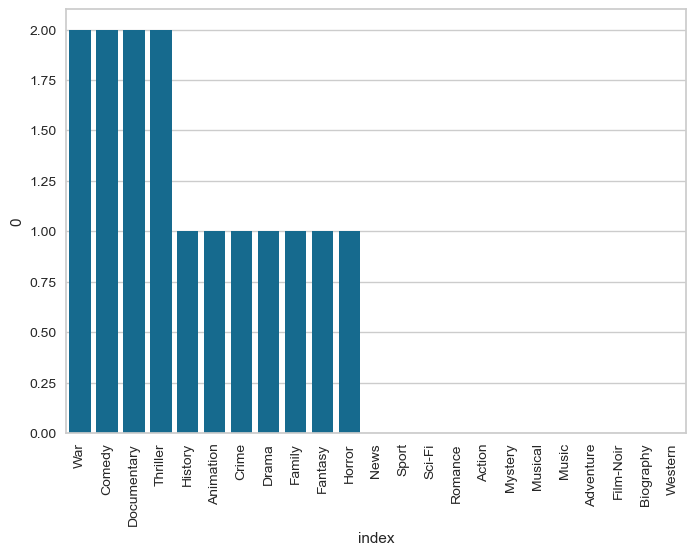

In [411]:
sns.barplot(x = 'index', y = 0, data = df_gen_out_under)
plt.xticks(rotation=90);

In [412]:
df_filter_dur_minus_under_out = df_film.loc[(~df_film.index.isin(outlier_under.index)) & (df_film['Comedy'] == 1), 'duration']

In [413]:
df_filter_dur_minus_under_out

6       100.0
18      106.0
33      104.0
38      106.0
40      103.0
        ...  
4495    100.0
4497     85.0
4499    108.0
4505     95.0
4506    100.0
Name: duration, Length: 1725, dtype: float64

In [414]:
df_filter_dur_minus_under_out.min()

63.0

In [415]:
df_film.loc[outlier_under.index, 'duration'] = df_filter_dur_minus_under_out.min()

<Axes: ylabel='duration'>

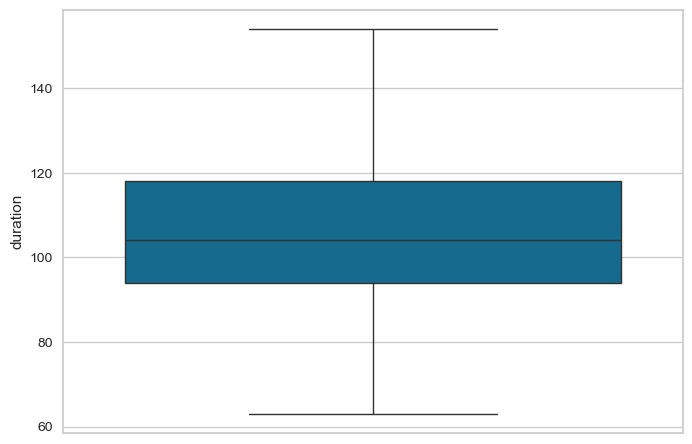

In [416]:
sns.boxplot(df_film['duration'])

<Axes: xlabel='duration', ylabel='Count'>

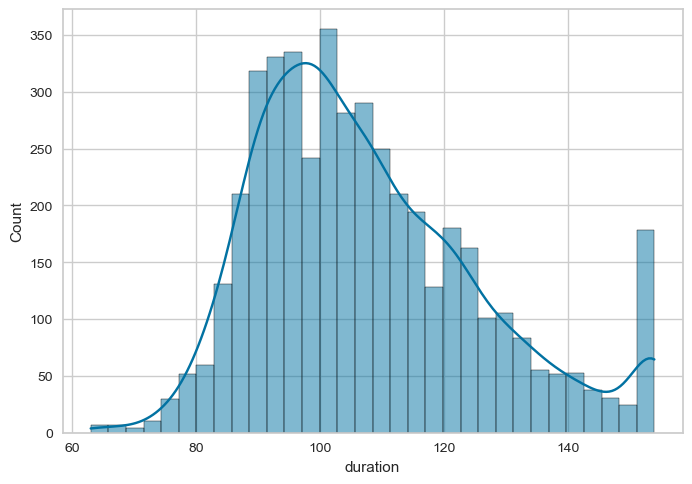

In [417]:
sns.histplot(df_film['duration'], kde= True)

#### imdb_score

<Axes: ylabel='imdb_score'>

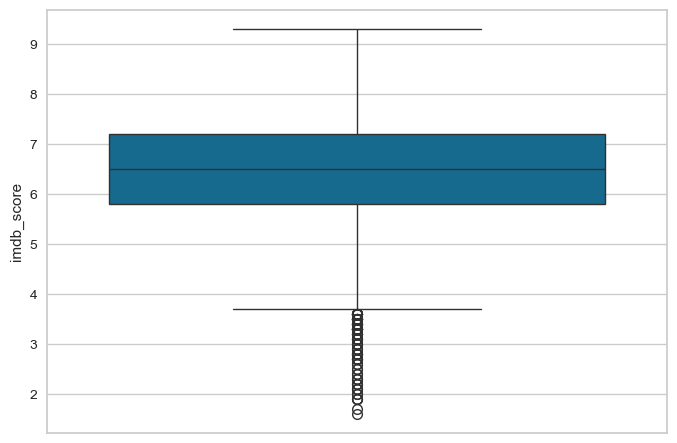

In [419]:
sns.boxplot(df_film['imdb_score'])

In [420]:
outl_imdb_score = find_outliers_iqr(df_film['imdb_score'])

In [421]:
outl_imdb_score

292     3.3
298     2.2
464     2.4
483     3.4
585     3.0
       ... 
4383    3.2
4408    2.5
4460    3.2
4481    3.4
4486    3.2
Name: imdb_score, Length: 101, dtype: float64

In [422]:
df_film.loc[298, ['imdb_score', 'movie_imdb_link']]

imdb_score                                                       2.2
movie_imdb_link    http://www.imdb.com/title/tt0362165/?ref_=fn_t...
Name: 298, dtype: object

In [423]:
df_film['imdb_score'].describe()

count    4508.000000
mean        6.421029
std         1.105838
min         1.600000
25%         5.800000
50%         6.500000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

In [424]:
df_film.loc[~df_film.index.isin(outl_imdb_score.index), 'imdb_score'].describe()

count    4407.000000
mean        6.499183
std         0.985857
min         3.700000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.300000
Name: imdb_score, dtype: float64

In [425]:
df_film['imdb_score'] = winorizing(df_film, 'imdb_score')

<Axes: xlabel='imdb_score', ylabel='Count'>

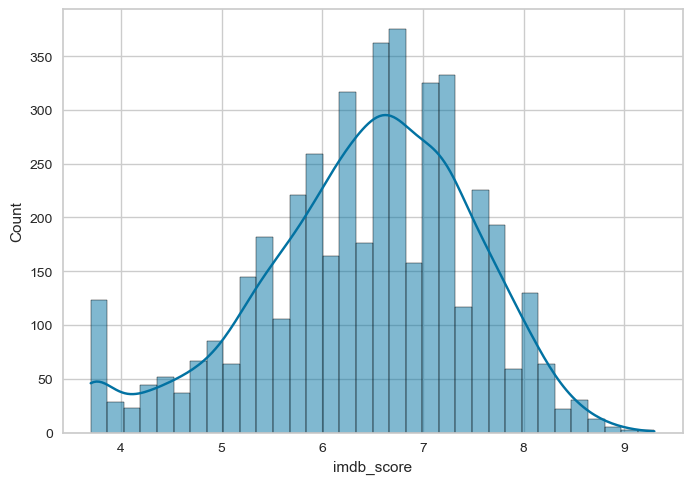

In [426]:
sns.histplot(df_film['imdb_score'], kde= True)

<Axes: ylabel='imdb_score'>

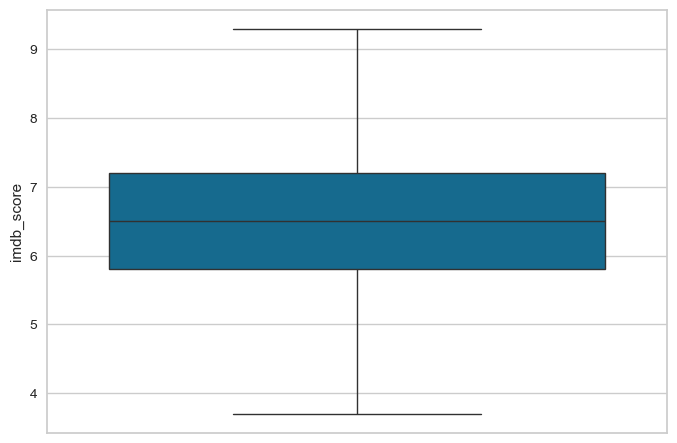

In [427]:
sns.boxplot(df_film['imdb_score'])

#### num_critic_for_reviews

<Axes: ylabel='num_critic_for_reviews'>

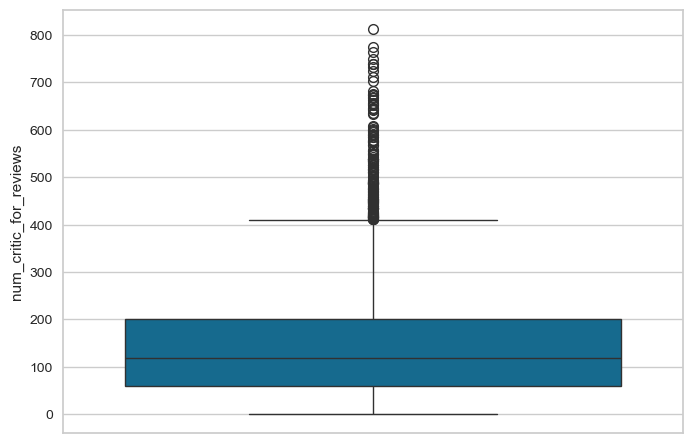

In [429]:
sns.boxplot(df_film['num_critic_for_reviews'])

<Axes: xlabel='num_critic_for_reviews', ylabel='Count'>

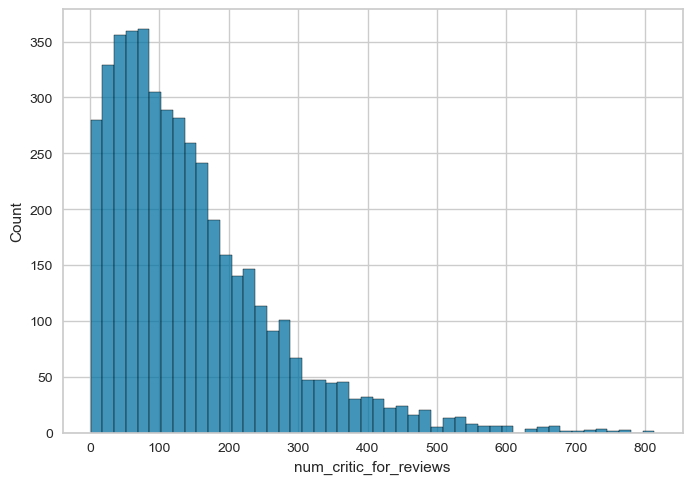

In [430]:
sns.histplot(df_film['num_critic_for_reviews'])

In [431]:
find_outliers_iqr(df_film['num_critic_for_reviews'])

0       723.0
2       602.0
3       813.0
4       462.0
7       635.0
        ...  
3931    533.0
4024    663.0
4066    445.0
4147    481.0
4280    446.0
Name: num_critic_for_reviews, Length: 191, dtype: float64

##### log transformation could be useful for right skwed distribution

<Axes: ylabel='num_critic_for_reviews'>

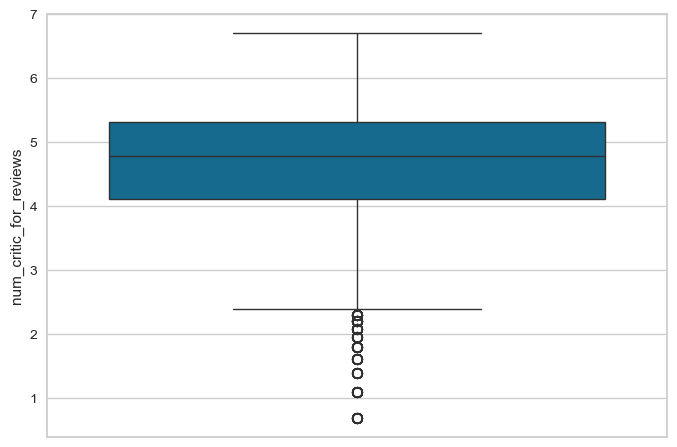

In [433]:
sns.boxplot(np.log1p(df_film['num_critic_for_reviews']))

<Axes: xlabel='num_critic_for_reviews', ylabel='Count'>

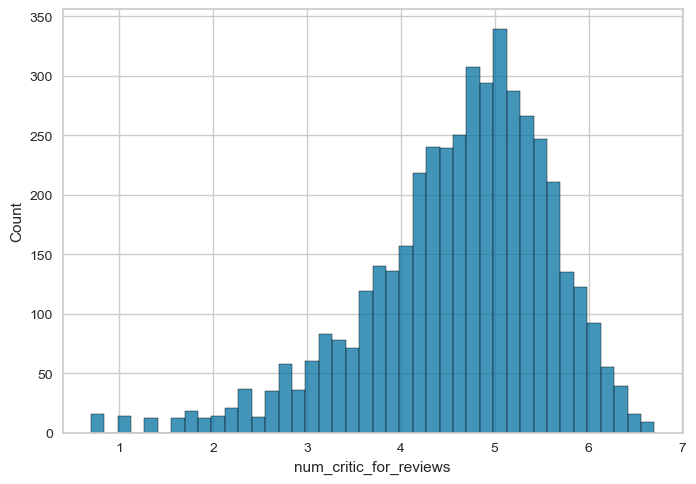

In [434]:
sns.histplot(np.log1p(df_film['num_critic_for_reviews']))

In [435]:
df_film['num_critic_for_reviews'] = np.log1p(df_film['num_critic_for_reviews'])

In [436]:
outl_num_critic_for_reviews = find_outliers_iqr(df_film['num_critic_for_reviews'])

In [437]:
outl_num_critic_for_reviews

476     1.386294
1044    2.197225
1641    2.079442
1907    1.609438
1912    2.079442
          ...   
4466    1.791759
4468    1.791759
4479    0.693147
4486    1.098612
4489    1.386294
Name: num_critic_for_reviews, Length: 137, dtype: float64

In [438]:
df_film['num_critic_for_reviews'] = winorizing(df_film, 'num_critic_for_reviews')

<Axes: xlabel='num_critic_for_reviews', ylabel='Count'>

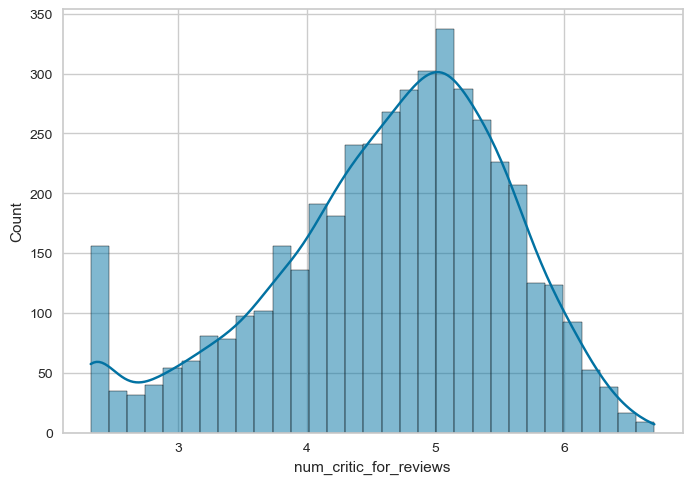

In [439]:
sns.histplot(df_film['num_critic_for_reviews'], kde= True)

#### num_user_for_reviews

<Axes: xlabel='num_user_for_reviews', ylabel='Count'>

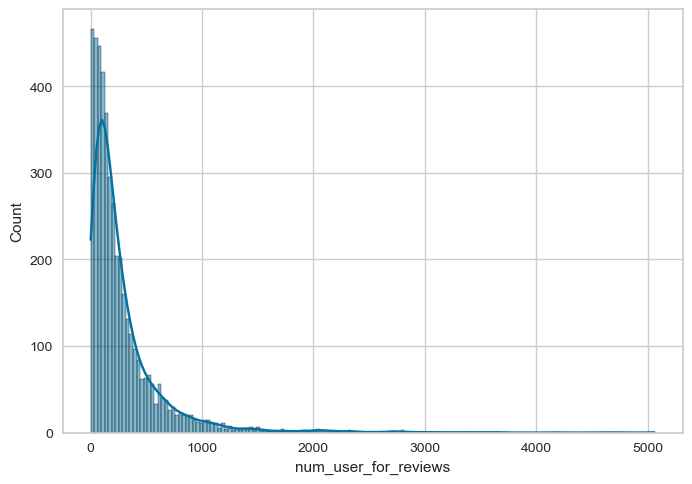

In [441]:
sns.histplot(df_film['num_user_for_reviews'], kde= True)

In [442]:
find_outliers_iqr(df_film['num_user_for_reviews']).shape[0]

357

<Axes: xlabel='num_user_for_reviews', ylabel='Count'>

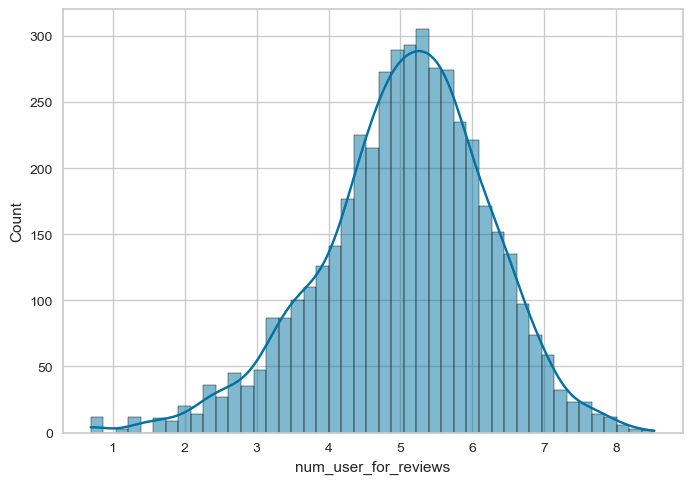

In [443]:
sns.histplot(np.log1p(df_film['num_user_for_reviews']), kde = True)

<Axes: ylabel='num_user_for_reviews'>

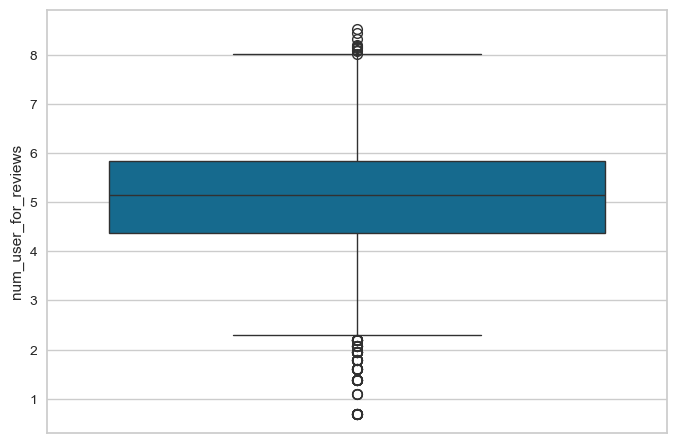

In [444]:
sns.boxplot(np.log1p(df_film['num_user_for_reviews']))

In [445]:
df_film['num_user_for_reviews'] = np.log1p(df_film['num_user_for_reviews'])

In [446]:
out_num_user_for_reviews = find_outliers_iqr(df_film['num_user_for_reviews'])

In [447]:
out_num_user_for_reviews.shape[0]

91

In [448]:
df_film['num_user_for_reviews'] = winorizing(df_film, 'num_user_for_reviews')

<Axes: xlabel='num_user_for_reviews', ylabel='Count'>

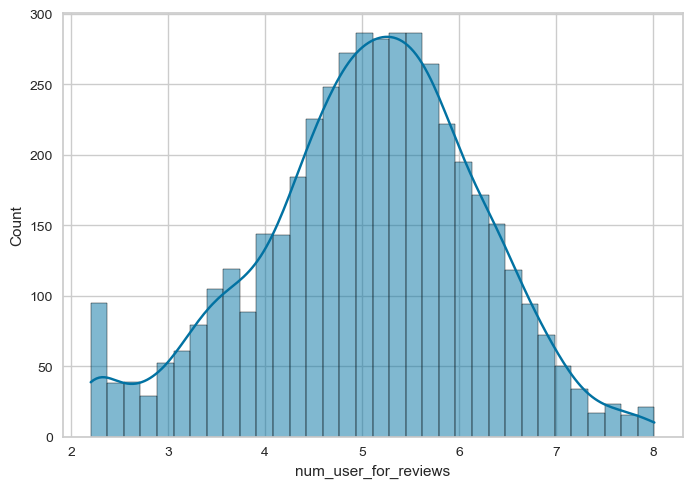

In [449]:
sns.histplot(df_film['num_user_for_reviews'], kde = True)

#### budget

In [451]:
df_film.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        539
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
war_symb_title                 0
categ_year_film                0
name_country                   0
Action                         0
Adventure 

<Axes: ylabel='budget'>

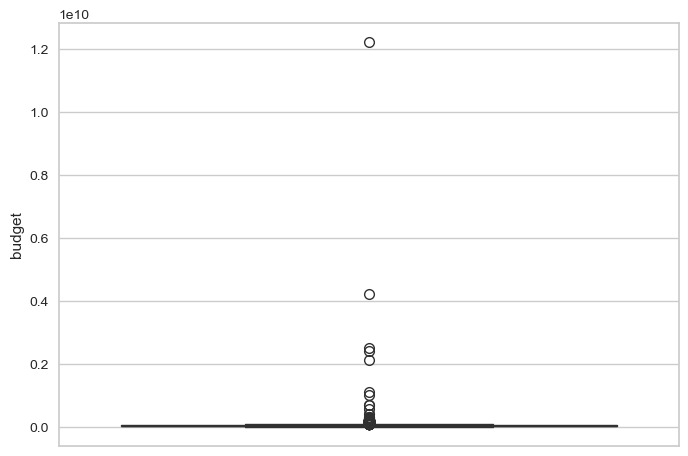

In [452]:
sns.boxplot(df_film['budget'])

<Axes: xlabel='budget', ylabel='Count'>

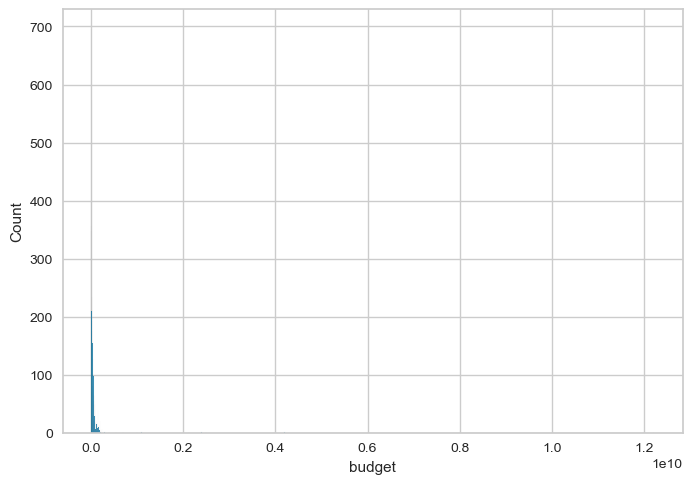

In [453]:
sns.histplot(df_film['budget'])

In [454]:
find_outliers_iqr(df_film['budget'])

0       2.370000e+08
1       3.000000e+08
2       2.450000e+08
3       2.500000e+08
4       2.637000e+08
            ...     
3694    1.000000e+08
3845    9.500000e+07
3861    1.200000e+08
4165    1.000000e+09
4280    2.070000e+08
Name: budget, Length: 396, dtype: float64

##### checking if the extreme values are conrextual or global outliers => conclusion: the biggest outliers are global (because of wrong currency)

In [456]:
df_conver_budget = df_film.loc[df_film.index.isin(find_outliers_iqr(df_film['budget']).index), ['budget', 'movie_imdb_link', 'name_country', 'title_year']]

In [457]:
df_conver_budget.sort_values(by = 'budget', ascending = False)

budget                                    movie_imdb_link  \
2822  1.221550e+10  http://www.imdb.com/title/tt0468492/?ref_=fn_t...   
3603  4.200000e+09  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   
2839  2.500000e+09  http://www.imdb.com/title/tt0367082/?ref_=fn_t...   
2206  2.400000e+09  http://www.imdb.com/title/tt0119698/?ref_=fn_t...   
2217  2.127520e+09  http://www.imdb.com/title/tt0348121/?ref_=fn_t...   
...            ...                                                ...   
345   9.000000e+07  http://www.imdb.com/title/tt2974918/?ref_=fn_t...   
858   9.000000e+07  http://www.imdb.com/title/tt0418689/?ref_=fn_t...   
296   9.000000e+07  http://www.imdb.com/title/tt2333784/?ref_=fn_t...   
343   9.000000e+07  http://www.imdb.com/title/tt0988045/?ref_=fn_t...   
342   9.000000e+07  http://www.imdb.com/title/tt0112864/?ref_=fn_t...   

     name_country  title_year  
2822  South Korea      2006.0  
3603  South Korea      2005.0  
2839      Hungary      2005.0  
2206        Japan      1997.0  
2217        Japan      2004.0  
...           ...         ...  
345           USA      2015.0  
858           USA      2006.0  
296           USA      2014.0  
343           USA      2009.0  
342           USA      1995.0  

[396 rows x 4 columns]

##### convert budget in films originated from South Korea

In [459]:
median_year = round(df_conver_budget.loc[df_conver_budget['name_country'] == 'South Korea', 'title_year'].median())

In [460]:
median_year

2006

In [461]:
coef_South_Korea = 955

In [462]:
df_conver_budget.loc[df_conver_budget['name_country'] == 'South Korea', 'budget'] /= coef_South_Korea

In [463]:
df_conver_budget[df_conver_budget['name_country'] == 'South Korea']

budget                                    movie_imdb_link  \
2822  1.279110e+07  http://www.imdb.com/title/tt0468492/?ref_=fn_t...   
3603  4.397906e+06  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   

     name_country  title_year  
2822  South Korea      2006.0  
3603  South Korea      2005.0

##### convert budget in films originated from Japan

In [465]:
df_film.loc[df_film.index.isin(find_outliers_iqr(df_film['budget']).index) & (df_film['name_country'] == 'Japan'), ['budget', 'movie_imdb_link', 'name_country', 'title_year']]

budget                                    movie_imdb_link  \
2206  2.400000e+09  http://www.imdb.com/title/tt0119698/?ref_=fn_t...   
2217  2.127520e+09  http://www.imdb.com/title/tt0348121/?ref_=fn_t...   
3222  1.100000e+09  http://www.imdb.com/title/tt0094625/?ref_=fn_t...   
4165  1.000000e+09  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   

     name_country  title_year  
2206        Japan      1997.0  
2217        Japan      2004.0  
3222        Japan      1988.0  
4165        Japan      1999.0

In [466]:
median_year = round(df_conver_budget.loc[df_conver_budget['name_country'] == 'Japan', 'title_year'].median())

In [467]:
median_year

1998

In [468]:
coef_Japan = 130

In [469]:
df_conver_budget.loc[df_conver_budget['name_country'] == 'Japan', 'budget'] /= coef_Japan

In [470]:
df_conver_budget[df_conver_budget['name_country'] == 'Japan']

budget                                    movie_imdb_link  \
2206  1.846154e+07  http://www.imdb.com/title/tt0119698/?ref_=fn_t...   
2217  1.636554e+07  http://www.imdb.com/title/tt0348121/?ref_=fn_t...   
3222  8.461538e+06  http://www.imdb.com/title/tt0094625/?ref_=fn_t...   
4165  7.692308e+06  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   

     name_country  title_year  
2206        Japan      1997.0  
2217        Japan      2004.0  
3222        Japan      1988.0  
4165        Japan      1999.0

In [471]:
df_conver_budget.sort_values(by = 'budget', ascending = False)

budget                                    movie_imdb_link  \
2839  2.500000e+09  http://www.imdb.com/title/tt0367082/?ref_=fn_t...   
2904  7.000000e+08  http://www.imdb.com/title/tt0449999/?ref_=fn_t...   
3596  7.000000e+08  http://www.imdb.com/title/tt0120274/?ref_=fn_t...   
1271  5.536320e+08  http://www.imdb.com/title/tt0425637/?ref_=fn_t...   
3124  4.000000e+08  http://www.imdb.com/title/tt0290879/?ref_=fn_t...   
...            ...                                                ...   
2217  1.636554e+07  http://www.imdb.com/title/tt0348121/?ref_=fn_t...   
2822  1.279110e+07  http://www.imdb.com/title/tt0468492/?ref_=fn_t...   
3222  8.461538e+06  http://www.imdb.com/title/tt0094625/?ref_=fn_t...   
4165  7.692308e+06  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   
3603  4.397906e+06  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   

     name_country  title_year  
2839      Hungary      2005.0  
2904        India      2006.0  
3596        Spain      1998.0  
1271        China      2008.0  
3124     Thailand      2001.0  
...           ...         ...  
2217        Japan      2004.0  
2822  South Korea      2006.0  
3222        Japan      1988.0  
4165        Japan      1999.0  
3603  South Korea      2005.0  

[396 rows x 4 columns]

##### convert budget in films originated from Hungary

In [473]:
coef_hungary = 0.005

In [474]:
df_conver_budget.loc[df_conver_budget['name_country'] == 'Hungary', 'budget'] *= coef_hungary

In [475]:
df_conver_budget.sort_values(by = 'budget', ascending = False)

budget                                    movie_imdb_link  \
3596  7.000000e+08  http://www.imdb.com/title/tt0120274/?ref_=fn_t...   
2904  7.000000e+08  http://www.imdb.com/title/tt0449999/?ref_=fn_t...   
1271  5.536320e+08  http://www.imdb.com/title/tt0425637/?ref_=fn_t...   
3124  4.000000e+08  http://www.imdb.com/title/tt0290879/?ref_=fn_t...   
964   3.900000e+08  http://www.imdb.com/title/tt0151137/?ref_=fn_t...   
...            ...                                                ...   
2822  1.279110e+07  http://www.imdb.com/title/tt0468492/?ref_=fn_t...   
2839  1.250000e+07  http://www.imdb.com/title/tt0367082/?ref_=fn_t...   
3222  8.461538e+06  http://www.imdb.com/title/tt0094625/?ref_=fn_t...   
4165  7.692308e+06  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   
3603  4.397906e+06  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   

     name_country  title_year  
3596        Spain      1998.0  
2904        India      2006.0  
1271        China      2008.0  
3124     Thailand      2001.0  
964        France      1999.0  
...           ...         ...  
2822  South Korea      2006.0  
2839      Hungary      2005.0  
3222        Japan      1988.0  
4165        Japan      1999.0  
3603  South Korea      2005.0  

[396 rows x 4 columns]

##### convert budget in films originated from Spain

In [477]:
coef_spain = 150

In [478]:
df_conver_budget.loc[df_conver_budget['name_country'] == 'Spain', 'budget'] /= coef_spain

In [479]:
df_conver_budget.sort_values(by = 'budget', ascending = False)

budget                                    movie_imdb_link  \
2904  7.000000e+08  http://www.imdb.com/title/tt0449999/?ref_=fn_t...   
1271  5.536320e+08  http://www.imdb.com/title/tt0425637/?ref_=fn_t...   
3124  4.000000e+08  http://www.imdb.com/title/tt0290879/?ref_=fn_t...   
964   3.900000e+08  http://www.imdb.com/title/tt0151137/?ref_=fn_t...   
1     3.000000e+08  http://www.imdb.com/title/tt0449088/?ref_=fn_t...   
...            ...                                                ...   
2839  1.250000e+07  http://www.imdb.com/title/tt0367082/?ref_=fn_t...   
3222  8.461538e+06  http://www.imdb.com/title/tt0094625/?ref_=fn_t...   
4165  7.692308e+06  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   
3596  4.666667e+06  http://www.imdb.com/title/tt0120274/?ref_=fn_t...   
3603  4.397906e+06  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   

     name_country  title_year  
2904        India      2006.0  
1271        China      2008.0  
3124     Thailand      2001.0  
964        France      1999.0  
1             USA      2007.0  
...           ...         ...  
2839      Hungary      2005.0  
3222        Japan      1988.0  
4165        Japan      1999.0  
3596        Spain      1998.0  
3603  South Korea      2005.0  

[396 rows x 4 columns]

##### convert budget in films originated from India

In [481]:
df_conver_budget[df_conver_budget['name_country'] == 'India']

budget                                    movie_imdb_link  \
2904  700000000.0  http://www.imdb.com/title/tt0449999/?ref_=fn_t...   
3861  120000000.0  http://www.imdb.com/title/tt0456144/?ref_=fn_t...   

     name_country  title_year  
2904        India      2006.0  
3861        India      2006.0

In [482]:
median_year = round(df_conver_budget.loc[df_conver_budget['name_country'] == 'India', 'title_year'].median())

In [483]:
median_year

2006

In [484]:
coef_india = 46

In [485]:
df_conver_budget.loc[df_conver_budget['name_country'] == 'India', 'budget'] /= coef_india

In [486]:
df_conver_budget.sort_values(by = 'budget', ascending = False)

budget                                    movie_imdb_link  \
1271  5.536320e+08  http://www.imdb.com/title/tt0425637/?ref_=fn_t...   
3124  4.000000e+08  http://www.imdb.com/title/tt0290879/?ref_=fn_t...   
964   3.900000e+08  http://www.imdb.com/title/tt0151137/?ref_=fn_t...   
2591  3.000000e+08  http://www.imdb.com/title/tt0785035/?ref_=fn_t...   
1     3.000000e+08  http://www.imdb.com/title/tt0449088/?ref_=fn_t...   
...            ...                                                ...   
3222  8.461538e+06  http://www.imdb.com/title/tt0094625/?ref_=fn_t...   
4165  7.692308e+06  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   
3596  4.666667e+06  http://www.imdb.com/title/tt0120274/?ref_=fn_t...   
3603  4.397906e+06  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   
3861  2.608696e+06  http://www.imdb.com/title/tt0456144/?ref_=fn_t...   

     name_country  title_year  
1271        China      2008.0  
3124     Thailand      2001.0  
964        France      1999.0  
2591     Thailand      2008.0  
1             USA      2007.0  
...           ...         ...  
3222        Japan      1988.0  
4165        Japan      1999.0  
3596        Spain      1998.0  
3603  South Korea      2005.0  
3861        India      2006.0  

[396 rows x 4 columns]

##### convert budget in films originated from China

In [488]:
df_conver_budget[df_conver_budget['name_country'] == 'China']

budget                                    movie_imdb_link  \
129   150000000.0  http://www.imdb.com/title/tt2381249/?ref_=fn_t...   
306    94000000.0  http://www.imdb.com/title/tt1410063/?ref_=fn_t...   
1271  553632000.0  http://www.imdb.com/title/tt0425637/?ref_=fn_t...   
2808  100000000.0  http://www.imdb.com/title/tt0385004/?ref_=fn_t...   

     name_country  title_year  
129         China      2015.0  
306         China      2011.0  
1271        China      2008.0  
2808        China      2004.0

In [489]:
median_year = round(df_conver_budget.loc[[1271, 2808], 'title_year'].median())

In [490]:
median_year

2006

In [491]:
coef_china = 8

In [492]:
df_conver_budget.loc[[1271, 2808], 'budget'] /= 8

In [493]:
df_conver_budget.sort_values(by = 'budget', ascending = False)

budget                                    movie_imdb_link  \
3124  4.000000e+08  http://www.imdb.com/title/tt0290879/?ref_=fn_t...   
964   3.900000e+08  http://www.imdb.com/title/tt0151137/?ref_=fn_t...   
2591  3.000000e+08  http://www.imdb.com/title/tt0785035/?ref_=fn_t...   
1     3.000000e+08  http://www.imdb.com/title/tt0449088/?ref_=fn_t...   
4     2.637000e+08  http://www.imdb.com/title/tt0401729/?ref_=fn_t...   
...            ...                                                ...   
3222  8.461538e+06  http://www.imdb.com/title/tt0094625/?ref_=fn_t...   
4165  7.692308e+06  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   
3596  4.666667e+06  http://www.imdb.com/title/tt0120274/?ref_=fn_t...   
3603  4.397906e+06  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   
3861  2.608696e+06  http://www.imdb.com/title/tt0456144/?ref_=fn_t...   

     name_country  title_year  
3124     Thailand      2001.0  
964        France      1999.0  
2591     Thailand      2008.0  
1             USA      2007.0  
4             USA      2012.0  
...           ...         ...  
3222        Japan      1988.0  
4165        Japan      1999.0  
3596        Spain      1998.0  
3603  South Korea      2005.0  
3861        India      2006.0  

[396 rows x 4 columns]

##### convert budget in films originated from Thailand

In [495]:
df_conver_budget[df_conver_budget['name_country'] == 'Thailand']

budget                                    movie_imdb_link  \
2591  300000000.0  http://www.imdb.com/title/tt0785035/?ref_=fn_t...   
3124  400000000.0  http://www.imdb.com/title/tt0290879/?ref_=fn_t...   
3426  200000000.0  http://www.imdb.com/title/tt0427954/?ref_=fn_t...   

     name_country  title_year  
2591     Thailand      2008.0  
3124     Thailand      2001.0  
3426     Thailand      2005.0

In [496]:
median_year = round(df_conver_budget.loc[df_conver_budget['name_country'] == 'Thailand', 'title_year'].median())

In [497]:
median_year

2005

In [498]:
coef_thailand = 38

In [499]:
df_conver_budget.loc[df_conver_budget['name_country'] == 'Thailand', 'budget'] /= coef_thailand

In [500]:
df_conver_budget.sort_values(by = 'budget', ascending = False)

budget                                    movie_imdb_link  \
964   3.900000e+08  http://www.imdb.com/title/tt0151137/?ref_=fn_t...   
1     3.000000e+08  http://www.imdb.com/title/tt0449088/?ref_=fn_t...   
4     2.637000e+08  http://www.imdb.com/title/tt0401729/?ref_=fn_t...   
6     2.600000e+08  http://www.imdb.com/title/tt0398286/?ref_=fn_t...   
5     2.580000e+08  http://www.imdb.com/title/tt0413300/?ref_=fn_t...   
...            ...                                                ...   
4165  7.692308e+06  http://www.imdb.com/title/tt0188640/?ref_=fn_t...   
3426  5.263158e+06  http://www.imdb.com/title/tt0427954/?ref_=fn_t...   
3596  4.666667e+06  http://www.imdb.com/title/tt0120274/?ref_=fn_t...   
3603  4.397906e+06  http://www.imdb.com/title/tt0451094/?ref_=fn_t...   
3861  2.608696e+06  http://www.imdb.com/title/tt0456144/?ref_=fn_t...   

     name_country  title_year  
964        France      1999.0  
1             USA      2007.0  
4             USA      2012.0  
6             USA      2010.0  
5             USA      2007.0  
...           ...         ...  
4165        Japan      1999.0  
3426     Thailand      2005.0  
3596        Spain      1998.0  
3603  South Korea      2005.0  
3861        India      2006.0  

[396 rows x 4 columns]

##### Replace using median by year

In [502]:
df_conver_budget.loc[964, 'budget'] = df_film.loc[df_film['title_year'] == 1999, 'budget'].median()

##### put to main dataframe

In [504]:
df_film.loc[df_film.index.isin(df_conver_budget.index), 'budget'] = df_conver_budget['budget']

<Axes: xlabel='budget', ylabel='Count'>

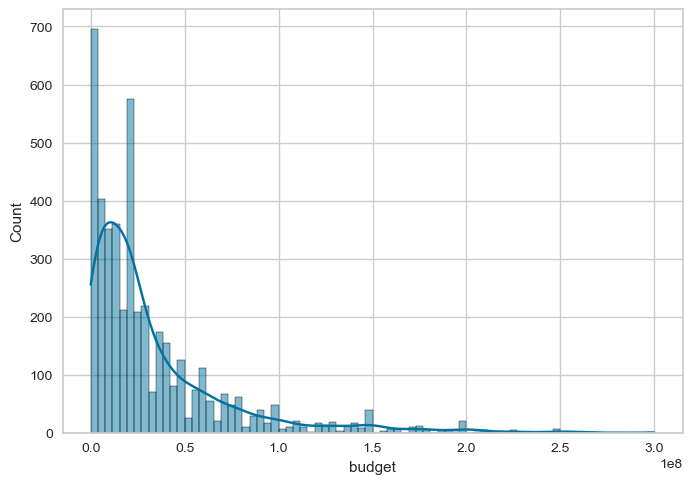

In [505]:
sns.histplot(df_film['budget'], kde = True)

In [506]:
find_outliers_iqr(df_film['budget']).shape[0]

380

<Axes: ylabel='budget'>

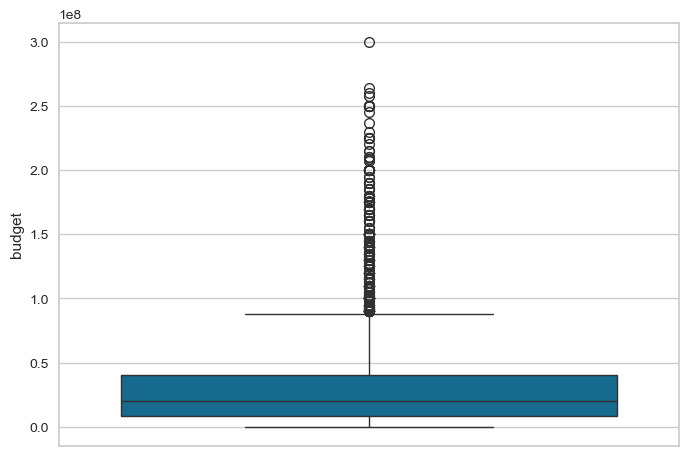

In [507]:
sns.boxplot(df_film['budget'])

In [508]:
df_film['budget'], fitted_lambda = boxcox(df_film['budget'])

<Axes: ylabel='budget'>

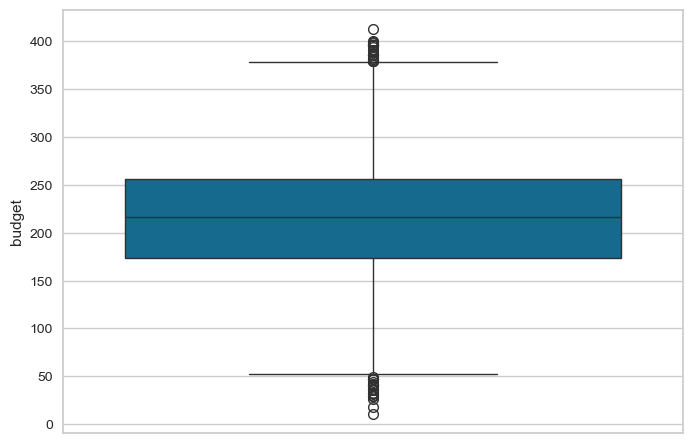

In [509]:
sns.boxplot(df_film['budget'])

<Axes: xlabel='budget', ylabel='Count'>

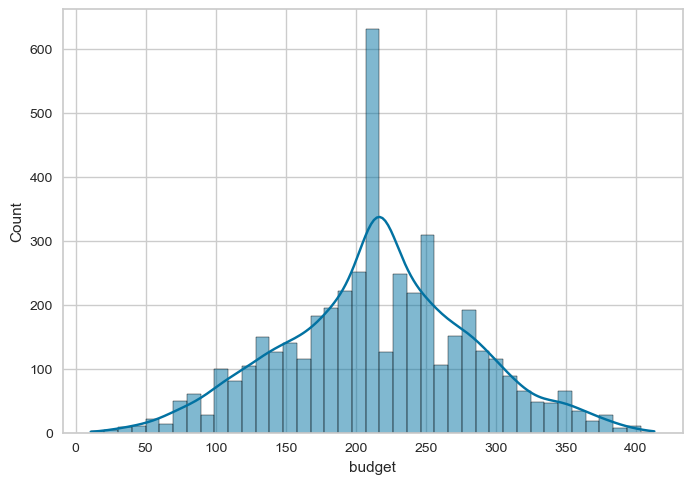

In [510]:
sns.histplot(df_film['budget'], kde = True)

In [511]:
find_outliers_iqr(df_film['budget']).shape[0]

51

In [512]:
df_film['budget'] = winorizing(df_film, 'budget')

<Axes: xlabel='budget', ylabel='Count'>

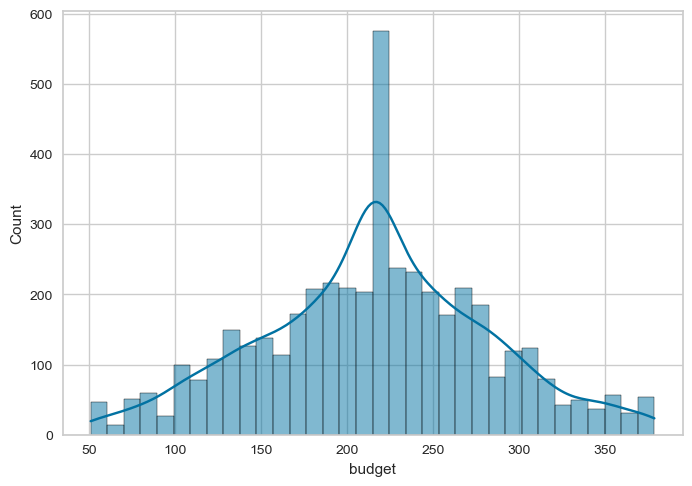

In [513]:
sns.histplot(df_film['budget'], kde = True)

<Axes: ylabel='budget'>

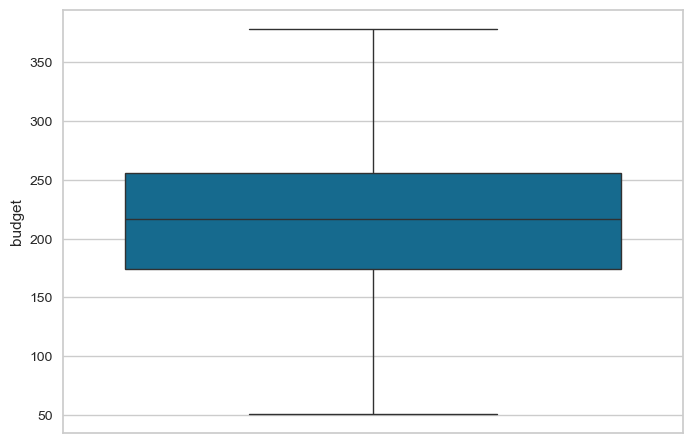

In [514]:
sns.boxplot(df_film['budget'])

#### gross

In [516]:
df_film_clear = df_film.dropna(subset=['gross'])

In [517]:
df_film_clear.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
war_symb_title               0
categ_year_film              0
name_country                 0
Action                       0
Adventure                    0
Animation                    0
Biograph

<Axes: xlabel='gross', ylabel='Count'>

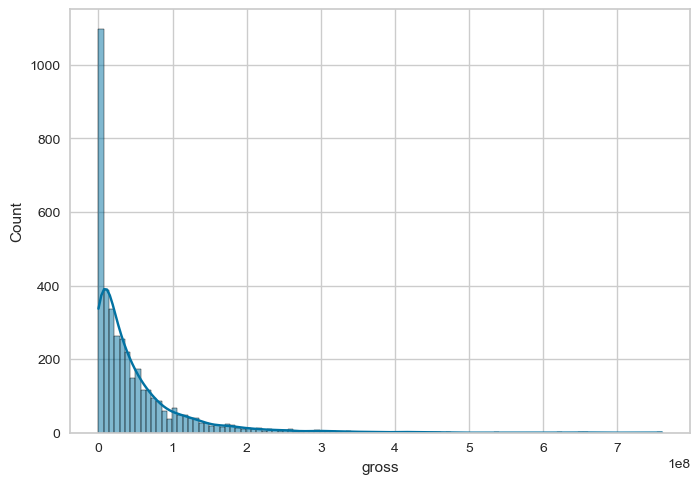

In [518]:
sns.histplot(df_film_clear['gross'], kde = True)

<Axes: ylabel='gross'>

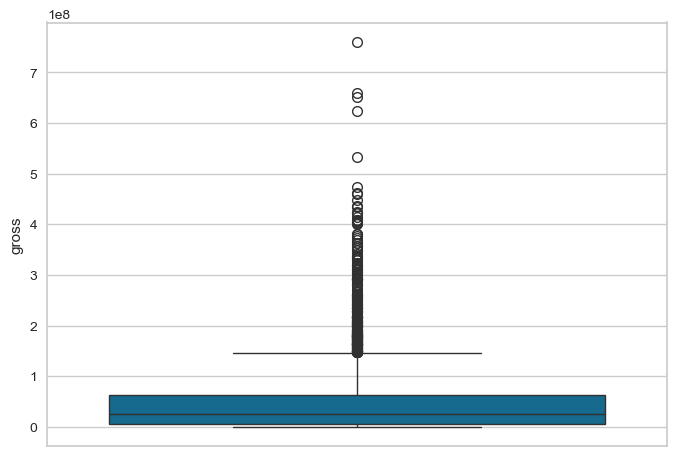

In [519]:
sns.boxplot(df_film_clear['gross'])

In [520]:
find_outliers_iqr(df_film_clear['gross']).shape[0]

288

##### checking if the extreme values are conrextual or general outliers => conclusion: there are contextual

In [522]:
df_film.loc[df_film.index.isin(find_outliers_iqr(df_film['gross']).index), ['gross', 'movie_imdb_link', 'name_country', 'title_year']].sort_values(by='gross')

gross                                    movie_imdb_link  \
884   147637474.0  http://www.imdb.com/title/tt0119822/?ref_=fn_t...   
1772  148085755.0  http://www.imdb.com/title/tt1205489/?ref_=fn_t...   
2853  148170000.0  http://www.imdb.com/title/tt0087363/?ref_=fn_t...   
538   148213377.0  http://www.imdb.com/title/tt0415306/?ref_=fn_t...   
376   148313048.0  http://www.imdb.com/title/tt0837562/?ref_=fn_t...   
...           ...                                                ...   
62    533316061.0  http://www.imdb.com/title/tt0468569/?ref_=fn_t...   
16    623279547.0  http://www.imdb.com/title/tt0848228/?ref_=fn_t...   
27    652177271.0  http://www.imdb.com/title/tt0369610/?ref_=fn_t...   
24    658672302.0  http://www.imdb.com/title/tt0120338/?ref_=fn_t...   
0     760505847.0  http://www.imdb.com/title/tt0499549/?ref_=fn_t...   

     name_country  title_year  
884           USA      1997.0  
1772          USA      2008.0  
2853          USA      1984.0  
538           USA      2006.0  
376           USA      2012.0  
...           ...         ...  
62            USA      2008.0  
16            USA      2012.0  
27            USA      2015.0  
24            USA      1997.0  
0             USA      2009.0  

[288 rows x 4 columns]

##### tranform distribution

In [524]:
df_film_clear.loc[:, 'gross'], fitted_lambda = boxcox(df_film_clear['gross'])

<Axes: xlabel='gross', ylabel='Count'>

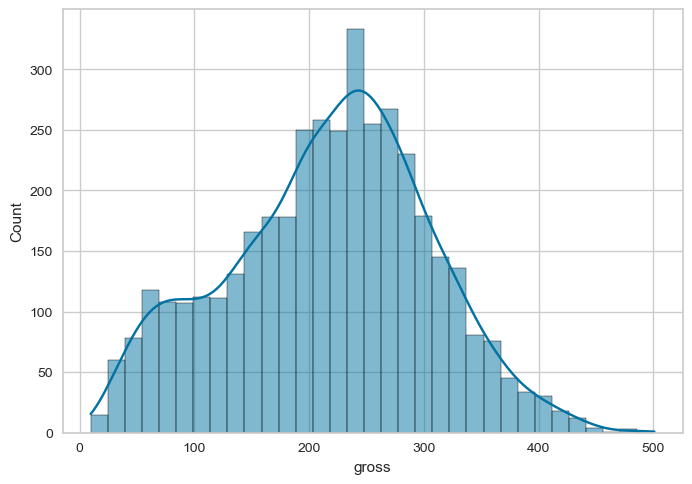

In [525]:
sns.histplot(df_film_clear['gross'], kde = True)

In [526]:
find_outliers_iqr(df_film_clear['gross']).index

Index([0, 16, 24, 27, 62], dtype='int64')

In [527]:
df_film_clear.loc[:, 'gross'] = winorizing(df_film_clear, 'gross')

<Axes: xlabel='gross', ylabel='Count'>

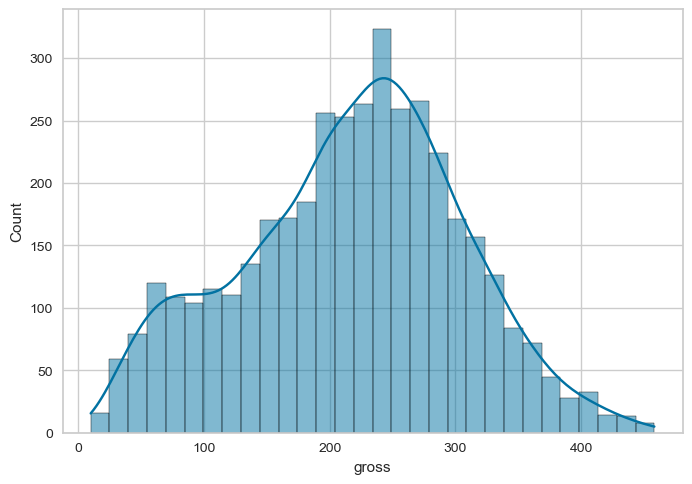

In [528]:
sns.histplot(df_film_clear['gross'], kde = True)

<Axes: ylabel='gross'>

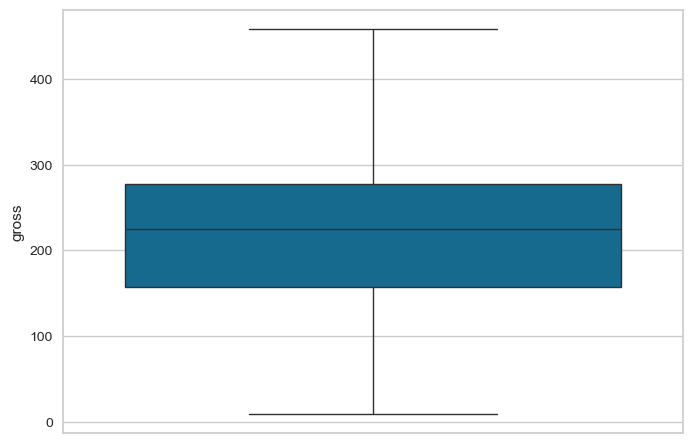

In [529]:
sns.boxplot(df_film_clear['gross'])

##### put transformation to the main dataset

In [531]:
df_film.loc[df_film.index.isin(df_film_clear.index), 'gross'] = df_film_clear['gross']

#### war_symb_title

<Axes: xlabel='war_symb_title', ylabel='Count'>

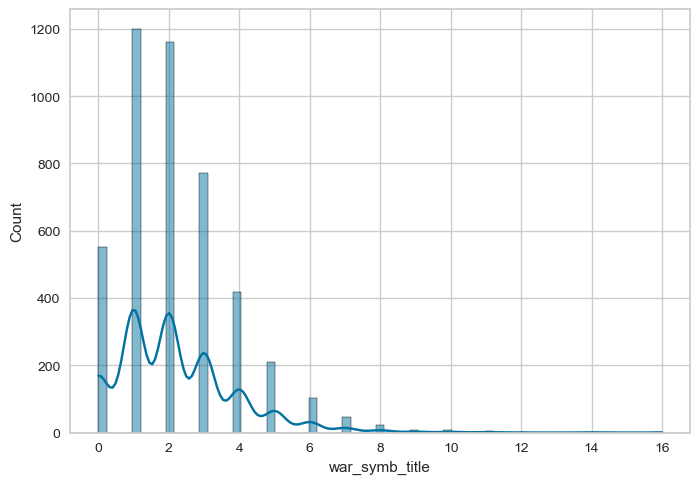

In [533]:
sns.histplot(df_film['war_symb_title'], kde = True)

In [534]:
df_film['war_symb_title'].value_counts()

war_symb_title
1     1199
2     1162
3      773
0      552
4      418
5      210
6      102
7       45
8       23
9        9
10       7
11       4
14       2
16       1
12       1
Name: count, dtype: int64

In [535]:
ser_war_symb_title = df_film.groupby('war_symb_title')['gross'].median()

In [536]:
ser_war_symb_title

war_symb_title
0     224.138601
1     226.532318
2     223.718728
3     217.249371
4     225.724790
5     237.192900
6     235.993029
7     234.927490
8     265.373293
9     280.978064
10    280.256808
11    256.644379
12           NaN
14           NaN
16    329.342561
Name: gross, dtype: float64

In [537]:
df_war_symb_title = ser_war_symb_title.reset_index()

In [538]:
df_war_symb_title

war_symb_title       gross
0                0  224.138601
1                1  226.532318
2                2  223.718728
3                3  217.249371
4                4  225.724790
5                5  237.192900
6                6  235.993029
7                7  234.927490
8                8  265.373293
9                9  280.978064
10              10  280.256808
11              11  256.644379
12              12         NaN
13              14         NaN
14              16  329.342561

In [539]:
df_war_symb_title.loc[df_war_symb_title['gross'] < 225, 'war_symb_title_low_gross'] = 1

In [540]:
df_war_symb_title.loc[df_war_symb_title['gross'] >= 225, 'war_symb_title_low_gross'] = 0

In [541]:
df_war_symb_title['war_symb_title_low_gross'].fillna(0, inplace = True)

In [542]:
df_war_symb_title.drop('gross', axis = 1, inplace = True)

In [543]:
df_war_symb_title

war_symb_title  war_symb_title_low_gross
0                0                       1.0
1                1                       0.0
2                2                       1.0
3                3                       1.0
4                4                       0.0
5                5                       0.0
6                6                       0.0
7                7                       0.0
8                8                       0.0
9                9                       0.0
10              10                       0.0
11              11                       0.0
12              12                       0.0
13              14                       0.0
14              16                       0.0

In [544]:
df_film = pd.merge(df_film, df_war_symb_title, how ='left', on ='war_symb_title')

In [545]:
df_film[['war_symb_title', 'war_symb_title_low_gross']]

war_symb_title  war_symb_title_low_gross
0                  4                       0.0
1                  8                       0.0
2                  1                       0.0
3                  3                       1.0
4                  3                       1.0
...              ...                       ...
4503               1                       0.0
4504               3                       1.0
4505               2                       1.0
4506               3                       1.0
4507               4                       0.0

[4508 rows x 2 columns]

In [546]:
df_film.drop('war_symb_title', axis = 1, inplace = True)

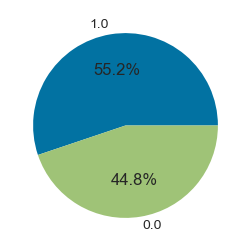

In [547]:
plt.figure(figsize=(7, 3))
plt.pie(df_film['war_symb_title_low_gross'].value_counts().values, labels = df_film['war_symb_title_low_gross'].value_counts().index, autopct='%1.1f%%')
plt.show()

##### using cluster analyzis (buff)

In [549]:
#scaler = StandardScaler()
#df_war_symb_title[['war_symb_title', 'gross']] = scaler.fit_transform(df_war_symb_title[['war_symb_title', 'gross']])

In [550]:
#df_war_symb_title

In [551]:
#elbow_method(10, df_war_symb_title)

In [552]:
#num_cluster = 3
#kmeans = KMeans(n_clusters=num_cluster)
#df_war_symb_title["cluster"] = kmeans.fit_predict(df_war_symb_title)
#df_war_symb_title["cluster"] = df_war_symb_title["cluster"].astype("category")

In [553]:
#df_war_symb_title

In [554]:
#sns.scatterplot(x=df_war_symb_title["gross"], y=df_war_symb_title["war_symb_title"], hue = df_war_symb_title['cluster'])

#### facenumber in poster

<Axes: xlabel='facenumber_in_poster', ylabel='Count'>

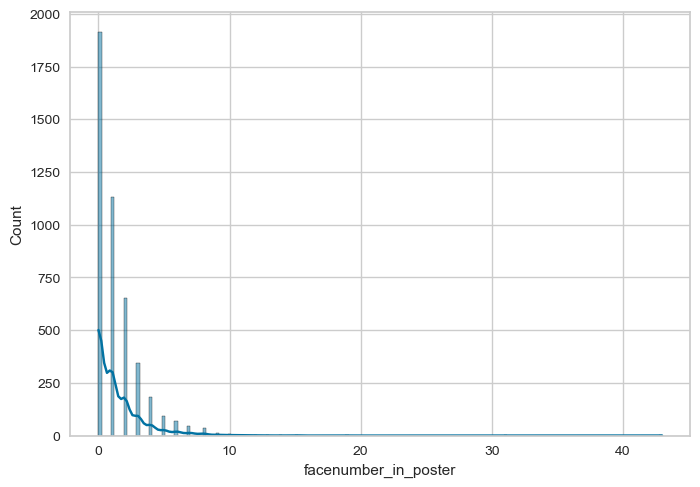

In [556]:
sns.histplot(df_film['facenumber_in_poster'], kde = True)

In [557]:
df_film['facenumber_in_poster'].value_counts()

facenumber_in_poster
0.0     1913
1.0     1131
2.0      654
3.0      342
4.0      184
5.0       94
6.0       69
7.0       46
8.0       34
9.0       13
10.0       9
11.0       5
15.0       4
12.0       4
13.0       2
31.0       1
14.0       1
19.0       1
43.0       1
Name: count, dtype: int64

In [558]:
ser_facenumber_in_poster = df_film.groupby('facenumber_in_poster')['gross'].median()

In [559]:
ser_facenumber_in_poster

facenumber_in_poster
0.0     226.612634
1.0     228.105641
2.0     221.911129
3.0     214.391024
4.0     214.271490
5.0     224.696703
6.0     225.027891
7.0     235.993029
8.0     234.551272
9.0     215.748207
10.0    224.052718
11.0    231.245942
12.0    251.463747
13.0    226.142195
14.0    264.415106
15.0    258.847867
19.0    174.661724
31.0    202.072618
43.0    237.646366
Name: gross, dtype: float64

In [560]:
df_facenumber_in_poster = ser_facenumber_in_poster.reset_index() 

In [561]:
df_facenumber_in_poster

facenumber_in_poster       gross
0                    0.0  226.612634
1                    1.0  228.105641
2                    2.0  221.911129
3                    3.0  214.391024
4                    4.0  214.271490
5                    5.0  224.696703
6                    6.0  225.027891
7                    7.0  235.993029
8                    8.0  234.551272
9                    9.0  215.748207
10                  10.0  224.052718
11                  11.0  231.245942
12                  12.0  251.463747
13                  13.0  226.142195
14                  14.0  264.415106
15                  15.0  258.847867
16                  19.0  174.661724
17                  31.0  202.072618
18                  43.0  237.646366

In [562]:
df_facenumber_in_poster.loc[df_facenumber_in_poster['gross'] < 227, 'facenumber_in_poster_low_gross'] = 1

In [563]:
df_facenumber_in_poster.loc[df_facenumber_in_poster['gross'] >= 227, 'facenumber_in_poster_low_gross'] = 0

In [564]:
df_facenumber_in_poster

facenumber_in_poster       gross  facenumber_in_poster_low_gross
0                    0.0  226.612634                             1.0
1                    1.0  228.105641                             0.0
2                    2.0  221.911129                             1.0
3                    3.0  214.391024                             1.0
4                    4.0  214.271490                             1.0
5                    5.0  224.696703                             1.0
6                    6.0  225.027891                             1.0
7                    7.0  235.993029                             0.0
8                    8.0  234.551272                             0.0
9                    9.0  215.748207                             1.0
10                  10.0  224.052718                             1.0
11                  11.0  231.245942                             0.0
12                  12.0  251.463747                             0.0
13                  13.0  226.142195                             1.0
14                  14.0  264.415106                             0.0
15                  15.0  258.847867                             0.0
16                  19.0  174.661724                             1.0
17                  31.0  202.072618                             1.0
18                  43.0  237.646366                             0.0

In [565]:
df_facenumber_in_poster.drop('gross', inplace = True, axis = 1)

In [566]:
df_facenumber_in_poster

facenumber_in_poster  facenumber_in_poster_low_gross
0                    0.0                             1.0
1                    1.0                             0.0
2                    2.0                             1.0
3                    3.0                             1.0
4                    4.0                             1.0
5                    5.0                             1.0
6                    6.0                             1.0
7                    7.0                             0.0
8                    8.0                             0.0
9                    9.0                             1.0
10                  10.0                             1.0
11                  11.0                             0.0
12                  12.0                             0.0
13                  13.0                             1.0
14                  14.0                             0.0
15                  15.0                             0.0
16                  19.0                             1.0
17                  31.0                             1.0
18                  43.0                             0.0

In [567]:
df_film = pd.merge(df_film, df_facenumber_in_poster, how ='left', on ='facenumber_in_poster')

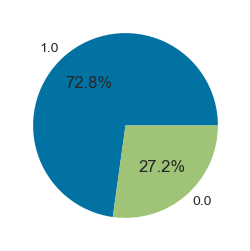

In [568]:
plt.figure(figsize=(7, 3))
plt.pie(df_film['facenumber_in_poster_low_gross'].value_counts().values, labels = df_film['facenumber_in_poster_low_gross'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [569]:
df_film.drop('facenumber_in_poster', inplace = True, axis = 1)

#### num_voted_users

<Axes: xlabel='num_voted_users', ylabel='Count'>

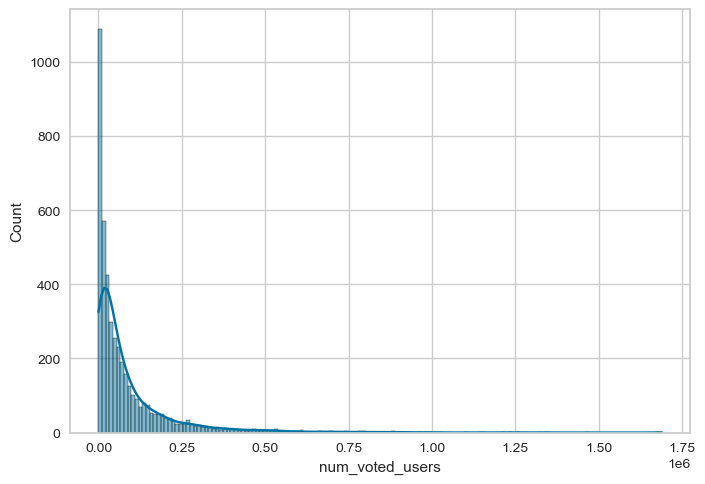

In [571]:
sns.histplot(df_film['num_voted_users'], kde= True)

In [572]:
find_outliers_iqr(df_film['num_voted_users']).shape[0]

427

In [573]:
df_film['num_voted_users'], fitted_lambda = boxcox(df_film['num_voted_users'])

<Axes: xlabel='num_voted_users', ylabel='Count'>

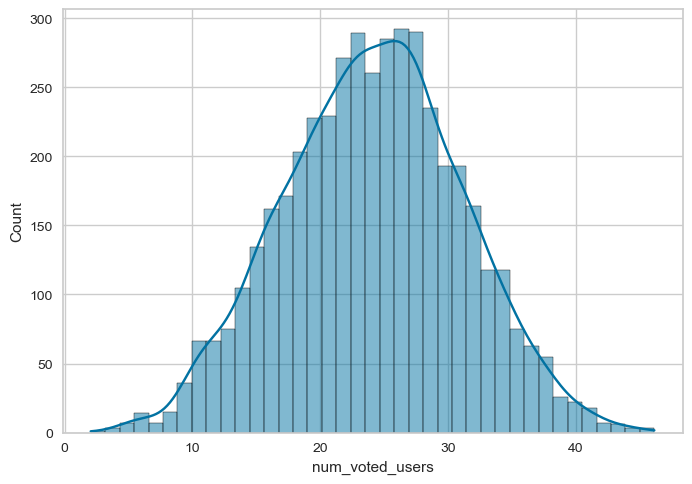

In [574]:
sns.histplot(df_film['num_voted_users'], kde= True)

In [575]:
find_outliers_iqr(df_film['num_voted_users']).shape[0]

17

In [576]:
df_film['num_voted_users'] = winorizing(df_film, 'num_voted_users')

<Axes: ylabel='num_voted_users'>

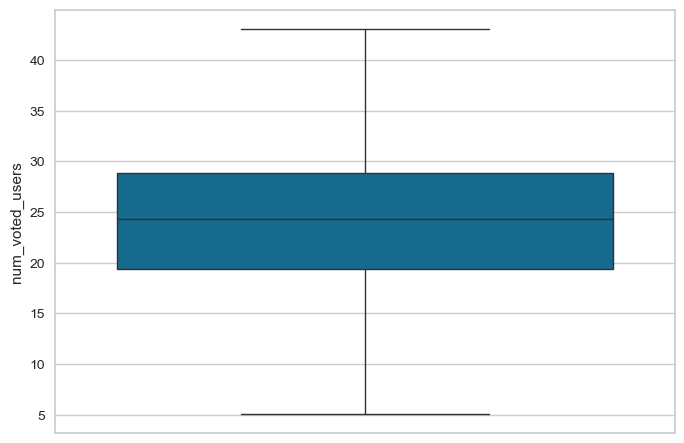

In [577]:
sns.boxplot(df_film['num_voted_users'])

#### Likes

In [579]:
df_film[['director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'movie_facebook_likes']]

director_facebook_likes  actor_3_facebook_likes  actor_2_facebook_likes  \
0                         0.0                   855.0                   936.0   
1                       563.0                  1000.0                  5000.0   
2                         0.0                   161.0                   393.0   
3                     22000.0                 23000.0                 23000.0   
4                       475.0                   530.0                   632.0   
...                       ...                     ...                     ...   
4503                      0.0                     0.0                     0.0   
4504                      0.0                     6.0                    20.0   
4505                      0.0                   133.0                   205.0   
4506                      0.0                   489.0                   719.0   
4507                     16.0                    16.0                    23.0   

      actor_1_facebook_likes  cast_total_facebook_likes  movie_facebook_likes  
0                     1000.0                       4834                 33000  
1                    40000.0                      48350                     0  
2                    11000.0                      11700                 85000  
3                    27000.0                     106759                164000  
4                      640.0                       1873                 24000  
...                      ...                        ...                   ...  
4503                     0.0                          0                    74  
4504                   121.0                        147                     0  
4505                   296.0                        690                   413  
4506                   946.0                       2386                   660  
4507                    86.0                        163                   456  

[4508 rows x 6 columns]

In [580]:
df_film[['director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes']].sum(axis = 1)

0        2791.0
1       46563.0
2       11554.0
3       95000.0
4        2277.0
         ...   
4503        0.0
4504      147.0
4505      634.0
4506     2154.0
4507      141.0
Length: 4508, dtype: float64

In [581]:
correl_likes = df_film[['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'director_facebook_likes', 'movie_facebook_likes']].corr()

<Axes: >

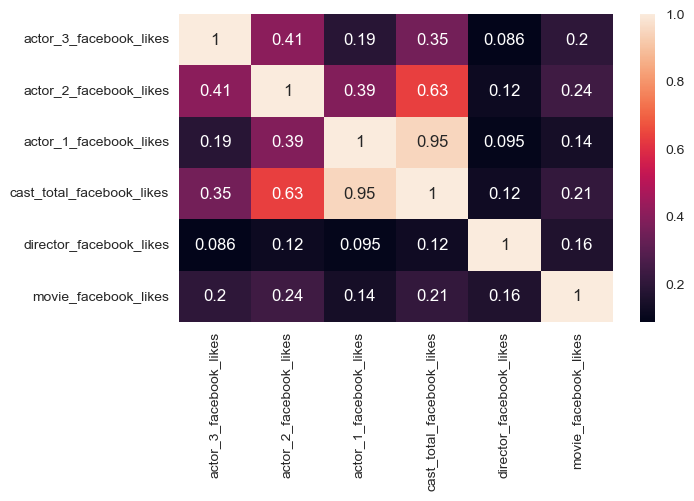

In [582]:
plt.figure(figsize=(7, 4))
sns.heatmap(correl_likes, annot=True)

In [583]:
df_film_like = df_film.copy()

##### actor 1

###### Checking for imposible values

In [586]:
df_film_like['actor_1_facebook_likes'].min()

-32.0

In [587]:
df_film_like.loc[df_film_like['actor_1_facebook_likes'] < 0, 'actor_1_facebook_likes'] = np.abs(df_film_like.loc[df_film_like['actor_1_facebook_likes'] < 0, 'actor_1_facebook_likes'])

In [588]:
df_film_like['actor_1_facebook_likes'].min()

0.0

###### explore distribution

<Axes: xlabel='actor_1_facebook_likes', ylabel='Count'>

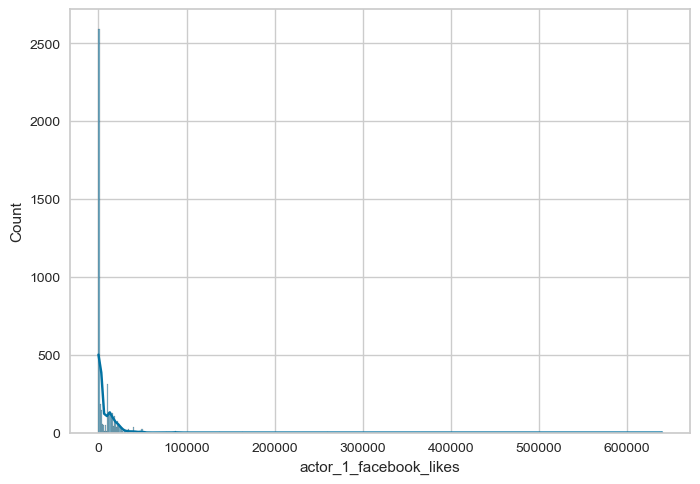

In [590]:
sns.histplot(df_film['actor_1_facebook_likes'], kde= True)

In [591]:
find_outliers_iqr(df_film['actor_1_facebook_likes']).shape[0]

157

In [592]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df_film_like['actor_1_facebook_likes'] = qt.fit_transform(df_film_like[['actor_1_facebook_likes']])

<Axes: ylabel='actor_1_facebook_likes'>

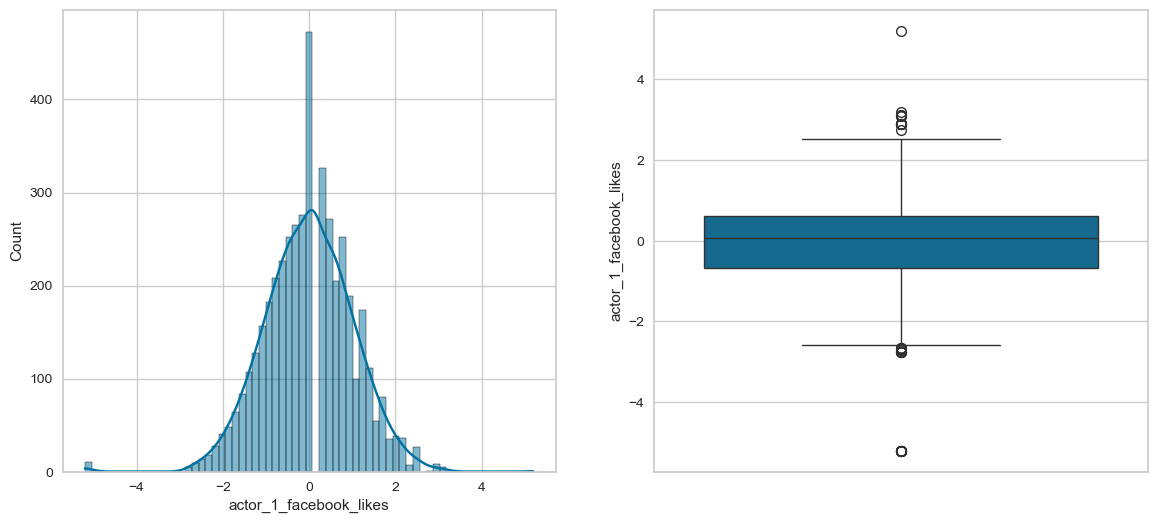

In [593]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['actor_1_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['actor_1_facebook_likes'], ax = axes[1])

In [594]:
find_outliers_iqr(df_film_like['actor_1_facebook_likes']).shape[0]

36

In [595]:
df_film_like['actor_1_facebook_likes'] = winorizing(df_film_like, 'actor_1_facebook_likes')

<Axes: ylabel='actor_1_facebook_likes'>

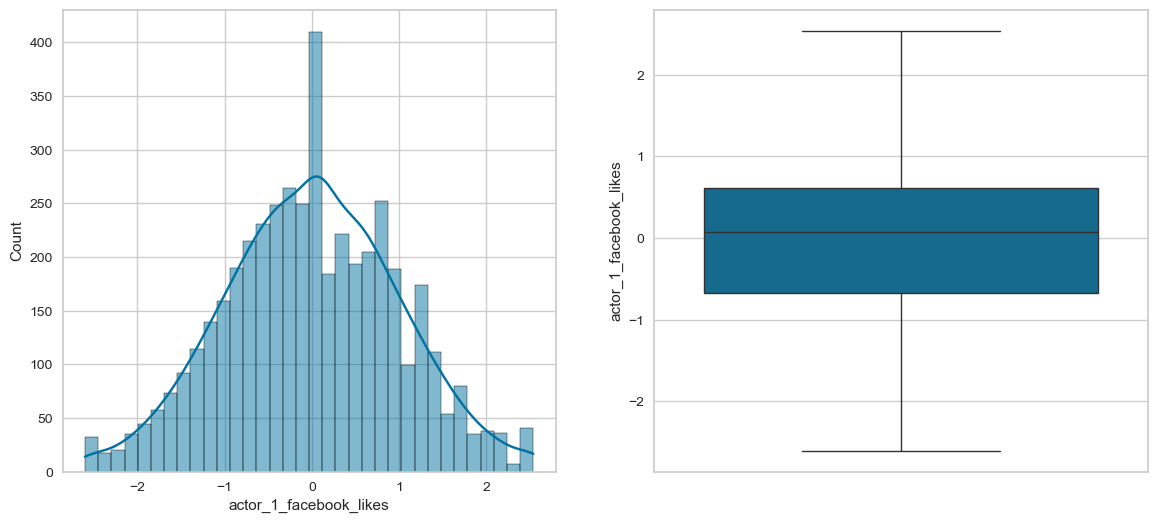

In [596]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['actor_1_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['actor_1_facebook_likes'], ax = axes[1])

##### actor 2

In [598]:
df_film_like['actor_2_facebook_likes'].min()

0.0

<Axes: xlabel='actor_2_facebook_likes', ylabel='Count'>

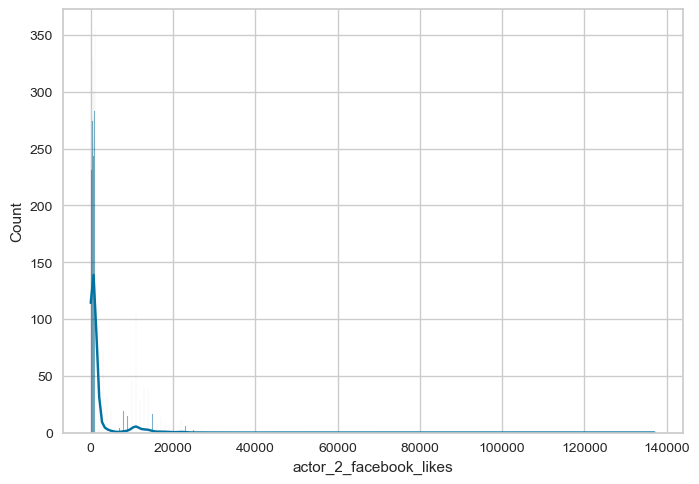

In [599]:
sns.histplot(df_film['actor_2_facebook_likes'], kde= True)

In [600]:
find_outliers_iqr(df_film['actor_2_facebook_likes']).shape[0]

604

In [601]:
qt2 = QuantileTransformer(output_distribution='normal')
transformed_data = qt2.fit_transform(df_film_like[['actor_2_facebook_likes']])

In [602]:
df_film_like['actor_2_facebook_likes'] = transformed_data

<Axes: ylabel='actor_2_facebook_likes'>

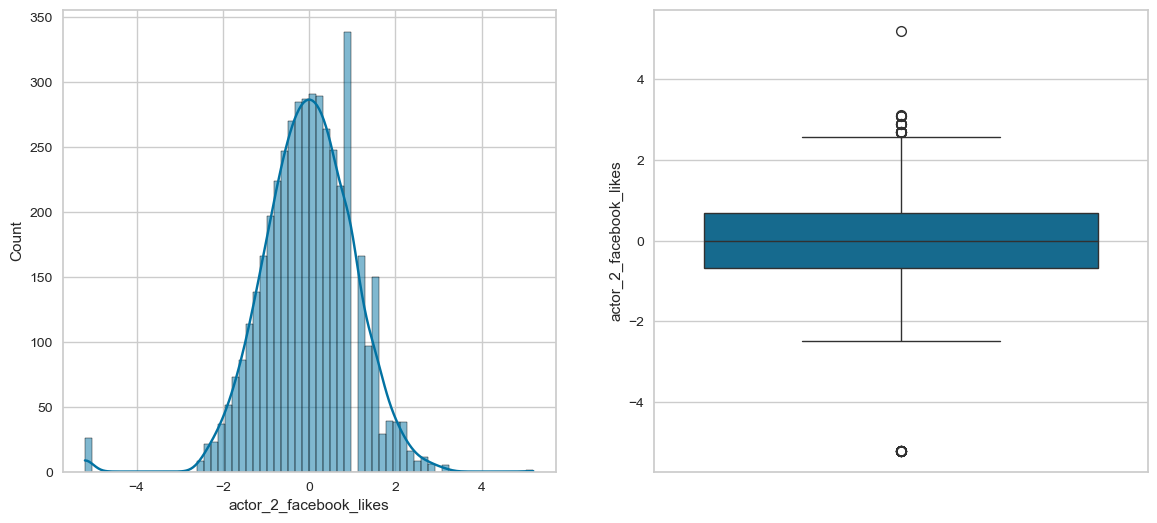

In [603]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['actor_2_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['actor_2_facebook_likes'], ax = axes[1])

In [604]:
find_outliers_iqr(df_film['actor_2_facebook_likes']).shape[0]

604

In [605]:
df_film_like['actor_2_facebook_likes'] = winorizing(df_film_like, 'actor_2_facebook_likes')

<Axes: ylabel='actor_2_facebook_likes'>

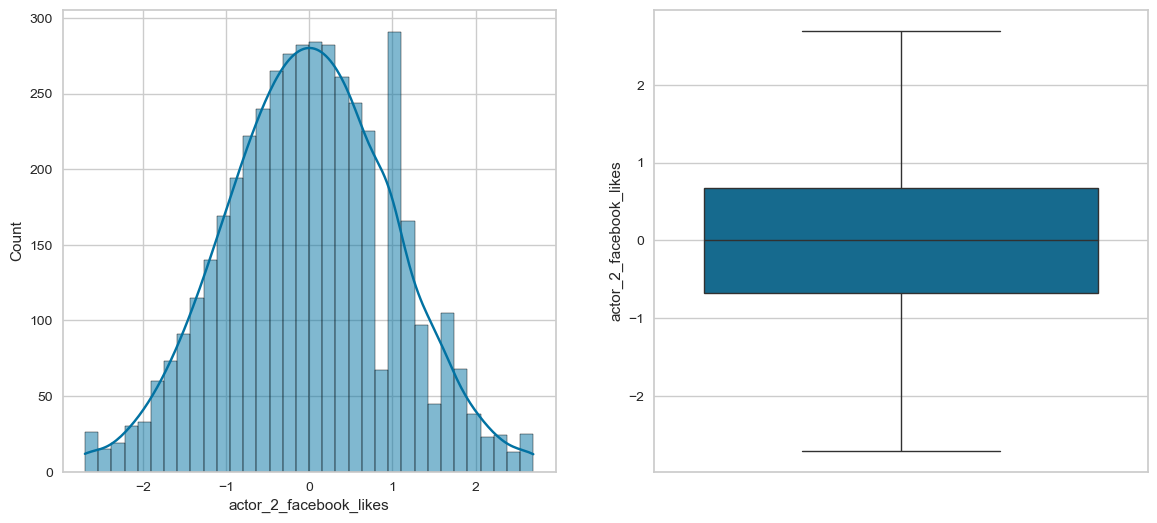

In [606]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['actor_2_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['actor_2_facebook_likes'], ax = axes[1])

##### Actor 3

In [608]:
df_film_like['actor_3_facebook_likes'].min()

0.0

<Axes: ylabel='actor_3_facebook_likes'>

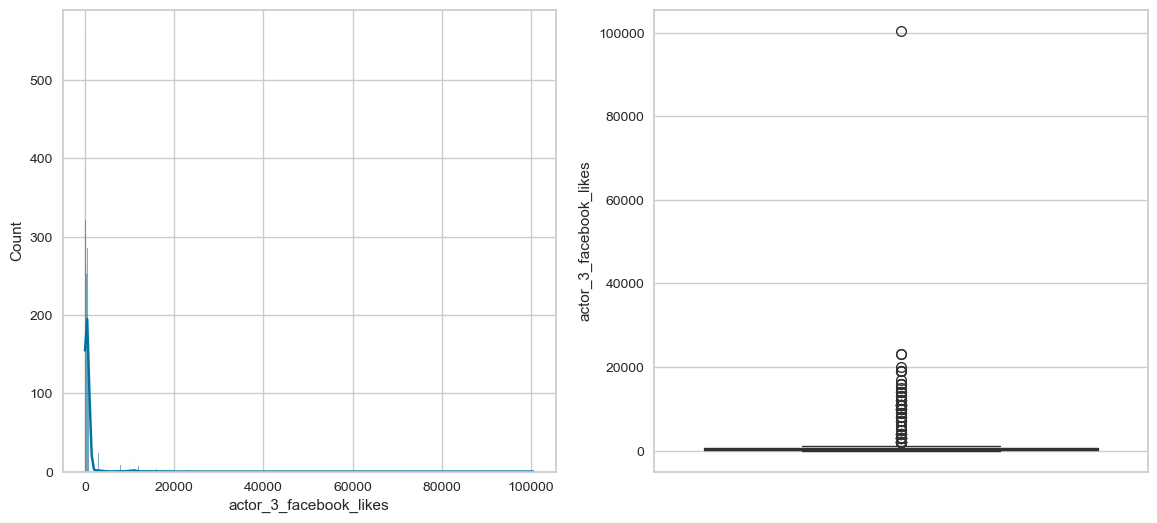

In [609]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['actor_3_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['actor_3_facebook_likes'], ax = axes[1])

In [610]:
find_outliers_iqr(df_film['actor_3_facebook_likes']).shape[0]

161

In [611]:
qt3 = QuantileTransformer(output_distribution='normal')
transformed_data = qt3.fit_transform(df_film_like[['actor_3_facebook_likes']])

In [612]:
df_film_like['actor_3_facebook_likes'] = transformed_data

<Axes: ylabel='actor_3_facebook_likes'>

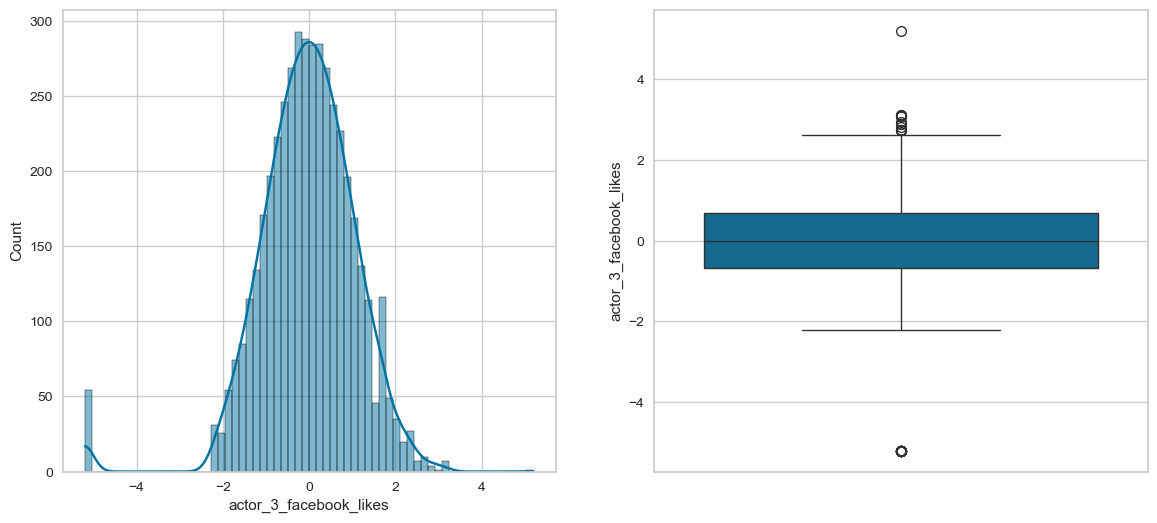

In [613]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['actor_3_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['actor_3_facebook_likes'], ax = axes[1])

In [614]:
df_film_like['actor_3_facebook_likes'] = winorizing(df_film_like, 'actor_3_facebook_likes')

<Axes: ylabel='actor_3_facebook_likes'>

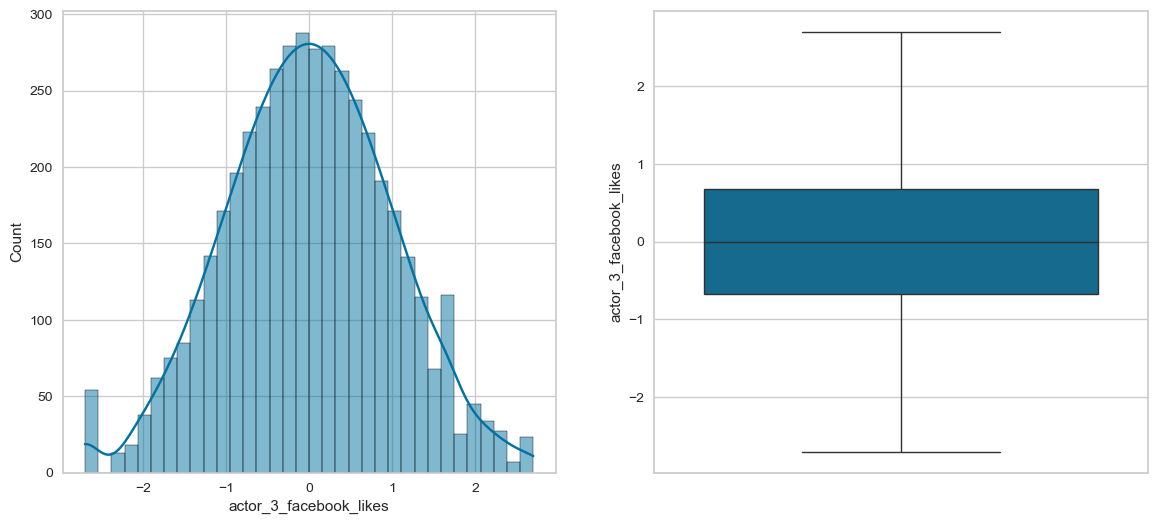

In [615]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['actor_3_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['actor_3_facebook_likes'], ax = axes[1])

##### cost total

In [617]:
df_film_like['cast_total_facebook_likes'].min()

0

<Axes: ylabel='cast_total_facebook_likes'>

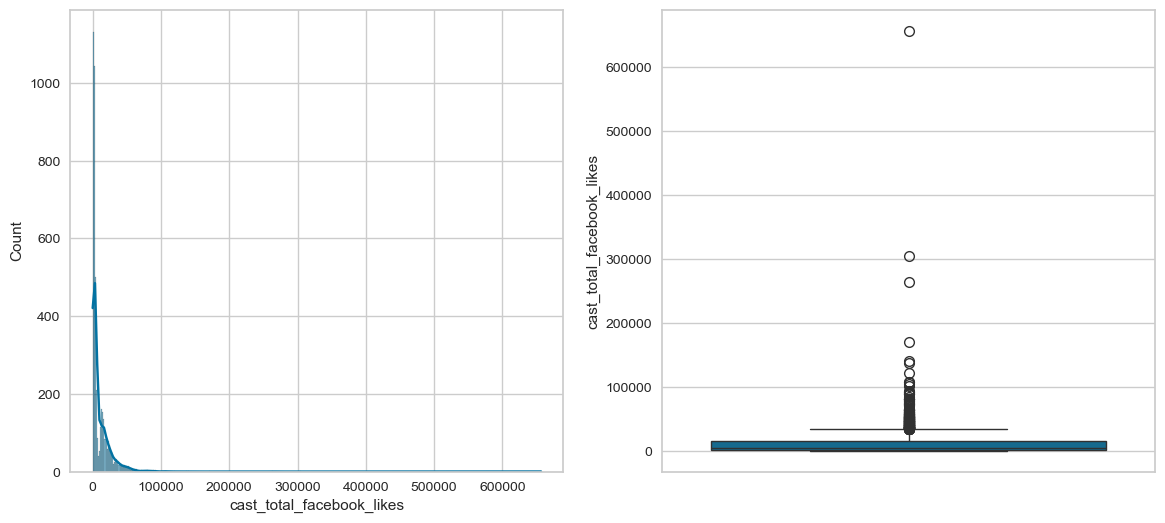

In [618]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['cast_total_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['cast_total_facebook_likes'], ax = axes[1])

In [619]:
find_outliers_iqr(df_film['cast_total_facebook_likes']).shape[0]

290

In [620]:
qt_cast_like = QuantileTransformer(output_distribution='normal')
transformed_data = qt_cast_like.fit_transform(df_film_like[['cast_total_facebook_likes']])

In [621]:
df_film_like['cast_total_facebook_likes'] = transformed_data

<Axes: ylabel='cast_total_facebook_likes'>

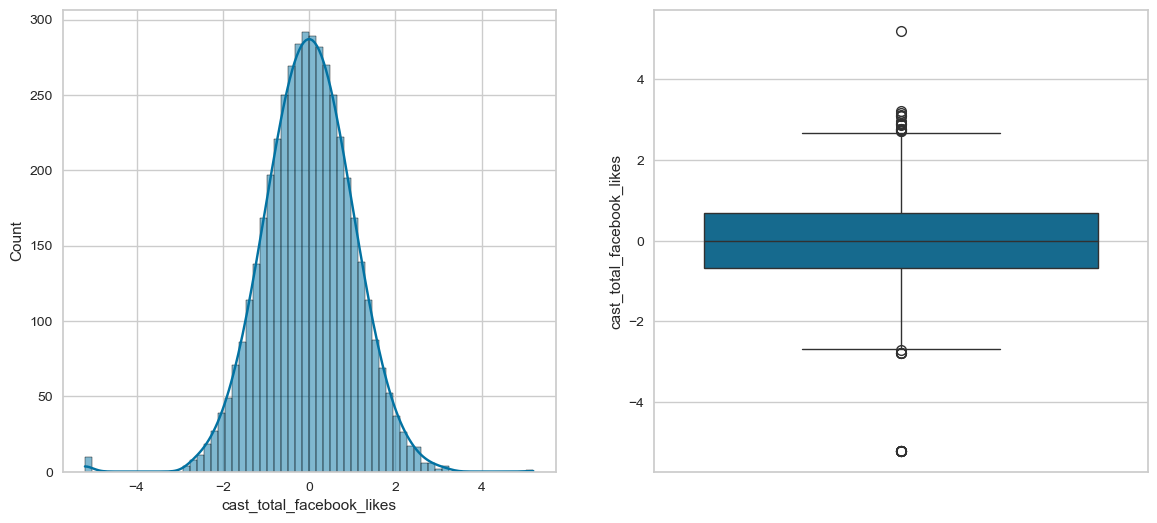

In [622]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['cast_total_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['cast_total_facebook_likes'], ax = axes[1])

In [623]:
find_outliers_iqr(df_film['cast_total_facebook_likes']).shape[0]

290

In [624]:
df_film_like['cast_total_facebook_likes'] = winorizing(df_film_like, 'cast_total_facebook_likes')

<Axes: ylabel='cast_total_facebook_likes'>

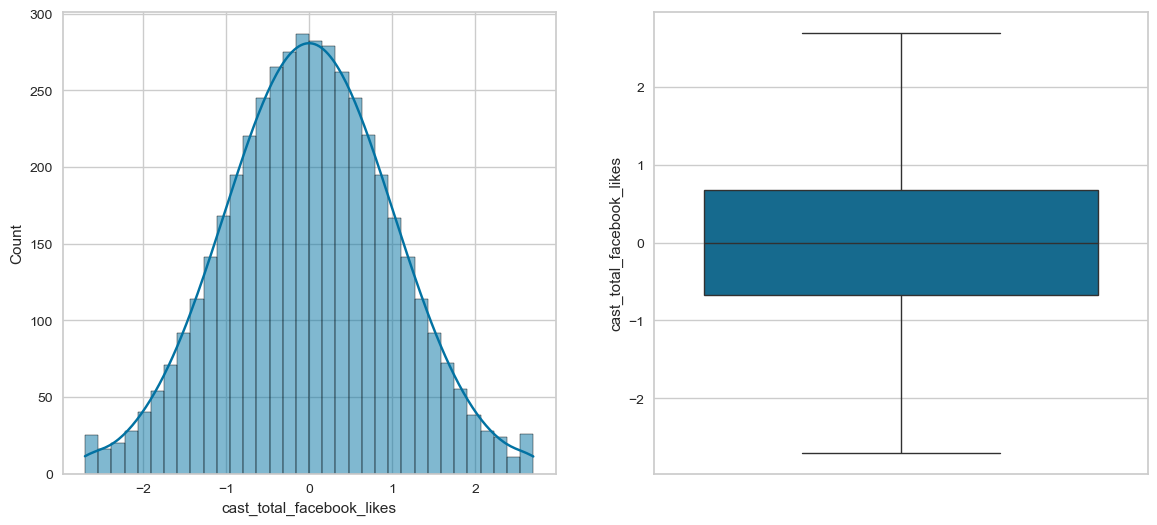

In [625]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['cast_total_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['cast_total_facebook_likes'], ax = axes[1])

##### director_facebook_likes

In [627]:
df_film_like['director_facebook_likes'].min()

0.0

<Axes: ylabel='director_facebook_likes'>

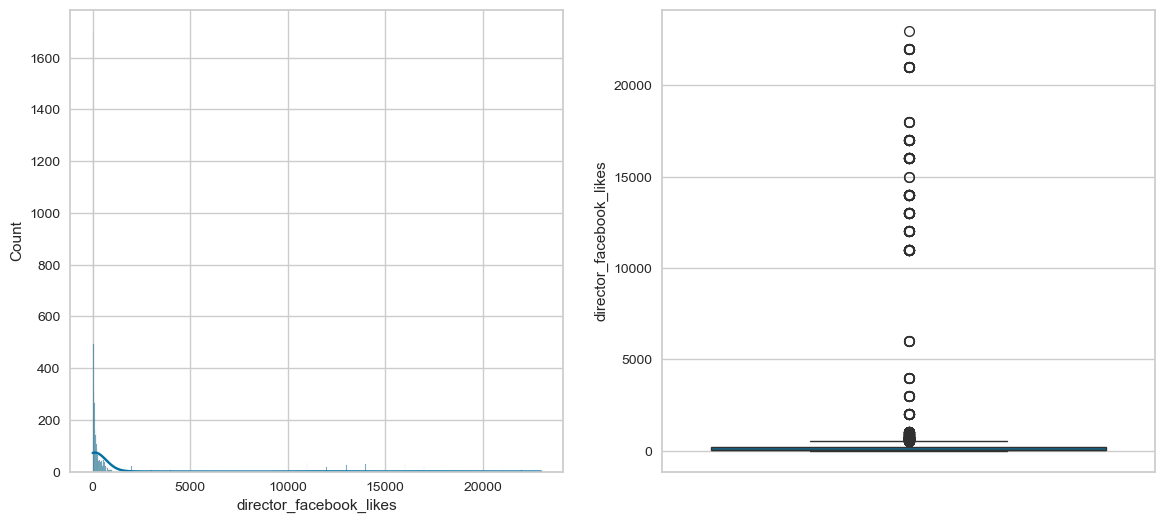

In [628]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['director_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['director_facebook_likes'], ax = axes[1])

In [629]:
find_outliers_iqr(df_film['director_facebook_likes']).shape[0]

529

In [630]:
df_film_like['director_facebook_likes'] += 1

In [631]:
df_film_like['director_facebook_likes'], fitted_lambda = boxcox(df_film_like['director_facebook_likes'])

<Axes: ylabel='director_facebook_likes'>

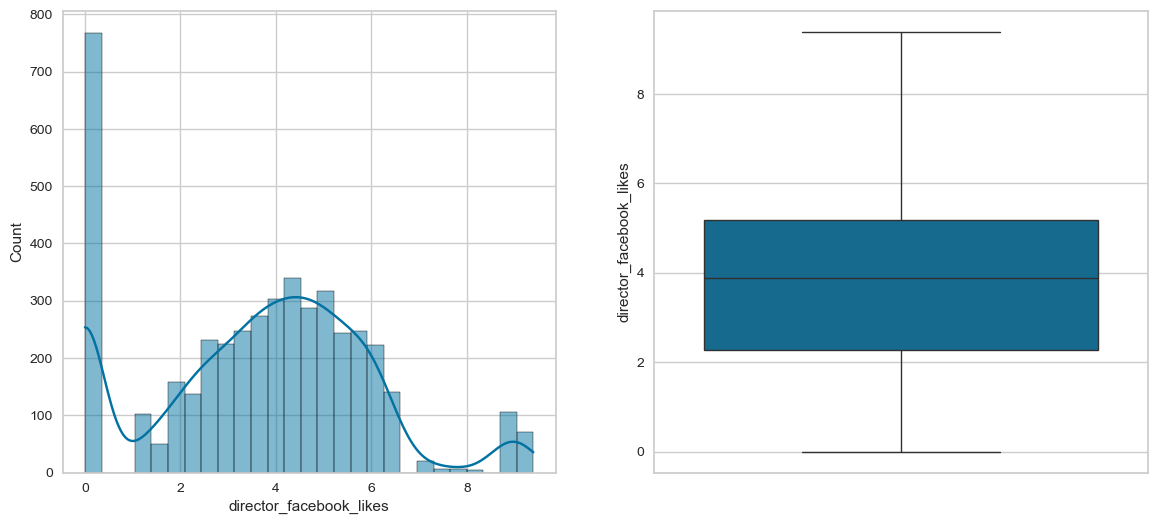

In [632]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['director_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['director_facebook_likes'], ax = axes[1])

In [633]:
find_outliers_iqr(df_film_like['director_facebook_likes']).shape[0]

0

##### movie_facebook_likes

In [635]:
df_film_like['movie_facebook_likes'].min()

0

<Axes: ylabel='movie_facebook_likes'>

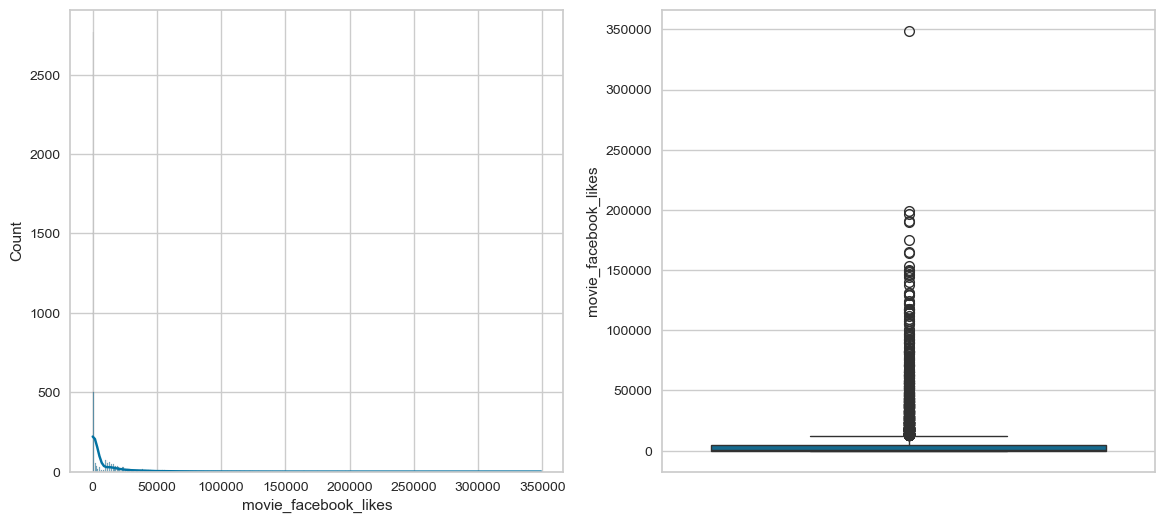

In [636]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['movie_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['movie_facebook_likes'], ax = axes[1])

In [637]:
find_outliers_iqr(df_film['movie_facebook_likes']).shape[0]

864

In [638]:
qt_movie_like = QuantileTransformer(output_distribution='normal')
transformed_data = qt_movie_like.fit_transform(df_film_like[['movie_facebook_likes']])

In [639]:
df_film_like['movie_facebook_likes'] = transformed_data

<Axes: ylabel='movie_facebook_likes'>

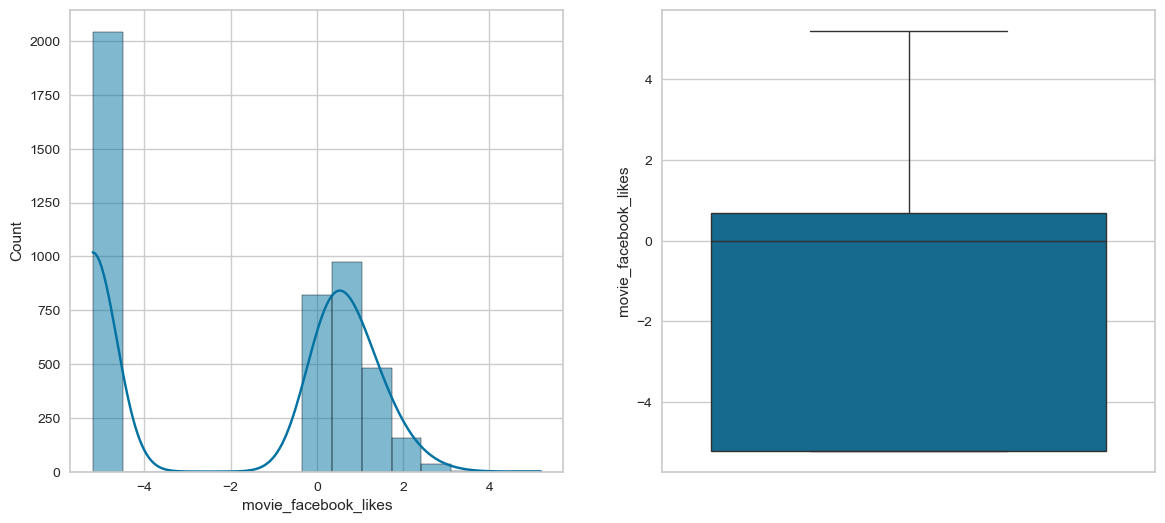

In [640]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['movie_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['movie_facebook_likes'], ax = axes[1])

<Axes: ylabel='movie_facebook_likes'>

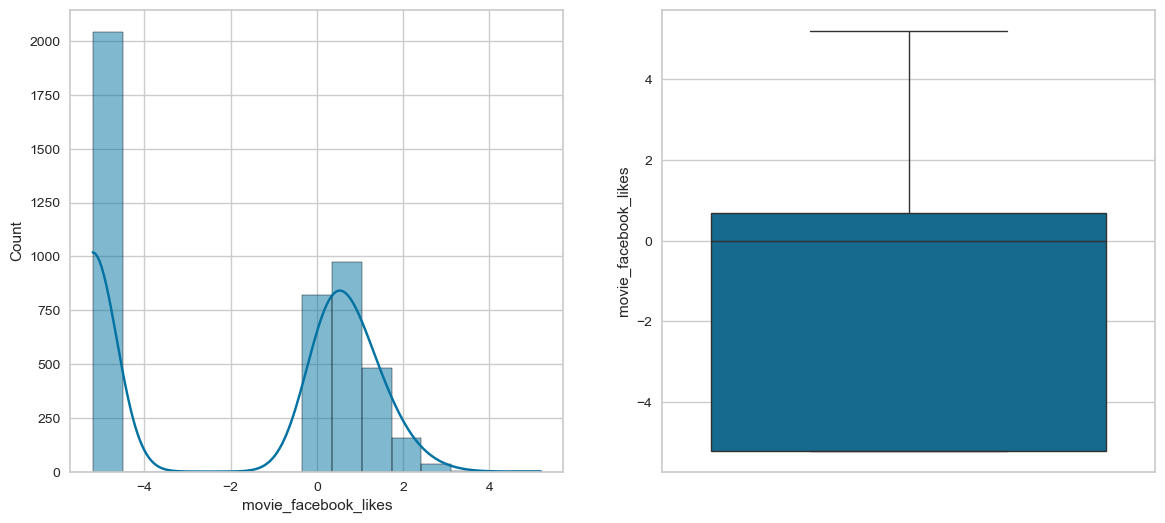

In [641]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df_film_like['movie_facebook_likes'], kde= True, ax = axes[0])
sns.boxplot(df_film_like['movie_facebook_likes'], ax = axes[1])

##### PCA likes

In [643]:
correl_likes_after_transf = df_film_like[['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']].corr()

In [644]:
correl_likes_after_transf

actor_3_facebook_likes  actor_2_facebook_likes  \
actor_3_facebook_likes                   1.000000                0.856082   
actor_2_facebook_likes                   0.856082                1.000000   
actor_1_facebook_likes                   0.656132                0.760354   
cast_total_facebook_likes                0.778979                0.854724   

                           actor_1_facebook_likes  cast_total_facebook_likes  
actor_3_facebook_likes                   0.656132                   0.778979  
actor_2_facebook_likes                   0.760354                   0.854724  
actor_1_facebook_likes                   1.000000                   0.957324  
cast_total_facebook_likes                0.957324                   1.000000

<Axes: >

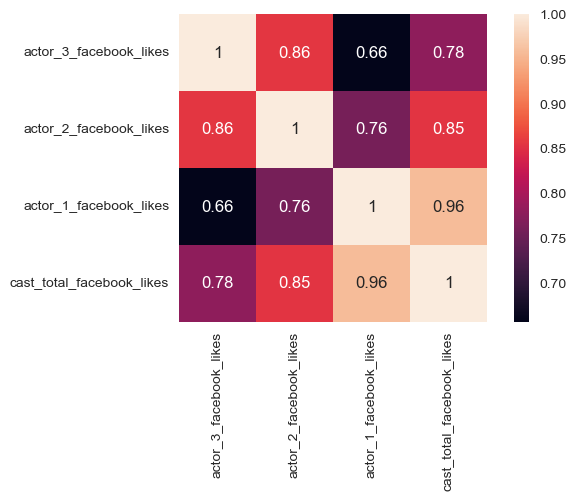

In [645]:
plt.figure(figsize=(7, 4))
sns.heatmap(correl_likes_after_transf, annot=True, cbar=True, square=True)

In [646]:
scal_like = StandardScaler()
scaled_data = scal_like.fit_transform(df_film_like[['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']])

In [647]:
df_film_like[['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']] = scaled_data

In [648]:
from sklearn.decomposition import PCA

In [649]:
pca = PCA(n_components=1)
principal_component = pca.fit_transform(df_film_like[['actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes']])

In [650]:
pca.explained_variance_ratio_

array([0.85889396])

In [651]:
df_film_like['act_cast_like_PCA'] = principal_component

In [652]:
df_film = df_film_like.copy()

## Feature selection

In [654]:
df_film.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'categ_year_film',
       'name_country', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'genre_aver_bud_aver_freq', 'genre_low_bud_low_freq',
       'genre_high_bud_aver_freq', 'genre_aver_bud_high_freq',
       'content_rating_high_gross', 'war_symb_title_low_gross',
   

In [655]:
df_film_num = df_film_like.drop(columns =['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'movie_imdb_link', 'name_country', 'content_rating', 'categ_year_film'])

In [656]:
df_film_num_clear = df_film_num.dropna()

In [657]:
cor_film = df_film_num_clear.corr()

In [658]:
cor_film['gross'].sort_values(ascending = False)

gross                             1.000000
num_voted_users                   0.699054
budget                            0.634465
num_user_for_reviews              0.617059
num_critic_for_reviews            0.466697
act_cast_like_PCA                 0.394291
cast_total_facebook_likes         0.376403
actor_2_facebook_likes            0.375801
actor_3_facebook_likes            0.372611
actor_1_facebook_likes            0.329342
genre_aver_bud_aver_freq          0.316392
Adventure                         0.305604
duration                          0.272460
Action                            0.232485
Family                            0.226935
Fantasy                           0.179502
genre_low_bud_low_freq            0.173988
Animation                         0.173988
Sci-Fi                            0.149085
director_facebook_likes           0.139782
aspect_ratio                      0.126133
imdb_score                        0.125740
color                             0.061484
Thriller   

<Axes: >

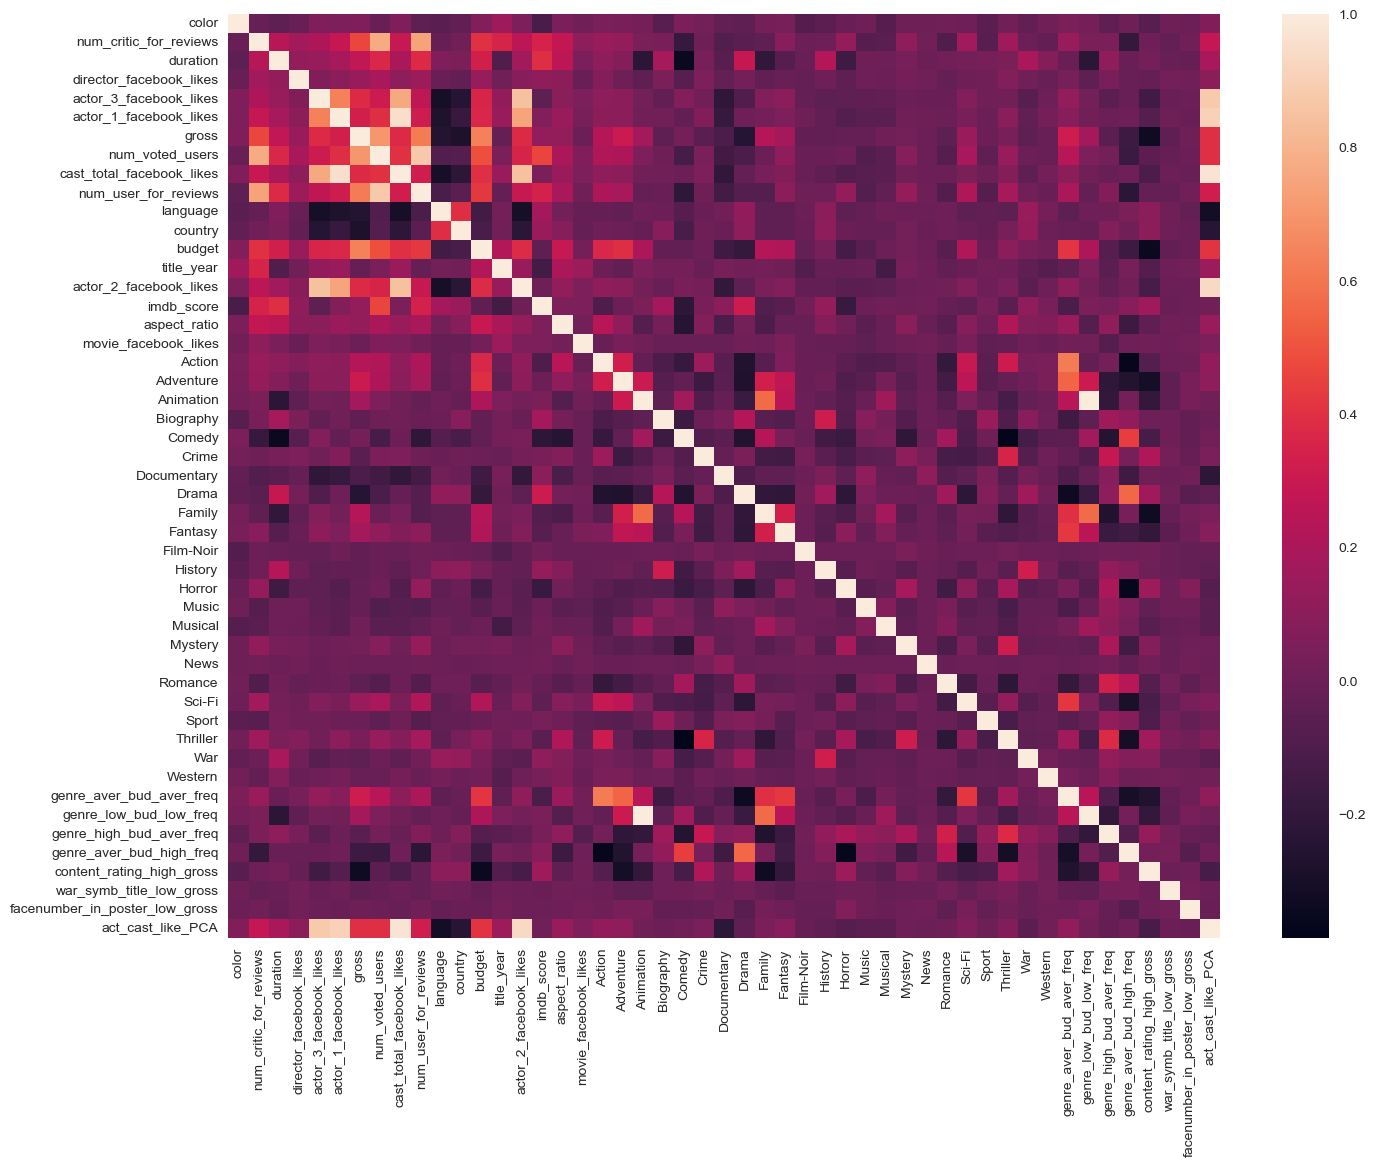

In [659]:
plt.figure(figsize=(16, 12))
sns.heatmap(cor_film)

In [660]:
y = df_film_num_clear['gross']
X = df_film_num_clear.drop('gross', axis = 1)

In [661]:
mi_scores = mutual_info_regression(X, y)

In [662]:
mi_df = pd.DataFrame(mi_scores, index=X.columns, columns=['Mutual Information'])

In [663]:
mi_df.sort_values(by = 'Mutual Information', ascending = False)

Mutual Information
num_voted_users                           0.359269
budget                                    0.290604
num_user_for_reviews                      0.261606
movie_facebook_likes                      0.130416
num_critic_for_reviews                    0.107798
act_cast_like_PCA                         0.088422
actor_1_facebook_likes                    0.070849
imdb_score                                0.069361
cast_total_facebook_likes                 0.063836
actor_2_facebook_likes                    0.063550
genre_aver_bud_aver_freq                  0.062567
Adventure                                 0.060265
actor_3_facebook_likes                    0.058746
content_rating_high_gross                 0.058615
duration                                  0.055015
director_facebook_likes                   0.048913
country                                   0.046711
Action                                    0.038516
Drama                                     0.036194
language                                  0.034994
Family                                    0.031289
genre_high_bud_aver_freq                  0.021797
Fantasy                                   0.021738
Thriller                                  0.018737
genre_aver_bud_high_freq                  0.018393
Animation                                 0.016380
genre_low_bud_low_freq                    0.016371
Horror                                    0.015393
Crime                                     0.014212
Biography                                 0.013497
facenumber_in_poster_low_gross            0.009019
title_year                                0.008801
Documentary                               0.008288
War                                       0.008271
Romance                                   0.006852
Sci-Fi                                    0.006324
Mystery                                   0.005724
History                                   0.004649
aspect_ratio                              0.004176
Comedy                                    0.003594
color                                     0.000556
Western                                   0.000266
Sport                                     0.000000
Musical                                   0.000000
Music                                     0.000000
war_symb_title_low_gross                  0.000000
Film-Noir                                 0.000000
News                                      0.000000

### DF with different approaches

#### Use spliting genre

In [666]:
df_film_genr_split = df_film_num.drop(columns = ['genre_high_bud_aver_freq', 'genre_aver_bud_aver_freq', 'genre_aver_bud_high_freq', 'genre_low_bud_low_freq', 'act_cast_like_PCA'])

In [667]:
df_film_genr_split.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews', 'language',
       'country', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'content_rating_high_gross',
       'war_symb_title_low_gross', 'facenumber_in_poster_low_gross'],
      dtype='object')

##### Select test part (with nan values)

In [669]:
df_film_genr_split_test = df_film_genr_split[df_film_genr_split['gross'].isnull()]

In [670]:
df_film_genr_split.dropna(subset = ['gross'], inplace = True)

In [671]:
df_film_genr_split.shape

(3969, 44)

In [1050]:
df_film_genr_split.to_csv('df_film_genr_split.csv')

In [1064]:
df_film_genr_split.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews', 'language',
       'country', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'content_rating_high_gross',
       'war_symb_title_low_gross', 'facenumber_in_poster_low_gross'],
      dtype='object')

In [1052]:
df_film_genr_split_test.to_csv('df_film_genr_split_test.csv')

#### Use cluster genre and pca like

In [673]:
df_film_genr_cluster_pca_like = df_film_num.drop(columns = name_genres + ['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes'])

In [674]:
df_film_genr_cluster_pca_like.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'gross', 'num_voted_users',
       'num_user_for_reviews', 'language', 'country', 'budget', 'title_year',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'genre_aver_bud_aver_freq', 'genre_low_bud_low_freq',
       'genre_high_bud_aver_freq', 'genre_aver_bud_high_freq',
       'content_rating_high_gross', 'war_symb_title_low_gross',
       'facenumber_in_poster_low_gross', 'act_cast_like_PCA'],
      dtype='object')

##### Select test part (with nan values)

In [676]:
df_film_genr_cluster_pca_like_test = df_film_genr_cluster_pca_like[df_film_genr_cluster_pca_like['gross'].isnull()]

In [677]:
df_film_genr_cluster_pca_like.dropna(subset = ['gross'], inplace = True)

In [678]:
df_film_genr_cluster_pca_like.shape

(3969, 22)

# Modeling 

In [695]:
from sklearn.model_selection import train_test_split

In [1056]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate, LearningCurveDisplay, ValidationCurveDisplay
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, early_stopping
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
import scipy.stats as stats
import joblib

In [697]:
random_state=42
num_folds=2

In [698]:
n_iter=150

In [699]:
kf = KFold(n_splits=num_folds, random_state=random_state, shuffle = True)

## Split genres

In [701]:
X_train_genr_split, X_valid_genr_split, y_train_genr_split, y_valid_genr_split = train_test_split(df_film_genr_split.drop('gross', axis = 1), df_film_genr_split['gross'], test_size=0.2, random_state=44)

#### check how dataset is splitted

<Axes: xlabel='gross', ylabel='Count'>

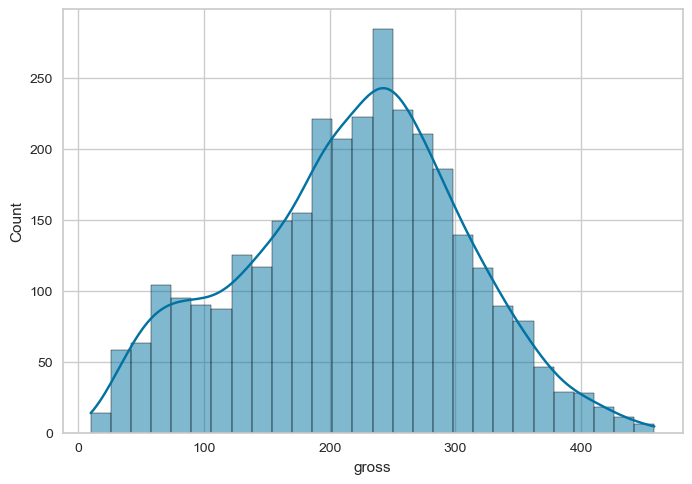

In [703]:
sns.histplot(y_train_genr_split, kde = True)

<Axes: xlabel='gross', ylabel='Count'>

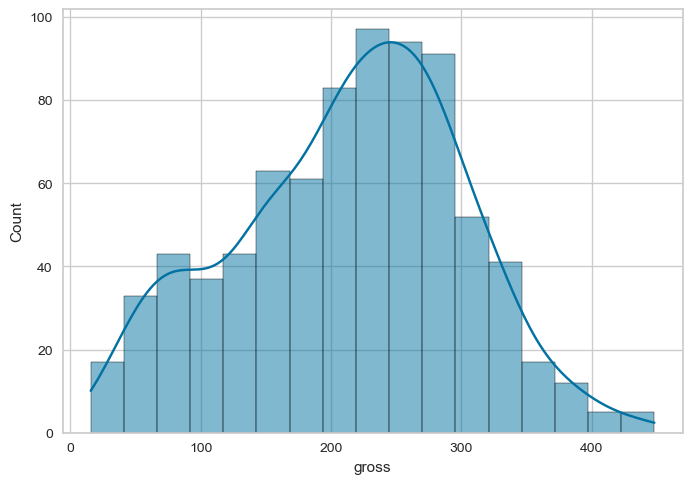

In [704]:
sns.histplot(y_valid_genr_split, kde = True)

### XGBOOST

#### Bayessian approach in optimization (tpe)

In [707]:
#trials = Trials()

In [708]:
#best=fmin(fn=gb_mse_cv, # function to optimize
         # space=space, 
         # algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
         # max_evals=n_iter, # maximum number of iterations
         # trials=trials, # logging
         # rstate=np.random.default_rng(random_state) # fixing random state for the reproducibility
        # )

In [709]:
#model = XGBRegressor(random_state=random_state, n_estimators=int(best['n_estimators']),max_depth=int(best['max_depth']),learning_rate=best['learning_rate'])

In [710]:
#model.fit(X_train_genr_split,y_train_genr_split)

In [711]:
#tpe_test_score=mean_squared_error(y_valid_genr_split, model.predict(X_valid_genr_split))

In [712]:
#print("Best MSE {:.3f} params {}".format( gb_mse_cv(best), best))

In [713]:
#tpe_results=np.array([[x['result']['loss'],x['misc']['vals']['learning_rate'][0], x['misc']['vals']['max_depth'][0],x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

In [714]:
#tpe_results_df=pd.DataFrame(tpe_results, columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])

In [715]:
#tpe_results_df.plot(subplots=True,figsize=(10, 10))

#### Simulated Anneal

In [717]:
space={'n_estimators': hp.quniform('n_estimators', 45, 100, 1),
       'max_depth' : 3,
       'learning_rate': hp.loguniform('learning_rate', -1.6044, -1.0498)
      }

In [718]:
def tune_hyperpar_anneal(model_name, space, X, y, list_param_to_int, pipeline_bool = False):
    def gb_mse_cv(params, random_state=random_state, cv=kf):
        for name_param in list_param_to_int:
            params[name_param] = int(params[name_param])
        if pipeline_bool == False:
            model = model_name(random_state=random_state, **params)
        else:
             model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=params['degree']), model_name(alpha=params['alpha']))
        score = -cross_val_score(model, X, y, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1).mean()
        return score
    
    trials_sim_anneal = Trials()
    best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=anneal.suggest, # (optimization algorithm) hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials_sim_anneal, # logging
          rstate=np.random.default_rng(random_state) 
         )
    return {'best': best, 'trials': trials_sim_anneal}

In [719]:
dict_tun_hyper = tune_hyperpar_anneal(XGBRegressor, space, X_train_genr_split, y_train_genr_split, ['n_estimators'])

100%|████████| 150/150 [00:19<00:00,  7.73trial/s, best loss: 43.83295428328118]


In [720]:
best = dict_tun_hyper['best']

In [721]:
best

{'learning_rate': 0.23123483826134014, 'n_estimators': 93.0}

In [722]:
trials = dict_tun_hyper['trials']

In [723]:
trials.trials

[{'state': 2,
  'tid': 0,
  'spec': None,
  'result': {'loss': 44.88235018351453, 'status': 'ok'},
  'misc': {'tid': 0,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'learning_rate': [0], 'n_estimators': [0]},
   'vals': {'learning_rate': [0.28351733710105614], 'n_estimators': [90.0]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2024, 8, 22, 8, 59, 34, 831000),
  'refresh_time': datetime.datetime(2024, 8, 22, 8, 59, 36, 391000)},
 {'state': 2,
  'tid': 1,
  'spec': None,
  'result': {'loss': 44.72326668945804, 'status': 'ok'},
  'misc': {'tid': 1,
   'cmd': ('domain_attachment', 'FMinIter_Domain'),
   'workdir': None,
   'idxs': {'learning_rate': [1], 'n_estimators': [1]},
   'vals': {'learning_rate': [0.338586473790207], 'n_estimators': [89.0]}},
  'exp_key': None,
  'owner': None,
  'version': 0,
  'book_time': datetime.datetime(2024, 8, 22, 8, 59, 36, 397000),
  'refresh_time': datetime.datetime(2024, 8,

#### How the hyperparametres are set

In [725]:
def visual_tune_hyperpar(list_hyperpar, trials):
    anneal_results = {'loss': []}
    for name_hyper in list_hyperpar:
        anneal_results[name_hyper] = []
        
    for x in trials.trials:
        for hyperpar in list_hyperpar:
            anneal_results[hyperpar].append(x['misc']['vals'][hyperpar][0])
        anneal_results['loss'].append(x['result']['loss'])
    anneal_results_df=pd.DataFrame.from_dict(anneal_results)
    anneal_results_df.plot(subplots=True,figsize=(10, 10))

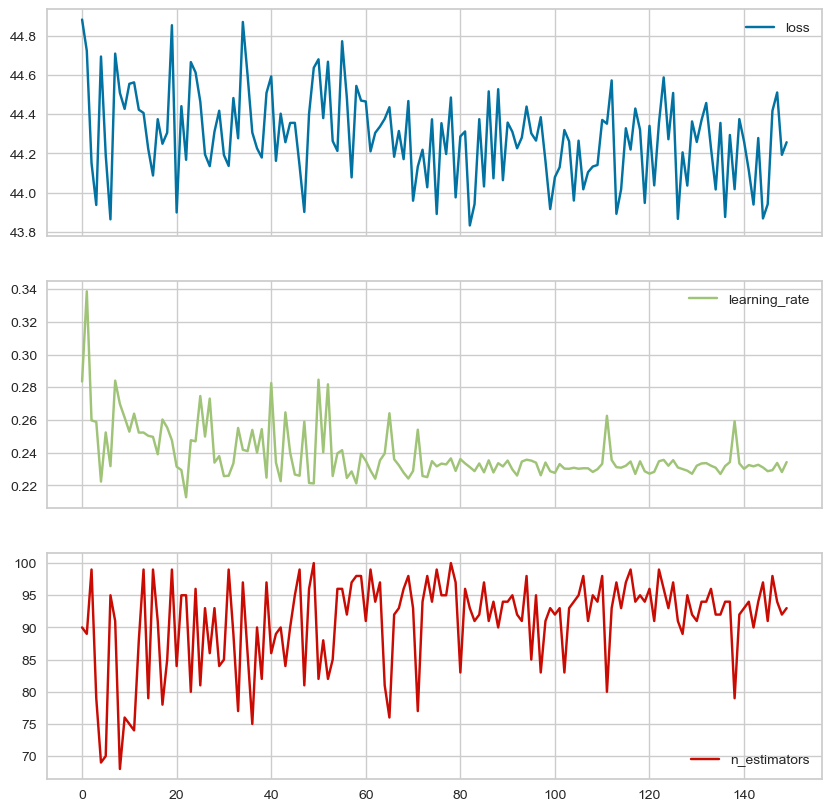

In [726]:
visual_tune_hyperpar(['learning_rate', 'n_estimators'], trials)

#### Fit the model

In [728]:
model_xgb_split_genre = XGBRegressor(random_state=random_state, n_estimators= int(best['n_estimators']),
                      max_depth=3, learning_rate=best['learning_rate'], eval_metric=['mape', 'rmse'], early_stopping_rounds = 5)

In [729]:
model_xgb_split_genre.fit(
    X_train_genr_split, 
    y_train_genr_split, eval_set=[(X_train_genr_split, y_train_genr_split), (X_valid_genr_split, y_valid_genr_split)])

[0]	validation_0-mape:0.52079	validation_0-rmse:77.41873	validation_1-mape:0.53635	validation_1-rmse:76.73282
[1]	validation_0-mape:0.46781	validation_0-rmse:69.34792	validation_1-mape:0.48427	validation_1-rmse:69.37444
[2]	validation_0-mape:0.42721	validation_0-rmse:63.72149	validation_1-mape:0.44394	validation_1-rmse:64.25537
[3]	validation_0-mape:0.39853	validation_0-rmse:59.54698	validation_1-mape:0.41371	validation_1-rmse:60.33690
[4]	validation_0-mape:0.37296	validation_0-rmse:56.42847	validation_1-mape:0.38636	validation_1-rmse:57.35942
[5]	validation_0-mape:0.35487	validation_0-rmse:54.17016	validation_1-mape:0.36931	validation_1-rmse:55.37324
[6]	validation_0-mape:0.33668	validation_0-rmse:52.23906	validation_1-mape:0.34999	validation_1-rmse:53.33196
[7]	validation_0-mape:0.32473	validation_0-rmse:50.74677	validation_1-mape:0.33873	validation_1-rmse:51.96954
[8]	validation_0-mape:0.31028	validation_0-rmse:49.34888	validation_1-mape:0.32483	validation_1-rmse:50.80178
[9]	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=['mape', 'rmse'],
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.23123483826134014, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=93, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [730]:
root_mean_squared_error(y_valid_genr_split, model_xgb_split_genre.predict(X_valid_genr_split))

42.451228695335125

In [731]:
mean_absolute_percentage_error(y_valid_genr_split, model_xgb_split_genre.predict(X_valid_genr_split))

0.24240403122466392

In [732]:
model_xgb_split_genre.best_iteration

85

In [733]:
model_xgb_split_genre.predict(X_valid_genr_split)

array([176.1745  , 270.17273 , 207.09538 , 107.380554, 178.36864 ,
       217.7428  , 344.51236 , 233.62843 , 145.21135 , 178.30467 ,
       232.44177 , 119.59689 , 136.84262 , 183.59865 , 224.49242 ,
       171.13383 , 245.93192 , 182.62022 , 213.22917 , 207.71516 ,
       185.29463 , 207.73305 , 289.30994 , 151.38194 , 146.1394  ,
        65.44344 , 226.93095 , 283.86926 , 365.85117 , 280.87918 ,
       259.78003 , 368.1041  , 228.56253 , 206.37039 , 166.69122 ,
        46.09415 , 206.18611 , 186.11505 , 193.6665  , 251.62827 ,
       236.13512 , 302.83282 , 200.19576 ,  37.606236, 112.10589 ,
       161.32846 , 295.0632  , 249.93617 , 145.22667 , 250.35457 ,
       126.65453 , 199.02132 , 249.29865 , 197.18927 , 143.36581 ,
       238.2776  ,  74.4199  , 233.72414 , 248.79451 ,  37.947006,
       141.8353  , 115.86247 , 231.49521 , 108.554146, 282.173   ,
       160.23734 , 268.7082  ,  81.80313 , 356.58997 , 262.9206  ,
       211.79858 , 334.20132 , 210.81676 ,  84.17476 ,  69.687

In [734]:
y_valid_genr_split

1076    149.063460
358      41.968859
2408    268.270337
4074     82.683840
2998    164.069133
           ...    
3247    134.777887
1175    264.889726
588     193.310665
3145    215.748207
3339    180.286421
Name: gross, Length: 794, dtype: float64

In [735]:
def vizual_train_model(model_res_train, model_res_val):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(model_res_train['mape'], label='Train MAPE')
    ax1.plot(model_res_val['mape'], label='Valid MAPE')
    ax1.set_title('MAPE')
    ax1.set_xlabel('Tree')
    ax1.set_ylabel('MAPE')
    ax1.legend()
    
    ax2.plot(model_res_train['rmse'], label='Train RMSE')
    ax2.plot(model_res_val['rmse'], label='Valid RMSE')
    ax2.set_title('RMSE')
    ax2.set_xlabel('Tree')
    ax2.set_ylabel('RMSE')
    ax2.legend()

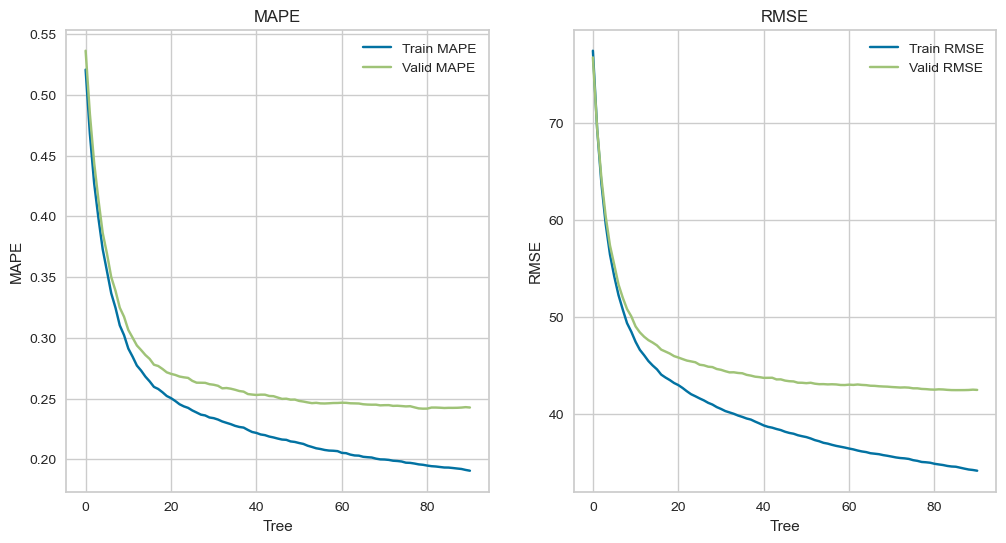

In [736]:
vizual_train_model(model_xgb_split_genre.evals_result()['validation_0'], model_xgb_split_genre.evals_result()['validation_1'])

#### Get distribution of absolute errors

In [1131]:
distr_abs_err_xgb_split_genre = pd.DataFrame(np.absolute(model_xgb_split_genre.predict(X_valid_genr_split) - y_valid_genr_split)).rename(columns = {'gross': 'xgboost_split_genre'})

In [1133]:
distr_abs_err_xgb_split_genre = distr_abs_err_xgb_split_genre.reset_index()

In [1135]:
distr_abs_err_xgb_split_genre

index  xgboost_split_genre
0     1076            27.111040
1      358           228.203871
2     2408            61.174955
3     4074            24.696714
4     2998            14.299505
..     ...                  ...
789   3247            35.833986
790   1175             1.142378
791    588            66.209507
792   3145            67.951057
793   3339            32.756407

[794 rows x 2 columns]

In [1137]:
distr_abs_err_xgb_split_genre.to_csv('distr_abs_err_xgb_split_genre.csv')

#### Check stability of the model using random state

##### preparing the parametres of the model

In [739]:
param_xgb_split_genre = model_xgb_split_genre.get_xgb_params()

In [740]:
param_xgb_split_genre.pop('random_state')

42

In [741]:
param_xgb_split_genre['n_estimators'] = model_xgb_split_genre.n_estimators

##### stability of the model on each random_state

In [743]:
sample_size_stability = 100

In [744]:
def metrics_diff_random_state(name_model, param_model = {}, X = df_film_genr_split.drop('gross', axis = 1), y = df_film_genr_split['gross'], pipeline_bool = False, sample_size_stability = sample_size_stability):
    random.seed(42) # to selected_random_states will be the same after every running
    range_random = range(1, 1001)
    selected_random_states = random.sample(range_random, sample_size_stability)
    dic_rand_st_metric = {}
    for i in selected_random_states:
        if pipeline_bool == False:
            model = name_model(random_state=i, **param_model)
        else:
            model = name_model
        score = cross_validate(model, X, y, cv=KFold(n_splits=5, random_state=i, shuffle = True), scoring=["neg_root_mean_squared_error", 'neg_mean_absolute_percentage_error'], n_jobs=-1)
        rmse_mean = -score['test_neg_root_mean_squared_error'].mean()
        rmse_std = score['test_neg_root_mean_squared_error'].std()
        mape_mean = -score['test_neg_mean_absolute_percentage_error'].mean()
        mape_std = score['test_neg_mean_absolute_percentage_error'].std()
        score_time_mean = score['score_time'].mean()
        score_time_std = score['score_time'].std()
        dic_rand_st_metric[i] = [rmse_mean, rmse_std, mape_mean, mape_std, score_time_mean, score_time_std]
    df_rand_st_metric = pd.DataFrame.from_dict(data = dic_rand_st_metric, orient='index', columns=['rmse_mean', 'rmse_std', 'mape_mean', 'mape_std', 'score_time_mean', 'score_time_std']).reset_index(names = 'random_state')
    return df_rand_st_metric

In [745]:
df_rand_st_metric_xgboost_split_genre = metrics_diff_random_state(XGBRegressor, param_model = param_xgb_split_genre)

In [746]:
df_rand_st_metric_xgboost_split_genre

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  42.530412  1.692582   0.238319  0.013806         0.013297   
1            115  42.849831  0.630598   0.238368  0.006029         0.013813   
2             26  42.830519  1.051225   0.239043  0.014128         0.011878   
3            760  42.779824  1.429611   0.240987  0.009392         0.013746   
4            282  43.031755  1.267186   0.241052  0.016550         0.013180   
..           ...        ...       ...        ...       ...              ...   
95           167  42.727375  0.401961   0.237954  0.013856         0.018522   
96           380  43.388980  1.669338   0.243103  0.014774         0.013062   
97           364  43.027589  1.143080   0.242380  0.012862         0.014804   
98           215  42.487378  1.237557   0.238791  0.010970         0.013810   
99           687  43.016165  0.864357   0.240534  0.017653         0.014608   

    score_time_std  
0         0.000355  
1         0.002269  
2         0.000509  
3         0.001830  
4         0.001263  
..             ...  
95        0.003019  
96        0.000357  
97        0.002355  
98        0.001025  
99        0.001083  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [748]:
def create_dic_final_analize_model(df_rand_st_metric):
    dict_analize_model = {}
    dict_analize_model['rmse_mean'] = df_rand_st_metric['rmse_mean'].mean()
    dict_analize_model['rmse_std'] = df_rand_st_metric['rmse_mean'].std()
    dict_analize_model['mape_mean'] = df_rand_st_metric['mape_mean'].mean()
    dict_analize_model['mape_std'] = df_rand_st_metric['mape_mean'].std()
    dict_analize_model['score_time_mean'] = df_rand_st_metric['score_time_mean'].mean()
    dict_analize_model['score_time_std'] = df_rand_st_metric['score_time_std'].std()
    return dict_analize_model

In [749]:
def visializ_final_anal_model(df_rand_st_metric, final_analize_dic):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6))
    sns.histplot(df_rand_st_metric['rmse_mean'], kde = True, ax=ax1)
    ax1.axvline(final_analize_dic['rmse_mean'], color='r', linestyle='--', label = 'Mean')
    ax1.axvline(final_analize_dic['rmse_mean'] - final_analize_dic['rmse_std'], color='g', linestyle='--', label = 'std')
    ax1.axvline(final_analize_dic['rmse_mean'] + final_analize_dic['rmse_std'], color='g', linestyle='--')
    ax1.legend()
    
    sns.histplot(df_rand_st_metric['mape_mean'], kde = True, ax=ax2)
    ax2.axvline(final_analize_dic['mape_mean'], color='r', linestyle='--', label = 'Mean')
    ax2.axvline(final_analize_dic['mape_mean'] - final_analize_dic['mape_std'], color='g', linestyle='--', label = 'std')
    ax2.axvline(final_analize_dic['mape_mean'] + final_analize_dic['mape_std'], color='g', linestyle='--')
    ax2.legend()
    
    sns.histplot(df_rand_st_metric['score_time_mean'], kde = True, ax=ax3)
    ax3.axvline(final_analize_dic['score_time_mean'], color='r', linestyle='--', label = 'Mean')
    ax3.axvline(final_analize_dic['score_time_mean'] - final_analize_dic['score_time_std'], color='g', linestyle='--', label = 'std')
    ax3.axvline(final_analize_dic['score_time_mean'] + final_analize_dic['score_time_std'], color='g', linestyle='--')
    ax3.legend()

In [750]:
xgb_split_genre_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_xgboost_split_genre)

In [751]:
xgb_split_genre_final_analize_dic

{'rmse_mean': 42.841299181096694,
 'rmse_std': 0.21382231559211157,
 'mape_mean': 0.24006889115299887,
 'mape_std': 0.0014934743432868946,
 'score_time_mean': 0.01658607578277588,
 'score_time_std': 0.0030271332724590293}

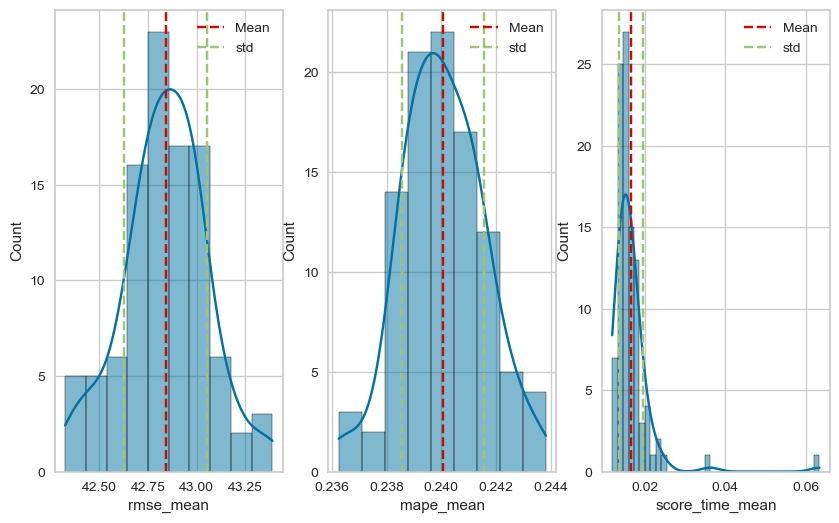

In [752]:
visializ_final_anal_model(df_rand_st_metric_xgboost_split_genre, xgb_split_genre_final_analize_dic)

### LightGBM

In [754]:
space_lgbm = {
    'num_leaves': 27, 
    'min_child_samples': 9,
    'learning_rate': hp.loguniform('learning_rate', -1.96611, -1.83258),
    'n_estimators': hp.quniform('n_estimators', 69, 81, 1)
}

In [755]:
dict_tun_hyper = tune_hyperpar_anneal(LGBMRegressor, space_lgbm, X_train_genr_split, y_train_genr_split, ['n_estimators'])

100%|███████| 150/150 [00:23<00:00,  6.36trial/s, best loss: 44.100903871128374]


In [756]:
best_lgbm_split_genre = dict_tun_hyper['best']
best_lgbm_split_genre

{'learning_rate': 0.1446694567588817, 'n_estimators': 77.0}

In [757]:
trials_lgbm_split_genre = dict_tun_hyper['trials']

#### How hyperparameters are set

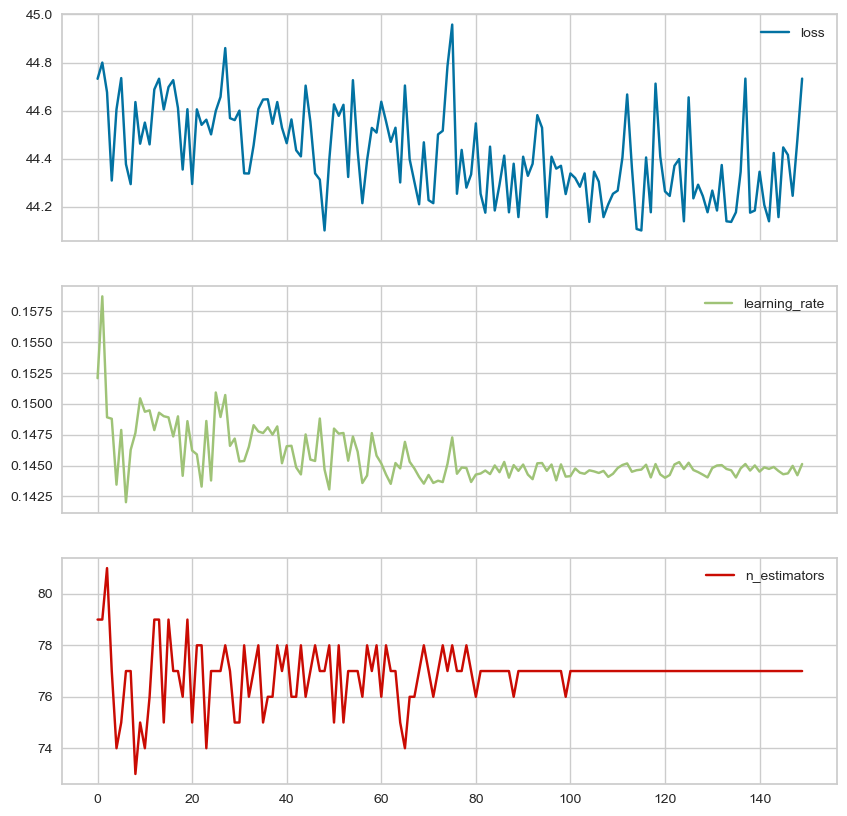

In [759]:
visual_tune_hyperpar(['learning_rate', 'n_estimators'], trials_lgbm_split_genre)

In [760]:
print("Best params", best_lgbm_split_genre)

Best params {'learning_rate': 0.1446694567588817, 'n_estimators': 77.0}


#### Fit ther model

In [762]:
model_lgbmr_split_genre = LGBMRegressor(random_state=random_state, num_leaves = 27, min_child_samples = 9, learning_rate = 0.15, n_estimators = 77)

In [763]:
model_lgbmr_split_genre.fit(
    X_train_genr_split, 
    y_train_genr_split,eval_set=[(X_train_genr_split, y_train_genr_split), (X_valid_genr_split, y_valid_genr_split)], eval_metric=['mape', 'rmse'], callbacks=[early_stopping(stopping_rounds=5)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2623
[LightGBM] [Info] Number of data points in the train set: 3175, number of used features: 41
[LightGBM] [Info] Start training from score 217.867585
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	training's mape: 0.14174	training's rmse: 26.0012	training's l2: 676.061	valid_1's mape: 0.23229	valid_1's rmse: 41.7034	valid_1's l2: 1739.17


LGBMRegressor(learning_rate=0.15, min_child_samples=9, n_estimators=77,
              num_leaves=27, random_state=42)

In [764]:
model_lgbmr_split_genre.best_iteration_

61

In [765]:
lgbm_split_genre_rmse = root_mean_squared_error(y_valid_genr_split, model_lgbmr_split_genre.predict(X_valid_genr_split))

In [766]:
lgbm_split_genre_rmse

41.70340645525173

In [767]:
lgbm_split_genre_mape = mean_absolute_percentage_error(y_valid_genr_split, model_lgbmr_split_genre.predict(X_valid_genr_split))

In [768]:
lgbm_split_genre_mape

0.2322899744047985

In [769]:
model_lgbmr_split_genre.evals_result_

{'training': OrderedDict([('mape',
               [0.5344828241114806,
                0.4859375624430361,
                0.44539868022286,
                0.4115652701024747,
                0.3833267985687835,
                0.3584407793829757,
                0.3372480292118876,
                0.31885562106539694,
                0.3026303436527011,
                0.28934927036679114,
                0.2777832342167814,
                0.268092552448451,
                0.25968317414933273,
                0.2509712751779458,
                0.24432495629780404,
                0.2377057364453312,
                0.23151108784607588,
                0.22690785067216565,
                0.22206098307025018,
                0.2177594155114517,
                0.21331345444438518,
                0.2088285171220709,
                0.20543922726335528,
                0.20186213113119897,
                0.19889700294528495,
                0.19563581445936262,
                0.19

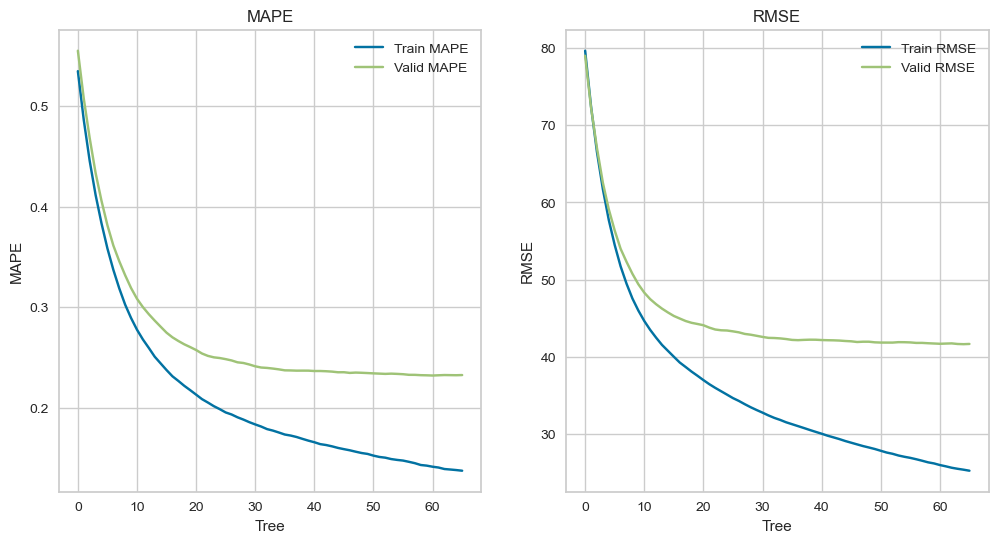

In [770]:
vizual_train_model(model_lgbmr_split_genre.evals_result_['training'], model_lgbmr_split_genre.evals_result_['valid_1'])

#### Get distribution of absolute errors

In [1123]:
distr_abs_err_lgbmr_split_genre = pd.DataFrame(np.absolute(model_lgbmr_split_genre.predict(X_valid_genr_split) - y_valid_genr_split)).rename(columns = {'gross': 'lightgbm_split_genre'})

In [1125]:
distr_abs_err_lgbmr_split_genre = distr_abs_err_lgbmr_split_genre.reset_index()

In [1127]:
distr_abs_err_lgbmr_split_genre

index  lightgbm_split_genre
0     1076             26.379399
1      358            225.062813
2     2408             68.882001
3     4074             29.645184
4     2998              7.293567
..     ...                   ...
789   3247             31.806375
790   1175              4.456781
791    588             69.814620
792   3145             44.161282
793   3339             26.979965

[794 rows x 2 columns]

In [1129]:
distr_abs_err_lgbmr_split_genre.to_csv('distr_abs_err_lgbmr_split_genre.csv')

#### Check stability of the model using random state

##### Preparing parametres of the model

In [773]:
param_lgbm_split_genre = model_lgbmr_split_genre.get_params()

In [774]:
param_lgbm_split_genre

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.15,
 'max_depth': -1,
 'min_child_samples': 9,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 77,
 'n_jobs': None,
 'num_leaves': 27,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [775]:
param_lgbm_split_genre.pop('random_state')

42

##### stability of the model on each random_state

In [777]:
df_rand_st_metric_lgbm_split_genre = metrics_diff_random_state(LGBMRegressor, param_model = param_lgbm_split_genre)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2505
[LightGBM] [Info] Number of data points in the train set: 1587, number of used features: 41
[LightGBM] [Info] Start training from score 216.317441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2505
[LightGBM] [Info] Number of data points in the train set: 1588, number of used features: 41
[LightGBM] [Info] Start training from score 219.416754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2505
[LightGBM] [Info] Number of data points in the train set: 1588, number of used features: 41
[LightGBM] [Info] Start tr

In [778]:
df_rand_st_metric_lgbm_split_genre

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  42.142541  2.014618   0.232182  0.015309         0.003915   
1            115  42.215782  0.858600   0.230339  0.005456         0.004044   
2             26  42.432337  1.244738   0.232063  0.013304         0.003955   
3            760  42.355058  1.363850   0.234254  0.007618         0.003915   
4            282  42.705137  0.863249   0.235215  0.010579         0.004231   
..           ...        ...       ...        ...       ...              ...   
95           167  42.269981  0.480384   0.233956  0.011096         0.004522   
96           380  42.712650  1.717093   0.236395  0.013518         0.004381   
97           364  42.702237  1.024934   0.235331  0.013895         0.004803   
98           215  42.685904  1.384477   0.236746  0.008421         0.004378   
99           687  42.748166  0.483065   0.234149  0.011699         0.004639   

    score_time_std  
0         0.000091  
1         0.000144  
2         0.000074  
3         0.000094  
4         0.000097  
..             ...  
95        0.000147  
96        0.000116  
97        0.000569  
98        0.000132  
99        0.000102  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [780]:
lgbm_split_genre_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_lgbm_split_genre)

In [781]:
lgbm_split_genre_final_analize_dic

{'rmse_mean': 42.54387514927894,
 'rmse_std': 0.23443569795205163,
 'mape_mean': 0.23489851601789688,
 'mape_std': 0.0017623238905873995,
 'score_time_mean': 0.0044334416389465335,
 'score_time_std': 0.00014281738409698365}

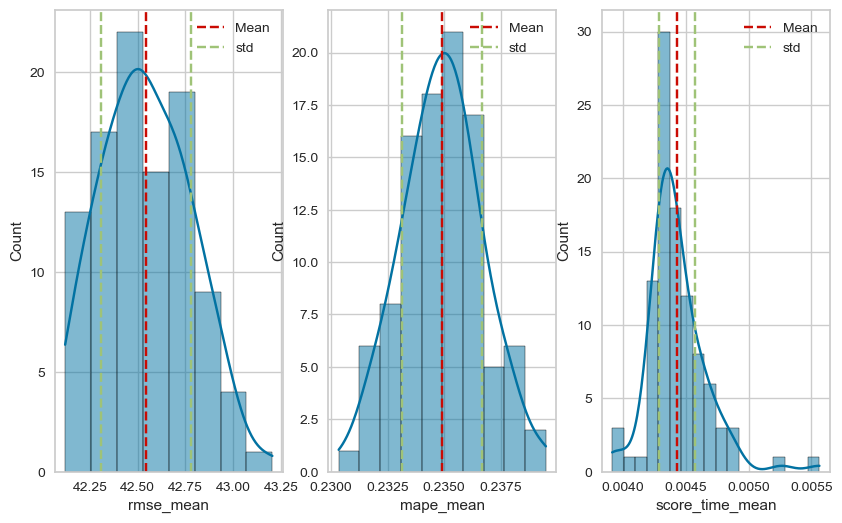

In [782]:
visializ_final_anal_model(df_rand_st_metric_lgbm_split_genre, lgbm_split_genre_final_analize_dic)

#### Save the model

In [1058]:
joblib.dump(model_lgbmr_split_genre, 'model_lgbmr_split_genre.pkl')

['model_lgbmr_split_genre.pkl']

### Gradient Boosting

In [784]:
space_gradient_boosting = {
    'min_samples_leaf': 7,   
    'max_leaf_nodes': 10, 
    'n_estimators': hp.quniform('n_estimators', 79, 87, 1),
    'learning_rate': hp.loguniform('learning_rate', -1.34707, -1.30933),
}

In [785]:
dict_tun_hyper = tune_hyperpar_anneal(GradientBoostingRegressor, space_gradient_boosting, X_train_genr_split, y_train_genr_split, ['min_samples_leaf', 'max_leaf_nodes', 'n_estimators'])

100%|███████| 150/150 [01:07<00:00,  2.24trial/s, best loss: 44.039016362116186]


In [786]:
best_grad_boost_split_genre = dict_tun_hyper['best']
best_grad_boost_split_genre

{'learning_rate': 0.2655482646602878, 'n_estimators': 84.0}

In [787]:
trials_grad_boost_split_genre = dict_tun_hyper['trials']

#### How hyperparameters are set

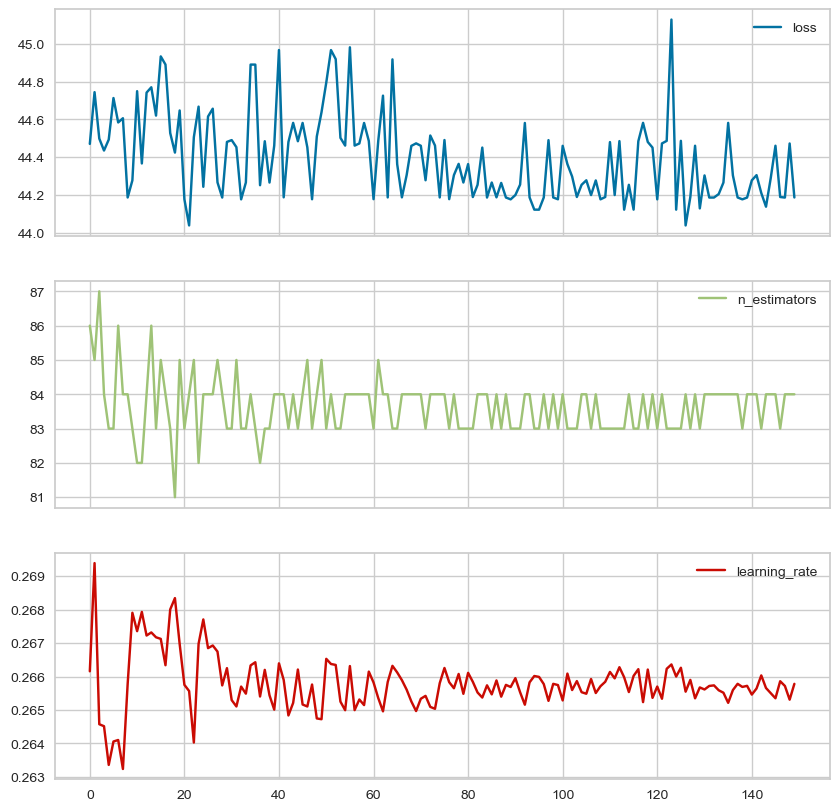

In [789]:
visual_tune_hyperpar(['n_estimators', 'learning_rate'], trials_grad_boost_split_genre)

#### Fit the model

In [791]:
model_grad_boost_split_genre = GradientBoostingRegressor(random_state=random_state, min_samples_leaf = 7, max_leaf_nodes = 10, n_estimators = 84, learning_rate = 0.26522, n_iter_no_change = 5)

In [792]:
model_grad_boost_split_genre.fit(
    X_train_genr_split, 
    y_train_genr_split)

GradientBoostingRegressor(learning_rate=0.26522, max_leaf_nodes=10,
                          min_samples_leaf=7, n_estimators=84,
                          n_iter_no_change=5, random_state=42)

In [793]:
grad_boost_split_genre_rmse = root_mean_squared_error(y_valid_genr_split, model_grad_boost_split_genre.predict(X_valid_genr_split))

In [794]:
grad_boost_split_genre_rmse

42.69050719081495

In [795]:
grad_boost_split_genre_mape = mean_absolute_percentage_error(y_valid_genr_split, model_grad_boost_split_genre.predict(X_valid_genr_split))

In [796]:
grad_boost_split_genre_mape

0.24591452804604866

In [797]:
model_grad_boost_split_genre.n_estimators_

73

In [798]:
train_errors = {'rmse':[], 'mape': []}
valid_errors = {'rmse':[], 'mape': []}

for y_pred in model_grad_boost_split_genre.staged_predict(X_train_genr_split):
    train_errors['rmse'].append(root_mean_squared_error(y_train_genr_split, y_pred))
    train_errors['mape'].append(mean_absolute_percentage_error(y_train_genr_split, y_pred))
    
for y_pred in model_grad_boost_split_genre.staged_predict(X_valid_genr_split):
    valid_errors['rmse'].append(root_mean_squared_error(y_valid_genr_split, y_pred))
    valid_errors['mape'].append(mean_absolute_percentage_error(y_valid_genr_split, y_pred))

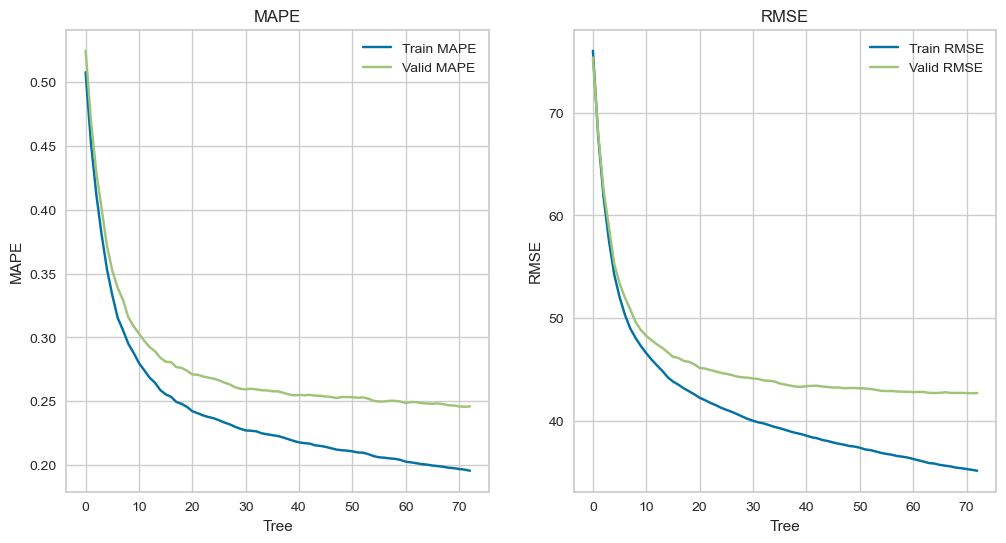

In [799]:
vizual_train_model(train_errors, valid_errors)

#### Get distribution of absolute errors

In [1141]:
distr_abs_err_grad_boost_split_genre = pd.DataFrame(np.absolute(model_grad_boost_split_genre.predict(X_valid_genr_split) - y_valid_genr_split)).rename(columns = {'gross': 'grad_boost_split_genre'})

In [1143]:
distr_abs_err_grad_boost_split_genre = distr_abs_err_grad_boost_split_genre.reset_index()

In [1145]:
distr_abs_err_grad_boost_split_genre

index  grad_boost_split_genre
0     1076               20.111866
1      358              220.917901
2     2408               46.561171
3     4074               21.113821
4     2998               16.555391
..     ...                     ...
789   3247               22.395257
790   1175                0.944078
791    588               72.785111
792   3145               86.829504
793   3339               29.493044

[794 rows x 2 columns]

In [1147]:
distr_abs_err_grad_boost_split_genre.to_csv('distr_abs_err_grad_boost_split_genre.csv')

#### Check stability of the model using random state

##### Preparing parametres of the model

In [802]:
param_grad_boost_split_genre = model_grad_boost_split_genre.get_params()

In [803]:
param_grad_boost_split_genre

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.26522,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 84,
 'n_iter_no_change': 5,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [804]:
param_grad_boost_split_genre.pop('random_state')

42

##### stability of the model on each random_state

In [806]:
df_rand_st_metric_grad_boost_split_genre = metrics_diff_random_state(GradientBoostingRegressor, param_model = param_grad_boost_split_genre)

In [807]:
df_rand_st_metric_grad_boost_split_genre

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  43.354459  2.066737   0.245475  0.017939         0.003978   
1            115  43.699599  0.702101   0.246859  0.007803         0.003396   
2             26  44.172711  1.096325   0.251605  0.020157         0.003096   
3            760  43.516130  1.622687   0.248037  0.008812         0.003486   
4            282  43.763397  1.358063   0.248002  0.017667         0.003771   
..           ...        ...       ...        ...       ...              ...   
95           167  43.478405  0.982916   0.245271  0.016340         0.003081   
96           380  43.826073  1.493826   0.246922  0.014694         0.003650   
97           364  44.047429  0.625691   0.248980  0.008935         0.003202   
98           215  43.691252  1.940635   0.247242  0.010500         0.003141   
99           687  43.504627  0.402927   0.241762  0.014508         0.003335   

    score_time_std  
0         0.000483  
1         0.000417  
2         0.000189  
3         0.000076  
4         0.000375  
..             ...  
95        0.000056  
96        0.000337  
97        0.000374  
98        0.000304  
99        0.000245  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [809]:
grad_boost_split_genre_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_grad_boost_split_genre)

In [810]:
grad_boost_split_genre_final_analize_dic

{'rmse_mean': 43.69133550584531,
 'rmse_std': 0.28554254067162,
 'mape_mean': 0.24684487858904444,
 'mape_std': 0.002575984185884535,
 'score_time_mean': 0.0038061079978942863,
 'score_time_std': 0.00047279948224453975}

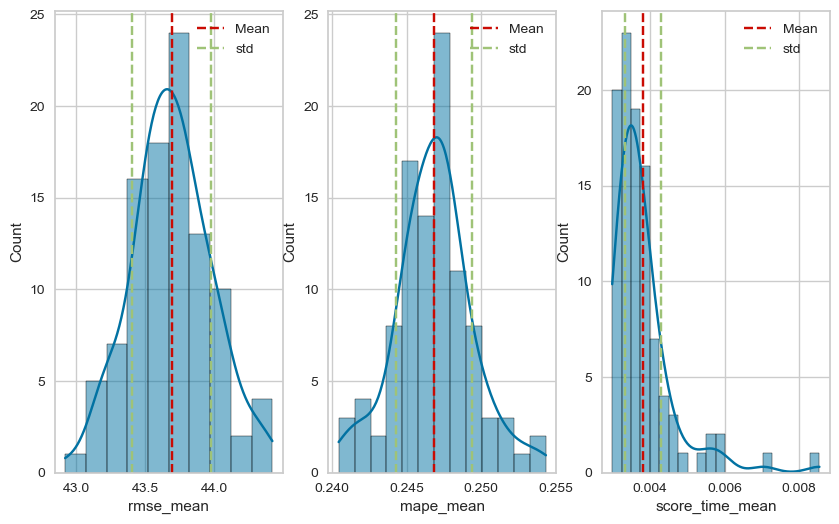

In [811]:
visializ_final_anal_model(df_rand_st_metric_grad_boost_split_genre, grad_boost_split_genre_final_analize_dic)

### Polinomial regression

In [815]:
space = {
    'degree': hp.quniform('degree', 2, 3, 1),   
    'alpha': hp.loguniform('alpha', np.log(0.0001), np.log(2))
}

In [817]:
dict_tun_hyper = tune_hyperpar_anneal(Ridge, space, X_train_genr_split, y_train_genr_split, ['degree'], pipeline_bool = True)

100%|████████| 150/150 [03:58<00:00,  1.59s/trial, best loss: 96.15556482970646]


In [819]:
best_polyn_reg_split_genre = dict_tun_hyper['best']
best_polyn_reg_split_genre

{'alpha': 1.9517274814669872, 'degree': 3.0}

In [821]:
trials_polyn_reg_split_genre = dict_tun_hyper['trials']

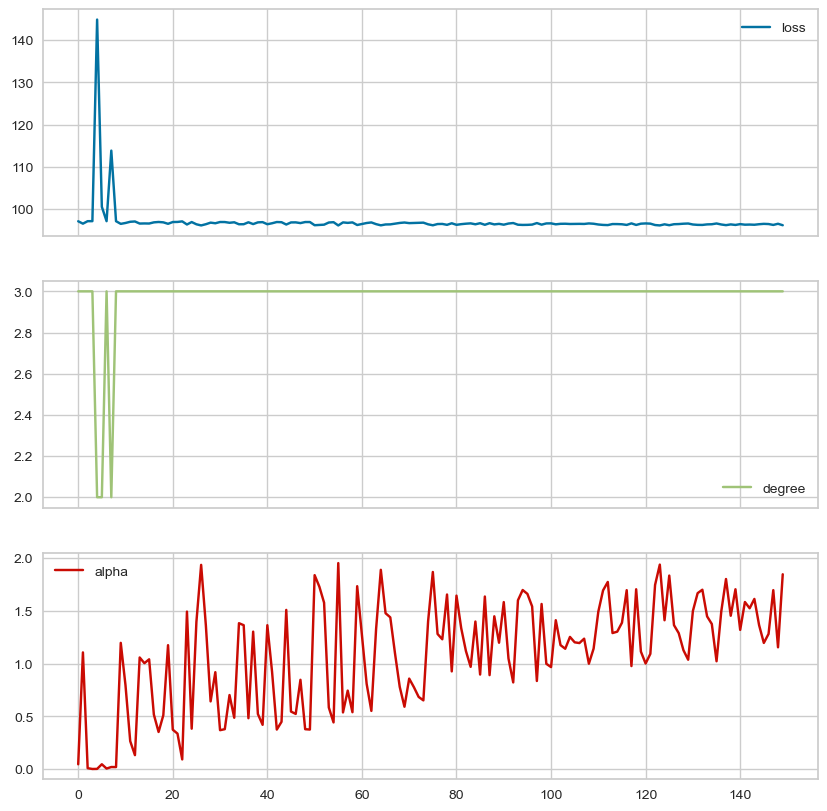

In [823]:
visual_tune_hyperpar(['degree', 'alpha'], trials_polyn_reg_split_genre)

#### fit the model

In [825]:
model_pol_reg_split_genre = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha = 100))

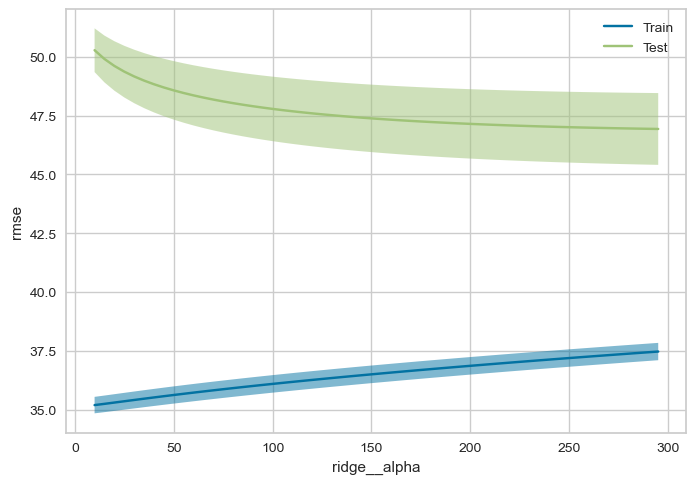

In [827]:
ValidationCurveDisplay.from_estimator(model_pol_reg_split_genre, 
                                      X = df_film_genr_split.drop('gross', axis = 1), 
                                      y = df_film_genr_split['gross'], 
                                      param_name='ridge__alpha', 
                                      param_range = np.arange(10, 300, 5), 
                                      scoring = 'neg_root_mean_squared_error', 
                                      score_name = 'rmse', 
                                      cv = KFold(n_splits=5, random_state=42, shuffle = True),
                                      negate_score = True)

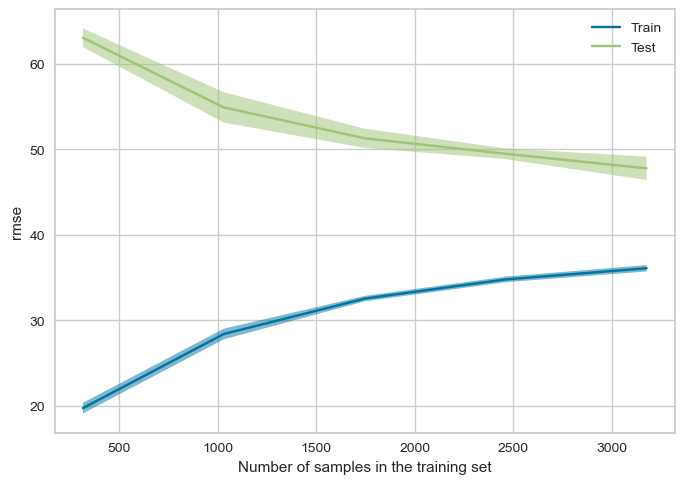

In [829]:
LearningCurveDisplay.from_estimator(model_pol_reg_split_genre, X = df_film_genr_split.drop('gross', axis = 1), 
                                    y = df_film_genr_split['gross'], scoring = 'neg_root_mean_squared_error', 
                                    score_name = 'rmse', cv = KFold(n_splits=5, random_state=42, shuffle = True), random_state=42, shuffle = True, negate_score = True)

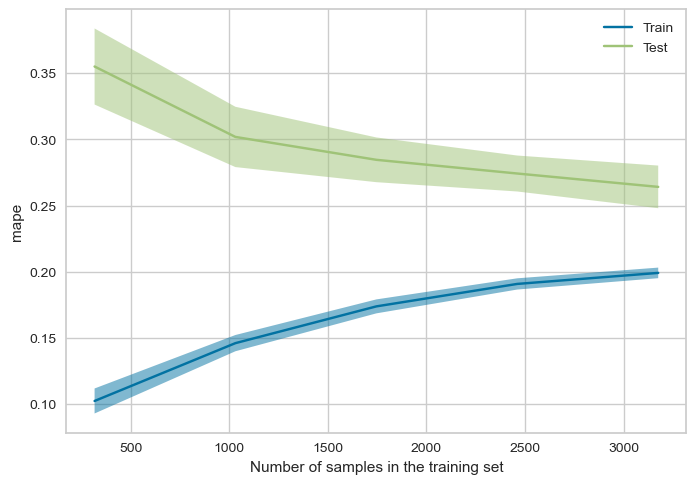

In [831]:
LearningCurveDisplay.from_estimator(model_pol_reg_split_genre, X = df_film_genr_split.drop('gross', axis = 1), 
                                    y = df_film_genr_split['gross'], scoring = 'neg_mean_absolute_percentage_error', 
                                    score_name = 'mape', cv = KFold(n_splits=5, random_state=42, shuffle = True), random_state=42, shuffle = True, negate_score = True)

In [833]:
model_pol_reg_split_genre.fit(X_train_genr_split, y_train_genr_split)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=100))])

In [835]:
root_mean_squared_error(y_valid_genr_split, model_pol_reg_split_genre.predict(X_valid_genr_split))

47.22688756071394

In [837]:
mean_absolute_percentage_error(y_valid_genr_split, model_pol_reg_split_genre.predict(X_valid_genr_split))

0.2654780446876978

#### Get distribution of absolute errors

In [1155]:
distr_abs_err_pol_reg_split_genre = pd.DataFrame(np.absolute(model_pol_reg_split_genre.predict(X_valid_genr_split) - y_valid_genr_split)).rename(columns = {'gross': 'pol_reg_split_genre'})

In [1157]:
distr_abs_err_pol_reg_split_genre = distr_abs_err_pol_reg_split_genre.reset_index()

In [1159]:
distr_abs_err_pol_reg_split_genre

index  pol_reg_split_genre
0     1076            36.659984
1      358           231.701436
2     2408            61.992676
3     4074            48.041729
4     2998            25.768744
..     ...                  ...
789   3247            40.848643
790   1175             8.537494
791    588            19.064982
792   3145            37.092708
793   3339            10.922561

[794 rows x 2 columns]

In [1161]:
distr_abs_err_pol_reg_split_genre.to_csv('distr_abs_err_pol_reg_split_genre.csv')

#### Check stability of the model using random state

##### stability of the model on each random_state

In [841]:
df_rand_st_metric_pol_reg_split_genre = metrics_diff_random_state(name_model = model_pol_reg_split_genre, pipeline_bool = True)

In [843]:
df_rand_st_metric_pol_reg_split_genre

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  47.694800  2.394332   0.263189  0.022105         0.008860   
1            115  47.840794  1.707889   0.265059  0.009365         0.006814   
2             26  48.013970  1.990644   0.266664  0.022851         0.006727   
3            760  47.768408  2.161285   0.264650  0.009447         0.006610   
4            282  47.987911  1.030561   0.265268  0.014246         0.006196   
..           ...        ...       ...        ...       ...              ...   
95           167  47.663546  0.886757   0.262878  0.010760         0.007036   
96           380  47.962401  1.169497   0.267836  0.013714         0.007673   
97           364  47.996238  1.335198   0.268199  0.016732         0.007270   
98           215  47.381643  0.766893   0.262084  0.009940         0.007272   
99           687  47.493175  1.114940   0.263591  0.021665         0.007162   

    score_time_std  
0         0.001061  
1         0.000968  
2         0.001487  
3         0.001203  
4         0.000810  
..             ...  
95        0.000189  
96        0.000863  
97        0.000377  
98        0.000443  
99        0.000231  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [846]:
pol_reg_split_genre_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_pol_reg_split_genre)

In [848]:
pol_reg_split_genre_final_analize_dic

{'rmse_mean': 47.92038795760799,
 'rmse_std': 0.36499763978162436,
 'mape_mean': 0.26595475870899177,
 'mape_std': 0.002287095458215985,
 'score_time_mean': 0.007478902339935301,
 'score_time_std': 0.0005420090959550763}

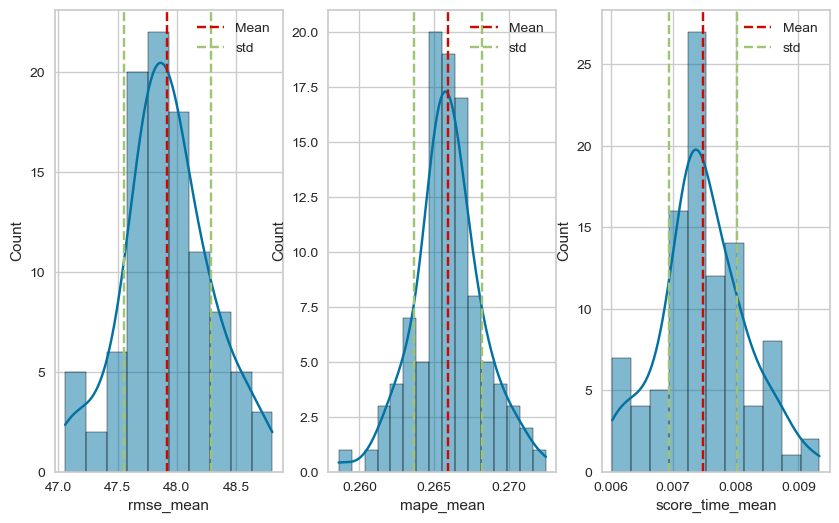

In [850]:
visializ_final_anal_model(df_rand_st_metric_pol_reg_split_genre, pol_reg_split_genre_final_analize_dic)

### Analyze the result of models (random state is different)

In [853]:
split_genre_all_model_dic = {'XGBoost': xgb_split_genre_final_analize_dic, 'LightGBM': lgbm_split_genre_final_analize_dic, 'Gradient_Boosting': grad_boost_split_genre_final_analize_dic, 'Polynomial_regression ': pol_reg_split_genre_final_analize_dic}

In [855]:
split_genre_all_model_dic

{'XGBoost': {'rmse_mean': 42.841299181096694,
  'rmse_std': 0.21382231559211157,
  'mape_mean': 0.24006889115299887,
  'mape_std': 0.0014934743432868946,
  'score_time_mean': 0.01658607578277588,
  'score_time_std': 0.0030271332724590293},
 'LightGBM': {'rmse_mean': 42.54387514927894,
  'rmse_std': 0.23443569795205163,
  'mape_mean': 0.23489851601789688,
  'mape_std': 0.0017623238905873995,
  'score_time_mean': 0.0044334416389465335,
  'score_time_std': 0.00014281738409698365},
 'Gradient_Boosting': {'rmse_mean': 43.69133550584531,
  'rmse_std': 0.28554254067162,
  'mape_mean': 0.24684487858904444,
  'mape_std': 0.002575984185884535,
  'score_time_mean': 0.0038061079978942863,
  'score_time_std': 0.00047279948224453975},
 'Polynomial_regression ': {'rmse_mean': 47.92038795760799,
  'rmse_std': 0.36499763978162436,
  'mape_mean': 0.26595475870899177,
  'mape_std': 0.002287095458215985,
  'score_time_mean': 0.007478902339935301,
  'score_time_std': 0.0005420090959550763}}

In [857]:
split_genre_all_model_df = pd.DataFrame.from_dict(split_genre_all_model_dic, orient='index')

In [859]:
split_genre_all_model_df

rmse_mean  rmse_std  mape_mean  mape_std  \
XGBoost                 42.841299  0.213822   0.240069  0.001493   
LightGBM                42.543875  0.234436   0.234899  0.001762   
Gradient_Boosting       43.691336  0.285543   0.246845  0.002576   
Polynomial_regression   47.920388  0.364998   0.265955  0.002287   

                        score_time_mean  score_time_std  
XGBoost                        0.016586        0.003027  
LightGBM                       0.004433        0.000143  
Gradient_Boosting              0.003806        0.000473  
Polynomial_regression          0.007479        0.000542

In [861]:
split_genre_all_model_df.index = pd.MultiIndex.from_product([['Split_genres'], split_genre_all_model_df.index], names=['DataFrame', 'Model'])

In [863]:
split_genre_all_model_df

rmse_mean  rmse_std  mape_mean  mape_std  \
DataFrame    Model                                                              
Split_genres XGBoost                 42.841299  0.213822   0.240069  0.001493   
             LightGBM                42.543875  0.234436   0.234899  0.001762   
             Gradient_Boosting       43.691336  0.285543   0.246845  0.002576   
             Polynomial_regression   47.920388  0.364998   0.265955  0.002287   

                                     score_time_mean  score_time_std  
DataFrame    Model                                                    
Split_genres XGBoost                        0.016586        0.003027  
             LightGBM                       0.004433        0.000143  
             Gradient_Boosting              0.003806        0.000473  
             Polynomial_regression          0.007479        0.000542

In [865]:
split_genre_all_model_df.to_csv('split_genre_all_model.csv')

## Cluster of genres and  pca likes

In [868]:
X_train_genr_cluster_pca_like, X_valid_genr_cluster_pca_like, y_train_genr_cluster_pca_like, y_valid_genr_cluster_pca_like = train_test_split(df_film_genr_cluster_pca_like.drop('gross', axis = 1), df_film_genr_cluster_pca_like['gross'], test_size=0.2, random_state=44)

#### check how dataset is splitted

<Axes: xlabel='gross', ylabel='Count'>

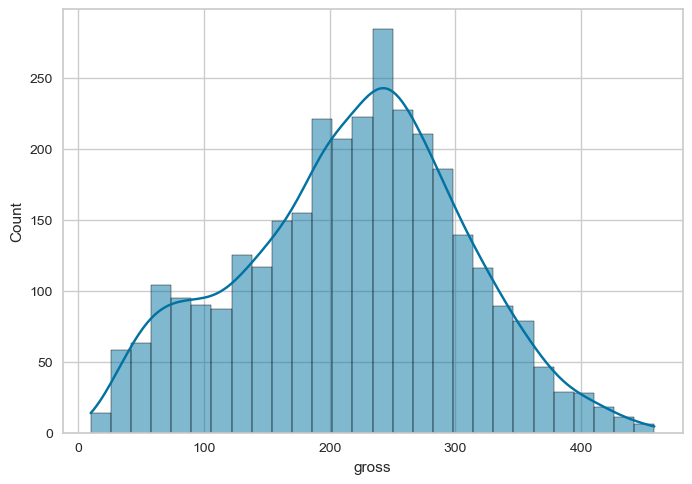

In [871]:
sns.histplot(y_train_genr_cluster_pca_like, kde = True)

<Axes: xlabel='gross', ylabel='Count'>

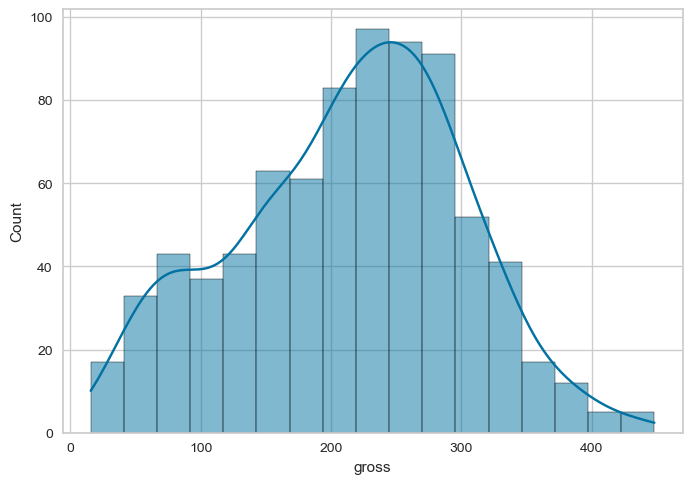

In [873]:
sns.histplot(y_valid_genr_cluster_pca_like, kde = True)

### XGBOOST

In [875]:
space={'n_estimators': hp.quniform('n_estimators', 45, 80, 1),
       'max_depth' : hp.quniform('max_depth', 2, 5, 1),
       'learning_rate': hp.loguniform('learning_rate', -1.2029, -1.0788)
      }

In [877]:
dict_tun_hyper = tune_hyperpar_anneal(XGBRegressor, space, X_train_genr_cluster_pca_like, y_train_genr_cluster_pca_like, ['max_depth', 'n_estimators'])

100%|████████| 150/150 [00:08<00:00, 17.83trial/s, best loss: 46.71414420139859]


In [879]:
best = dict_tun_hyper['best']

In [881]:
best

{'learning_rate': 0.31354821940747873, 'max_depth': 3.0, 'n_estimators': 66.0}

In [883]:
trials = dict_tun_hyper['trials']

#### How the hyperparametres are set

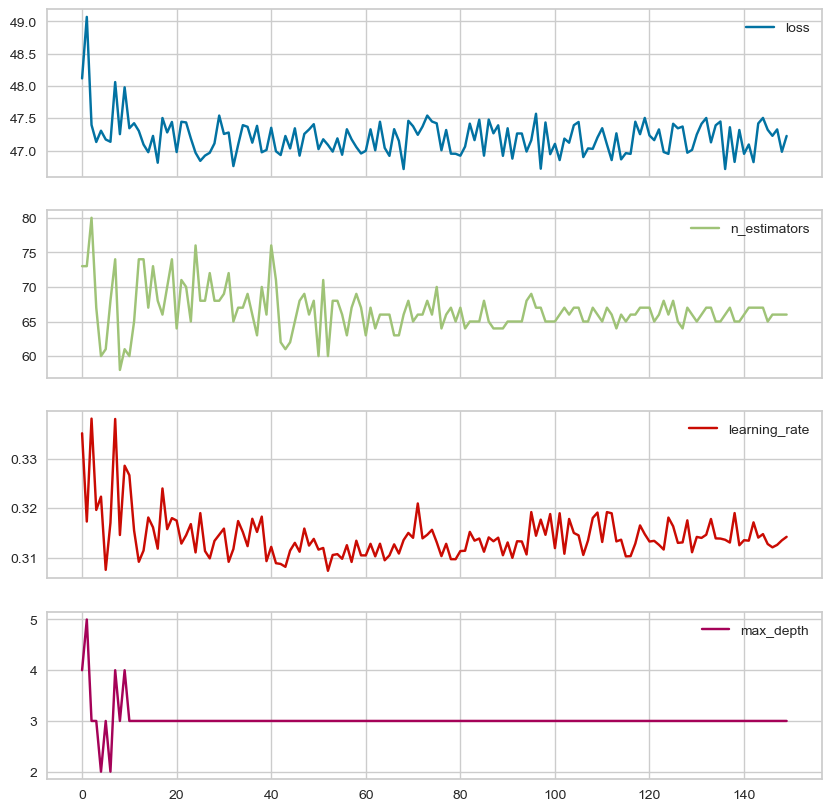

In [886]:
visual_tune_hyperpar(['n_estimators','learning_rate', 'max_depth'], trials)

#### Fit the model

In [888]:
model_xgb_genr_cluster_pca_like = XGBRegressor(random_state=random_state, max_depth = 3, n_estimators =56, learning_rate = 0.320999809, eval_metric=['mape', 'rmse'], early_stopping_rounds = 5)

In [890]:
model_xgb_genr_cluster_pca_like.fit(
    X_train_genr_cluster_pca_like, 
    y_train_genr_cluster_pca_like, eval_set=[(X_train_genr_cluster_pca_like, y_train_genr_cluster_pca_like), (X_valid_genr_cluster_pca_like, y_valid_genr_cluster_pca_like)])

[0]	validation_0-mape:0.49513	validation_0-rmse:73.61279	validation_1-mape:0.50959	validation_1-rmse:73.13421
[1]	validation_0-mape:0.43141	validation_0-rmse:64.13844	validation_1-mape:0.44625	validation_1-rmse:64.60838
[2]	validation_0-mape:0.38901	validation_0-rmse:58.52396	validation_1-mape:0.40136	validation_1-rmse:59.32527
[3]	validation_0-mape:0.35531	validation_0-rmse:54.75211	validation_1-mape:0.36604	validation_1-rmse:55.63212
[4]	validation_0-mape:0.33107	validation_0-rmse:51.90586	validation_1-mape:0.34063	validation_1-rmse:52.61838
[5]	validation_0-mape:0.31203	validation_0-rmse:50.01095	validation_1-mape:0.32604	validation_1-rmse:51.19835
[6]	validation_0-mape:0.29873	validation_0-rmse:48.67432	validation_1-mape:0.31467	validation_1-rmse:50.29620
[7]	validation_0-mape:0.28733	validation_0-rmse:47.59808	validation_1-mape:0.30410	validation_1-rmse:49.43978
[8]	validation_0-mape:0.27618	validation_0-rmse:46.65650	validation_1-mape:0.29262	validation_1-rmse:48.48369
[9]	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=['mape', 'rmse'],
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.320999809, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=56,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [892]:
model_xgb_genr_cluster_pca_like.best_iteration

55

In [894]:
root_mean_squared_error(y_valid_genr_cluster_pca_like, model_xgb_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

43.998108334420614

In [896]:
mean_absolute_percentage_error(y_valid_genr_cluster_pca_like, model_xgb_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

0.25448848928026097

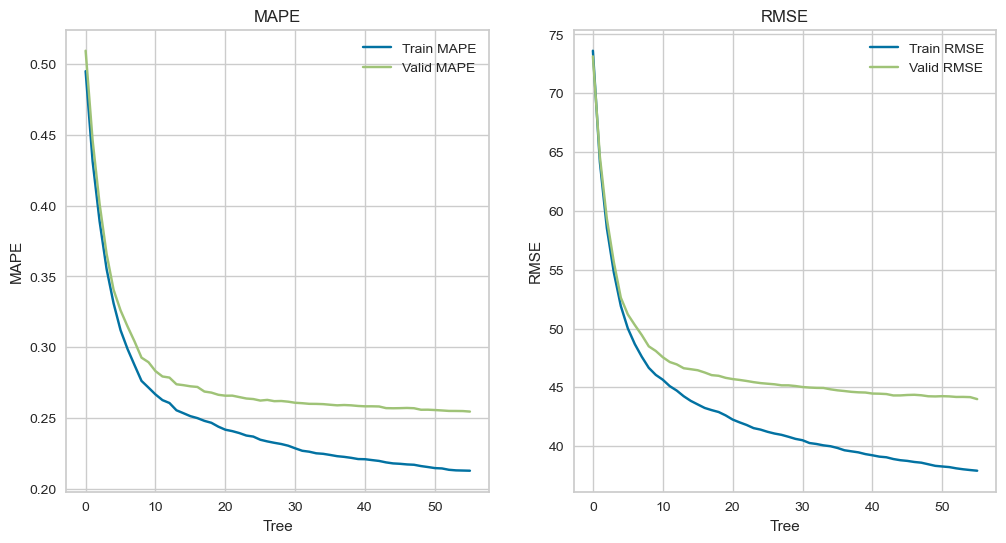

In [898]:
vizual_train_model(model_xgb_genr_cluster_pca_like.evals_result()['validation_0'], model_xgb_genr_cluster_pca_like.evals_result()['validation_1'])

#### Get distribution of absolute errors

In [1204]:
distr_abs_err_xgb_genr_cluster_pca_like = pd.DataFrame(np.absolute(model_xgb_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like) - y_valid_genr_cluster_pca_like)).rename(columns = {'gross': 'xgboost_genr_cluster_pca_like'})

In [1206]:
distr_abs_err_xgb_genr_cluster_pca_like = distr_abs_err_xgb_genr_cluster_pca_like.reset_index()

In [1208]:
distr_abs_err_xgb_genr_cluster_pca_like

index  xgboost_genr_cluster_pca_like
0     1076                      29.269166
1      358                     216.081831
2     2408                      63.478696
3     4074                      29.774198
4     2998                       8.715769
..     ...                            ...
789   3247                      22.298296
790   1175                      28.068163
791    588                      62.887943
792   3145                      71.147575
793   3339                      15.910307

[794 rows x 2 columns]

In [1210]:
distr_abs_err_xgb_genr_cluster_pca_like.to_csv('distr_abs_err_xgb_genr_cluster_pca_like.csv')

#### Check stability of the model using random state 

##### preparing the parametres of the model

In [902]:
param_xgb_split_genr_cluster_pca_like = model_xgb_genr_cluster_pca_like.get_xgb_params()

In [904]:
param_xgb_split_genr_cluster_pca_like.pop('random_state')

42

In [906]:
param_xgb_split_genr_cluster_pca_like['n_estimators'] = model_xgb_genr_cluster_pca_like.n_estimators

In [908]:
param_xgb_split_genr_cluster_pca_like

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': ['mape', 'rmse'],
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.320999809,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'n_estimators': 56}

##### stability of the model on each random_state

In [911]:
df_rand_st_metric_xgboost_genr_cluster_pca_like = metrics_diff_random_state(XGBRegressor, param_model = param_xgb_split_genr_cluster_pca_like)

In [913]:
df_rand_st_metric_xgboost_genr_cluster_pca_like

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  43.551961  2.126137   0.246652  0.019018         0.010471   
1            115  43.578010  0.563491   0.243748  0.005048         0.013064   
2             26  43.229938  0.750346   0.242984  0.014617         0.011082   
3            760  43.565610  1.469410   0.245029  0.009061         0.011006   
4            282  43.560639  1.015191   0.243570  0.015920         0.011744   
..           ...        ...       ...        ...       ...              ...   
95           167  43.290765  0.352723   0.241791  0.012432         0.012049   
96           380  43.683118  1.550692   0.246077  0.014070         0.011723   
97           364  43.284720  1.024048   0.241938  0.011641         0.012721   
98           215  43.370839  1.303224   0.243834  0.007586         0.012291   
99           687  43.434443  0.997054   0.243392  0.016835         0.014258   

    score_time_std  
0         0.000418  
1         0.002089  
2         0.000754  
3         0.001002  
4         0.001644  
..             ...  
95        0.000645  
96        0.000029  
97        0.001141  
98        0.001042  
99        0.003170  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [916]:
xgb_genr_cluster_pca_like_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_xgboost_genr_cluster_pca_like)

In [918]:
xgb_genr_cluster_pca_like_final_analize_dic

{'rmse_mean': 43.49852483837361,
 'rmse_std': 0.20738269785112298,
 'mape_mean': 0.24391808599353965,
 'mape_std': 0.0016986160251112594,
 'score_time_mean': 0.012025870323181151,
 'score_time_std': 0.0007604545630923004}

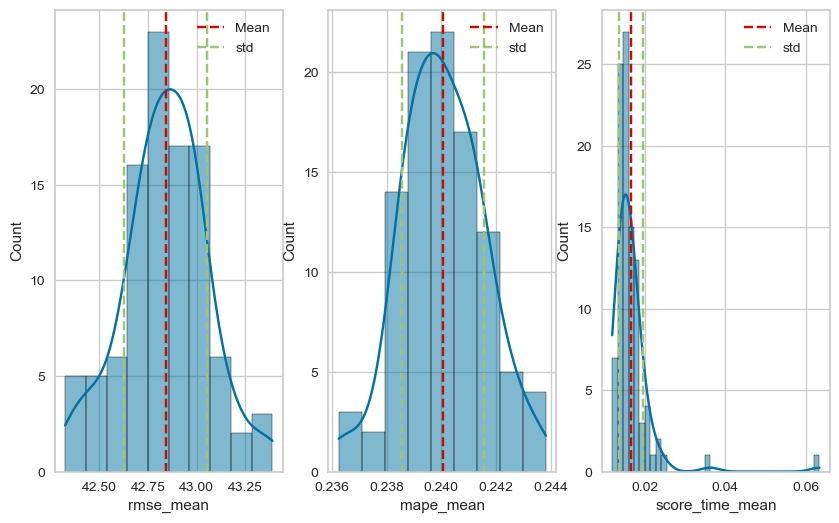

In [920]:
visializ_final_anal_model(df_rand_st_metric_xgboost_split_genre, xgb_split_genre_final_analize_dic)

### LightGBM

In [922]:
space_lgbm = {
    'num_leaves': 35,
    'min_child_samples': 8,
    'learning_rate': hp.loguniform('learning_rate', -2.2349, -1.83258),
    'n_estimators': hp.quniform('n_estimators', 30, 60, 1)
}

In [924]:
dict_tun_hyper = tune_hyperpar_anneal(LGBMRegressor, space_lgbm, X_train_genr_cluster_pca_like, y_train_genr_cluster_pca_like, ['n_estimators'])

100%|████████| 150/150 [00:15<00:00,  9.98trial/s, best loss: 46.17620811252331]


In [926]:
best_lgbm_genr_cluster_pca_like= dict_tun_hyper['best']
best_lgbm_genr_cluster_pca_like

{'learning_rate': 0.13158367818115874, 'n_estimators': 51.0}

In [928]:
trials_lgbm_genr_cluster_pca_like = dict_tun_hyper['trials']

#### How hyperparameters are set

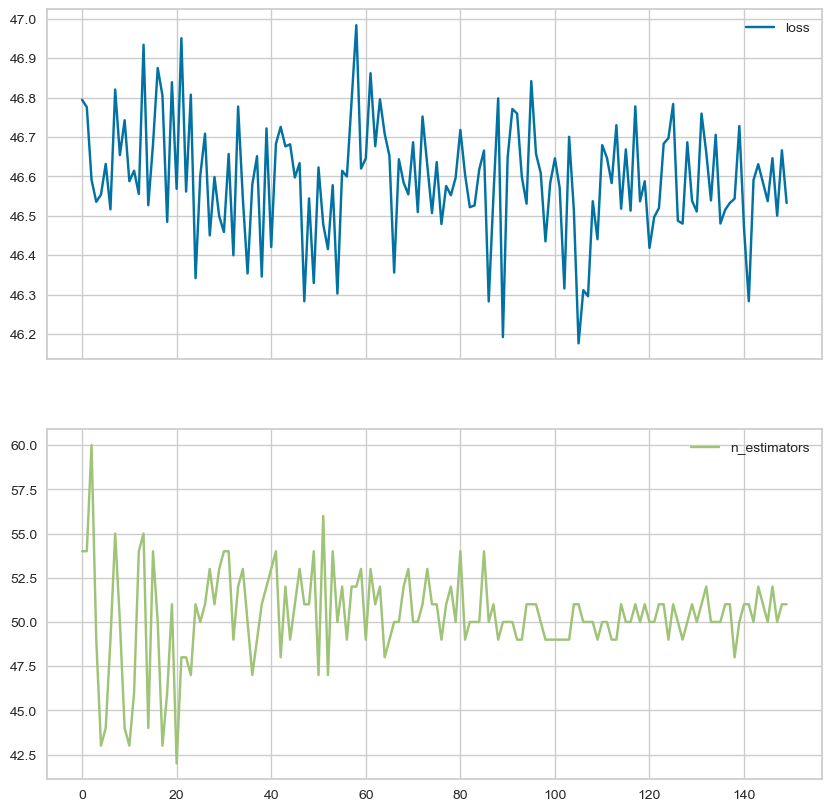

In [933]:
visual_tune_hyperpar(['n_estimators'], trials_lgbm_genr_cluster_pca_like)

#### Fit ther model

In [935]:
model_lgbmr_genr_cluster_pca_like = LGBMRegressor(random_state=random_state, num_leaves = 35, min_child_samples = 8, learning_rate = 0.107, n_estimators = 50)

In [937]:
model_lgbmr_genr_cluster_pca_like.fit(
    X_train_genr_cluster_pca_like, 
    y_train_genr_cluster_pca_like,eval_set=[(X_train_genr_cluster_pca_like, y_train_genr_cluster_pca_like), (X_valid_genr_cluster_pca_like, y_valid_genr_cluster_pca_like)], eval_metric=['mape', 'rmse'], callbacks=[early_stopping(stopping_rounds=5)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1944
[LightGBM] [Info] Number of data points in the train set: 3175, number of used features: 21
[LightGBM] [Info] Start training from score 217.867585
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[50]	training's mape: 0.169859	training's rmse: 30.48	training's l2: 929.031	valid_1's mape: 0.250086	valid_1's rmse: 44.0238	valid_1's l2: 1938.1


LGBMRegressor(learning_rate=0.107, min_child_samples=8, n_estimators=50,
              num_leaves=35, random_state=42)

In [939]:
model_lgbmr_genr_cluster_pca_like.best_iteration_

50

In [941]:
root_mean_squared_error(y_valid_genr_cluster_pca_like, model_lgbmr_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

44.023821858112605

In [943]:
mean_absolute_percentage_error(y_valid_genr_cluster_pca_like, model_lgbmr_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

0.25008550688679115

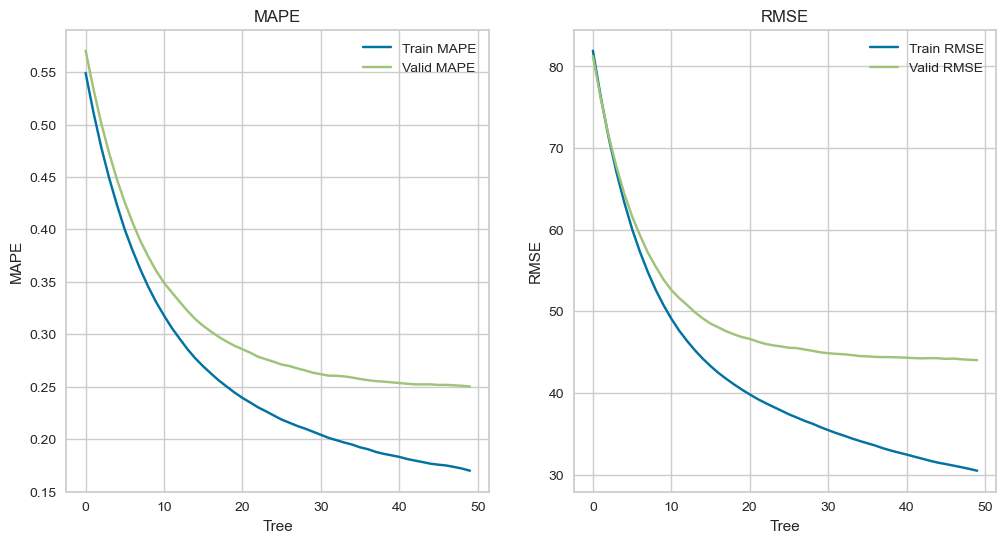

In [945]:
vizual_train_model(model_lgbmr_genr_cluster_pca_like.evals_result_['training'], model_lgbmr_genr_cluster_pca_like.evals_result_['valid_1'])

#### Get distribution of absolute errors

In [1212]:
distr_abs_err_lgbm_genr_cluster_pca_like = pd.DataFrame(np.absolute(model_lgbmr_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like) - y_valid_genr_cluster_pca_like)).rename(columns = {'gross': 'lightgbm_genr_cluster_pca_like'})

In [1214]:
distr_abs_err_lgbm_genr_cluster_pca_like = distr_abs_err_lgbm_genr_cluster_pca_like.reset_index()

In [1216]:
distr_abs_err_lgbm_genr_cluster_pca_like

index  lightgbm_genr_cluster_pca_like
0     1076                       13.580030
1      358                      227.818483
2     2408                       33.195337
3     4074                       19.152611
4     2998                        6.726151
..     ...                             ...
789   3247                       35.730286
790   1175                        8.094714
791    588                       70.576332
792   3145                       53.691203
793   3339                        4.812486

[794 rows x 2 columns]

In [1218]:
distr_abs_err_lgbm_genr_cluster_pca_like.to_csv('distr_abs_err_lgbm_genr_cluster_pca_like.csv')

#### Check stability of the model using random state

##### Preparing parametres of the model

In [949]:
param_lgbm_genr_cluster_pca_like = model_lgbmr_genr_cluster_pca_like.get_params()

In [951]:
param_lgbm_genr_cluster_pca_like

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.107,
 'max_depth': -1,
 'min_child_samples': 8,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'num_leaves': 35,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [953]:
param_lgbm_genr_cluster_pca_like.pop('random_state')

42

##### stability of the model on each random_state

In [956]:
df_rand_st_metric_lgbm_genr_cluster_pca_like = metrics_diff_random_state(LGBMRegressor, param_model = param_lgbm_genr_cluster_pca_like)

In [958]:
df_rand_st_metric_lgbm_genr_cluster_pca_like

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  42.631869  2.089031   0.237481  0.014750         0.003985   
1            115  42.596128  0.796877   0.237454  0.005981         0.003855   
2             26  42.726099  0.959458   0.236653  0.013319         0.003906   
3            760  42.845262  1.260987   0.239681  0.005396         0.003605   
4            282  43.039794  0.849432   0.240265  0.011485         0.003587   
..           ...        ...       ...        ...       ...              ...   
95           167  42.912718  0.414090   0.238825  0.014150         0.004041   
96           380  43.324006  1.544231   0.241321  0.014413         0.004165   
97           364  42.802342  0.710656   0.237258  0.008896         0.004061   
98           215  43.277333  1.324081   0.242593  0.009230         0.004091   
99           687  42.876207  0.910866   0.238551  0.013680         0.004078   

    score_time_std  
0         0.000224  
1         0.000151  
2         0.000145  
3         0.000095  
4         0.000062  
..             ...  
95        0.000032  
96        0.000101  
97        0.000077  
98        0.000052  
99        0.000077  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [961]:
lgbm_genr_cluster_pca_like_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_lgbm_genr_cluster_pca_like)

In [963]:
lgbm_genr_cluster_pca_like_final_analize_dic

{'rmse_mean': 42.853276305254795,
 'rmse_std': 0.21954314288348273,
 'mape_mean': 0.23918697818372237,
 'mape_std': 0.0016858958687770542,
 'score_time_mean': 0.00403957462310791,
 'score_time_std': 7.353406987519865e-05}

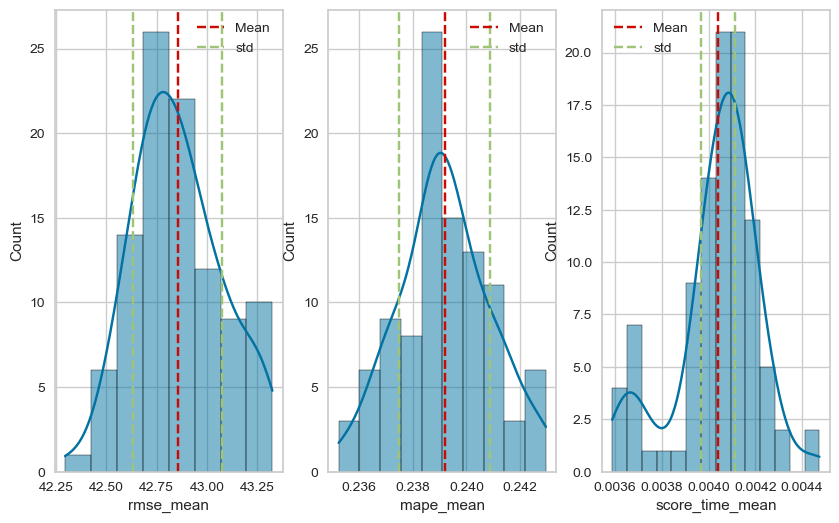

In [965]:
visializ_final_anal_model(df_rand_st_metric_lgbm_genr_cluster_pca_like, lgbm_genr_cluster_pca_like_final_analize_dic)

### Gradient Boosting

In [967]:
space_gradient_boosting = {
    'learning_rate': hp.loguniform('learning_rate', -1.3093, -1.22077),
    'n_estimators': hp.quniform('n_estimators', 40, 85, 1),
}

In [969]:
dict_tun_hyper = tune_hyperpar_anneal(GradientBoostingRegressor, space_gradient_boosting, X_train_genr_cluster_pca_like, y_train_genr_cluster_pca_like, ['n_estimators'])

100%|█████████| 150/150 [00:40<00:00,  3.75trial/s, best loss: 46.4875656840261]


In [971]:
best_grad_boost_genr_cluster_pca_like = dict_tun_hyper['best']
best_grad_boost_genr_cluster_pca_like

{'learning_rate': 0.2764371002194194, 'n_estimators': 66.0}

In [973]:
trials_grad_boost_genr_cluster_pca_like = dict_tun_hyper['trials']

#### How hyperparameters are set

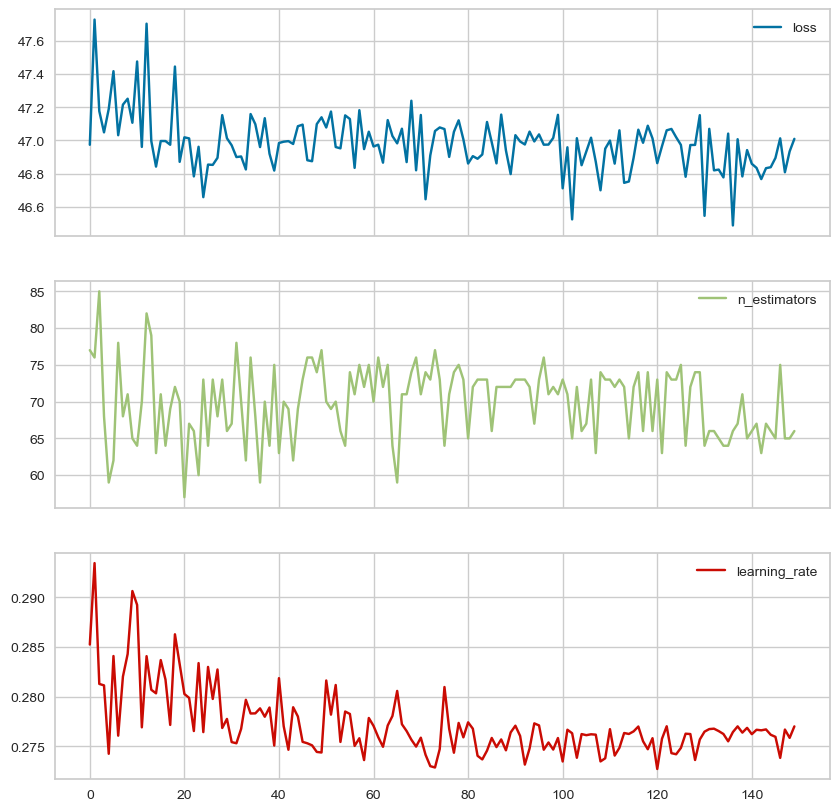

In [976]:
visual_tune_hyperpar(['n_estimators', 'learning_rate'], trials_grad_boost_genr_cluster_pca_like)

#### Fit the model

In [978]:
model_grad_boost_genr_cluster_pca_like = GradientBoostingRegressor(random_state=random_state, n_estimators = 50, learning_rate = 0.2893, n_iter_no_change = 5)

In [980]:
model_grad_boost_genr_cluster_pca_like.fit(X_train_genr_cluster_pca_like, y_train_genr_cluster_pca_like)

GradientBoostingRegressor(learning_rate=0.2893, n_estimators=50,
                          n_iter_no_change=5, random_state=42)

In [982]:
root_mean_squared_error(y_valid_genr_cluster_pca_like, model_grad_boost_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

44.81100775034784

In [984]:
mean_absolute_percentage_error(y_valid_genr_cluster_pca_like, model_grad_boost_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

0.2636298050713012

In [986]:
model_grad_boost_genr_cluster_pca_like.n_estimators_

39

In [988]:
train_errors = {'rmse':[], 'mape': []}
valid_errors = {'rmse':[], 'mape': []}

for y_pred in model_grad_boost_genr_cluster_pca_like.staged_predict(X_train_genr_cluster_pca_like):
    train_errors['rmse'].append(root_mean_squared_error(y_train_genr_cluster_pca_like, y_pred))
    train_errors['mape'].append(mean_absolute_percentage_error(y_train_genr_cluster_pca_like, y_pred))
    
for y_pred in model_grad_boost_genr_cluster_pca_like.staged_predict(X_valid_genr_cluster_pca_like):
    valid_errors['rmse'].append(root_mean_squared_error(y_valid_genr_cluster_pca_like, y_pred))
    valid_errors['mape'].append(mean_absolute_percentage_error(y_valid_genr_cluster_pca_like, y_pred))

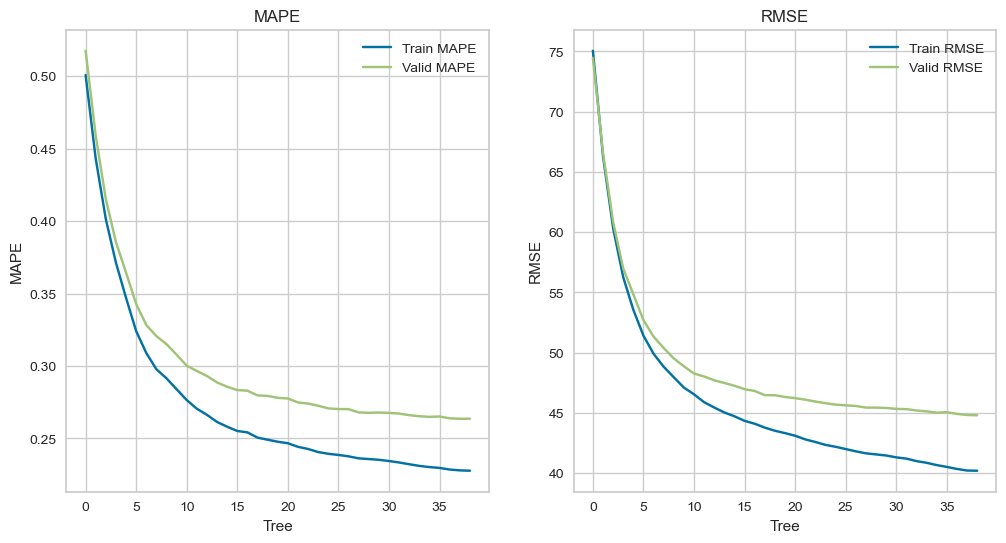

In [990]:
vizual_train_model(train_errors, valid_errors)

#### Get distribution of absolute errors

In [1220]:
distr_abs_err_grad_boost_genr_cluster_pca_like = pd.DataFrame(np.absolute(model_grad_boost_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like) - y_valid_genr_cluster_pca_like)).rename(columns = {'gross': 'grad_boost_genr_cluster_pca_like'})

In [1222]:
distr_abs_err_grad_boost_genr_cluster_pca_like = distr_abs_err_grad_boost_genr_cluster_pca_like.reset_index()

In [1224]:
distr_abs_err_grad_boost_genr_cluster_pca_like

index  grad_boost_genr_cluster_pca_like
0     1076                         34.631668
1      358                        210.312734
2     2408                         50.824058
3     4074                         33.854661
4     2998                         12.490557
..     ...                               ...
789   3247                         19.023922
790   1175                         12.223590
791    588                         69.147870
792   3145                         58.541127
793   3339                          0.438561

[794 rows x 2 columns]

In [1226]:
distr_abs_err_grad_boost_genr_cluster_pca_like.to_csv('distr_abs_err_grad_boost_genr_cluster_pca_like.csv')

#### Check stability of the model using random state

##### Preparing parametres of the model

In [994]:
param_grad_boost_genr_cluster_pca_like = model_grad_boost_genr_cluster_pca_like.get_params()

In [996]:
param_grad_boost_genr_cluster_pca_like

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2893,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': 5,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [998]:
param_grad_boost_genr_cluster_pca_like.pop('random_state')

42

##### stability of the model on each random_state

In [1001]:
df_rand_st_metric_grad_boost_genr_cluster_pca_like= metrics_diff_random_state(GradientBoostingRegressor, param_model = param_grad_boost_genr_cluster_pca_like)

In [1003]:
df_rand_st_metric_grad_boost_genr_cluster_pca_like

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  43.445029  1.597792   0.244458  0.014664         0.003535   
1            115  44.402485  1.027481   0.249970  0.004130         0.003142   
2             26  44.336285  0.868234   0.250194  0.019689         0.002705   
3            760  43.888819  1.289274   0.251087  0.010158         0.002972   
4            282  44.020516  1.369473   0.246481  0.015230         0.002663   
..           ...        ...       ...        ...       ...              ...   
95           167  44.024902  0.552282   0.247993  0.014863         0.003308   
96           380  44.866254  2.439032   0.253923  0.015092         0.003646   
97           364  43.905794  0.793179   0.250033  0.013125         0.003385   
98           215  43.649325  1.531066   0.246555  0.008326         0.003346   
99           687  44.334925  0.758267   0.248038  0.017372         0.003234   

    score_time_std  
0         0.000338  
1         0.000249  
2         0.000181  
3         0.000389  
4         0.000081  
..             ...  
95        0.000063  
96        0.000650  
97        0.000453  
98        0.000436  
99        0.000347  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [1006]:
grad_boost_genr_cluster_pca_like_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_grad_boost_genr_cluster_pca_like)

In [1008]:
grad_boost_genr_cluster_pca_like_final_analize_dic

{'rmse_mean': 44.14344192351698,
 'rmse_std': 0.3090108938095338,
 'mape_mean': 0.24933903977909572,
 'mape_std': 0.0024630639340275187,
 'score_time_mean': 0.00359385347366333,
 'score_time_std': 0.0011039055914246392}

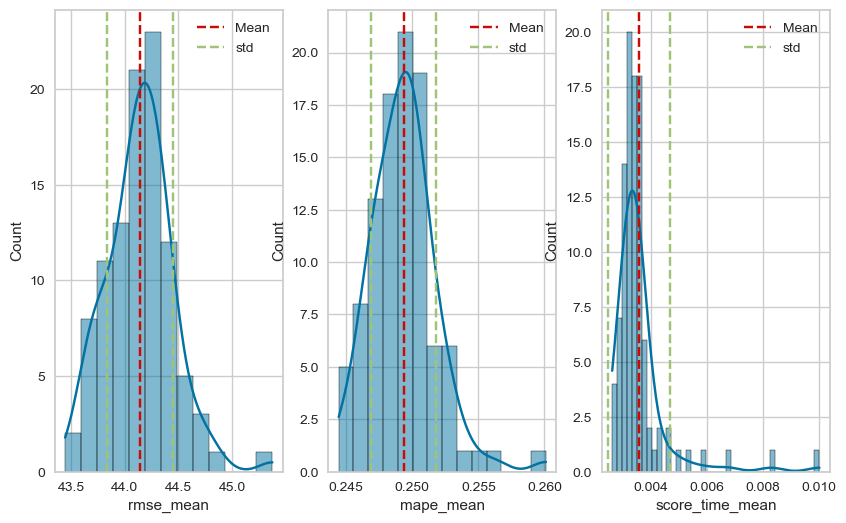

In [1010]:
visializ_final_anal_model(df_rand_st_metric_grad_boost_genr_cluster_pca_like, grad_boost_genr_cluster_pca_like_final_analize_dic)

### Polinomial regression

#### Fit the model

In [1012]:
model_pol_reg_genr_cluster_pca_like= make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha = 30))

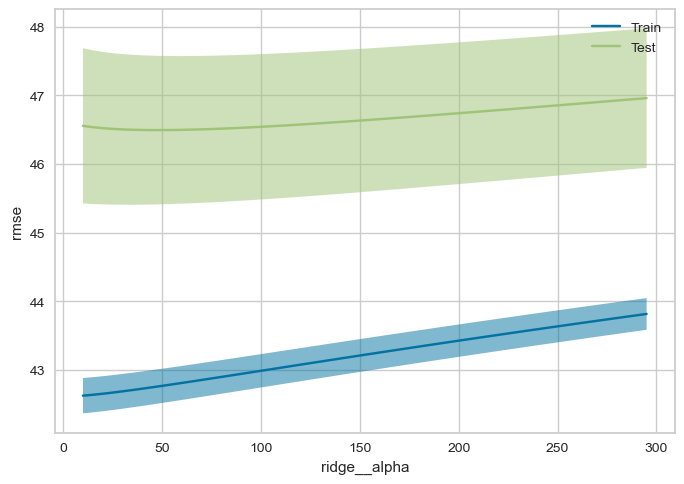

In [1014]:
ValidationCurveDisplay.from_estimator(model_pol_reg_genr_cluster_pca_like, 
                                      X = df_film_genr_cluster_pca_like.drop('gross', axis = 1), 
                                      y = df_film_genr_cluster_pca_like['gross'], 
                                      param_name='ridge__alpha', 
                                      param_range = np.arange(10, 300, 5), 
                                      scoring = 'neg_root_mean_squared_error', 
                                      score_name = 'rmse', 
                                      cv = KFold(n_splits=5, random_state=42, shuffle = True),
                                      negate_score = True)

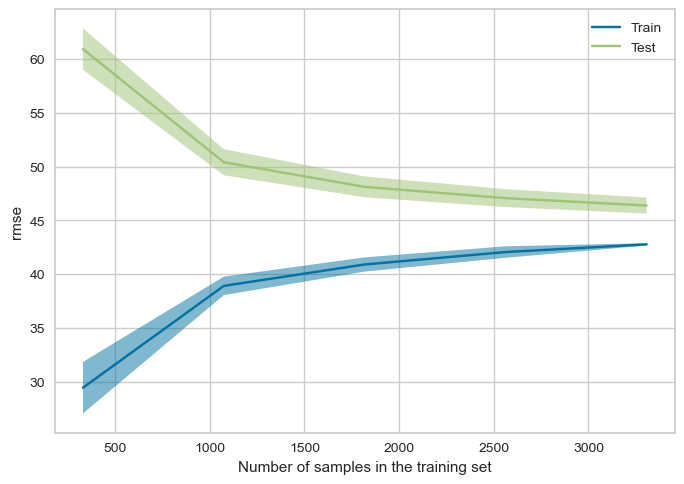

In [1016]:
LearningCurveDisplay.from_estimator(model_pol_reg_genr_cluster_pca_like, X = df_film_genr_cluster_pca_like.drop('gross', axis = 1),  
                                    y = df_film_genr_cluster_pca_like['gross'], scoring = 'neg_root_mean_squared_error', 
                                    score_name = 'rmse', cv = KFold(n_splits=6, random_state=42, shuffle = True), random_state=42, shuffle = True, negate_score = True)

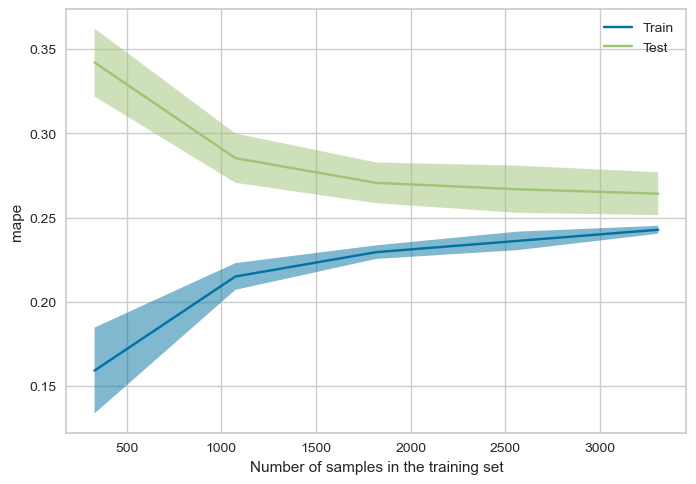

In [1018]:
LearningCurveDisplay.from_estimator(model_pol_reg_genr_cluster_pca_like, X = df_film_genr_cluster_pca_like.drop('gross', axis = 1),  
                                    y = df_film_genr_cluster_pca_like['gross'], scoring = 'neg_mean_absolute_percentage_error', 
                                    score_name = 'mape', cv = KFold(n_splits=6, random_state=42, shuffle = True), random_state=42, shuffle = True, negate_score = True)

In [1020]:
model_pol_reg_genr_cluster_pca_like.fit(X_train_genr_cluster_pca_like, y_train_genr_cluster_pca_like)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=30))])

In [1022]:
root_mean_squared_error(y_valid_genr_cluster_pca_like, model_pol_reg_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

46.10798683075149

In [1024]:
mean_absolute_percentage_error(y_valid_genr_cluster_pca_like, model_pol_reg_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like))

0.2595830141417867

#### Get distribution of absolute errors

In [1246]:
distr_abs_err_pol_reg_genr_cluster_pca_like = pd.DataFrame({'pol_reg_genr_cluster_pca_like':np.absolute(model_pol_reg_genr_cluster_pca_like.predict(X_valid_genr_cluster_pca_like) - y_valid_genr_cluster_pca_like),
                                                           'y_valid': y_valid_genr_cluster_pca_like})

In [1250]:
distr_abs_err_pol_reg_genr_cluster_pca_like = distr_abs_err_pol_reg_genr_cluster_pca_like.reset_index()

In [1252]:
distr_abs_err_pol_reg_genr_cluster_pca_like

index  pol_reg_genr_cluster_pca_like     y_valid
0     1076                      35.804484  149.063460
1      358                     195.518211   41.968859
2     2408                      76.288322  268.270337
3     4074                      60.170238   82.683840
4     2998                       4.340422  164.069133
..     ...                            ...         ...
789   3247                      38.850536  134.777887
790   1175                       1.711350  264.889726
791    588                      49.901858  193.310665
792   3145                      42.780320  215.748207
793   3339                      12.529086  180.286421

[794 rows x 3 columns]

In [1254]:
distr_abs_err_pol_reg_genr_cluster_pca_like.to_csv('distr_abs_err_pol_reg_genr_cluster_pca_like.csv')

#### Check stability of the model using random state

##### stability of the model on each random_state

In [1028]:
df_rand_st_metric_pol_reg_genr_cluster_pca_like = metrics_diff_random_state(name_model = model_pol_reg_genr_cluster_pca_like, pipeline_bool = True)

In [1029]:
df_rand_st_metric_pol_reg_genr_cluster_pca_like

random_state  rmse_mean  rmse_std  mape_mean  mape_std  score_time_mean  \
0            655  49.012169  2.768636   0.266845  0.023799         0.006950   
1            115  49.322533  1.954472   0.269012  0.008638         0.008011   
2             26  49.634153  1.966373   0.272037  0.021469         0.006241   
3            760  49.156237  2.258751   0.269276  0.009717         0.006678   
4            282  49.500544  0.932726   0.270407  0.014972         0.006261   
..           ...        ...       ...        ...       ...              ...   
95           167  49.203361  1.273662   0.268231  0.011231         0.007515   
96           380  49.685678  1.255844   0.272518  0.015070         0.007659   
97           364  49.439505  1.715856   0.273743  0.017793         0.008161   
98           215  48.454032  0.831939   0.264187  0.011666         0.007675   
99           687  48.847130  1.284701   0.267118  0.021610         0.008112   

    score_time_std  
0         0.000918  
1         0.001823  
2         0.000556  
3         0.001016  
4         0.000650  
..             ...  
95        0.000264  
96        0.000382  
97        0.001470  
98        0.000595  
99        0.001602  

[100 rows x 7 columns]

##### stability of the model on all random_state

In [1033]:
pol_reg_genr_cluster_pca_like_final_analize_dic = create_dic_final_analize_model(df_rand_st_metric_pol_reg_genr_cluster_pca_like)

In [1035]:
pol_reg_genr_cluster_pca_like_final_analize_dic

{'rmse_mean': 49.38667191004566,
 'rmse_std': 0.4379224861100825,
 'mape_mean': 0.27082533544435866,
 'mape_std': 0.002717665762892187,
 'score_time_mean': 0.007624374866485597,
 'score_time_std': 0.000542457717705077}

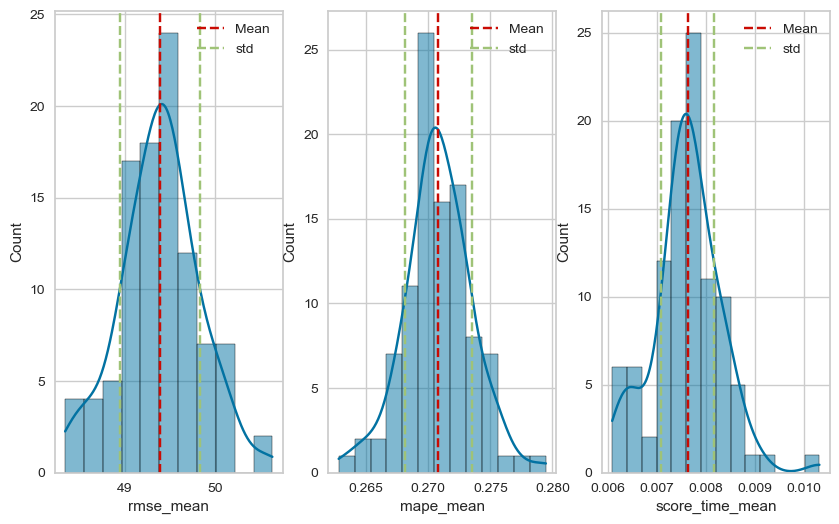

In [1037]:
visializ_final_anal_model(df_rand_st_metric_pol_reg_genr_cluster_pca_like, pol_reg_genr_cluster_pca_like_final_analize_dic)

### Analyze the result of models (by different random state)

In [1040]:
genr_cluster_pca_like_all_model_dic = {'XGBoost': xgb_genr_cluster_pca_like_final_analize_dic, 'LightGBM': lgbm_genr_cluster_pca_like_final_analize_dic, 'Gradient_Boosting': grad_boost_genr_cluster_pca_like_final_analize_dic, 'Polynomial_regression ': pol_reg_genr_cluster_pca_like_final_analize_dic}

In [1042]:
genr_cluster_pca_like_all_model_df=pd.DataFrame.from_dict(genr_cluster_pca_like_all_model_dic, orient='index')

In [1044]:
genr_cluster_pca_like_all_model_df.index = pd.MultiIndex.from_product([['Genr_cluster_pca_like'], genr_cluster_pca_like_all_model_df.index], names=['DataFrame', 'Model'])

In [1046]:
genr_cluster_pca_like_all_model_df

rmse_mean  rmse_std  mape_mean  \
DataFrame             Model                                                    
Genr_cluster_pca_like XGBoost                 43.498525  0.207383   0.243918   
                      LightGBM                42.853276  0.219543   0.239187   
                      Gradient_Boosting       44.143442  0.309011   0.249339   
                      Polynomial_regression   49.386672  0.437922   0.270825   

                                              mape_std  score_time_mean  \
DataFrame             Model                                               
Genr_cluster_pca_like XGBoost                 0.001699         0.012026   
                      LightGBM                0.001686         0.004040   
                      Gradient_Boosting       0.002463         0.003594   
                      Polynomial_regression   0.002718         0.007624   

                                              score_time_std  
DataFrame             Model                                   
Genr_cluster_pca_like XGBoost                       0.000760  
                      LightGBM                      0.000074  
                      Gradient_Boosting             0.001104  
                      Polynomial_regression         0.000542

In [1048]:
genr_cluster_pca_like_all_model_df.to_csv('genr_cluster_pca_like_all_model.csv')

## Figure out outliers for all models

<Axes: xlabel='gross', ylabel='Count'>

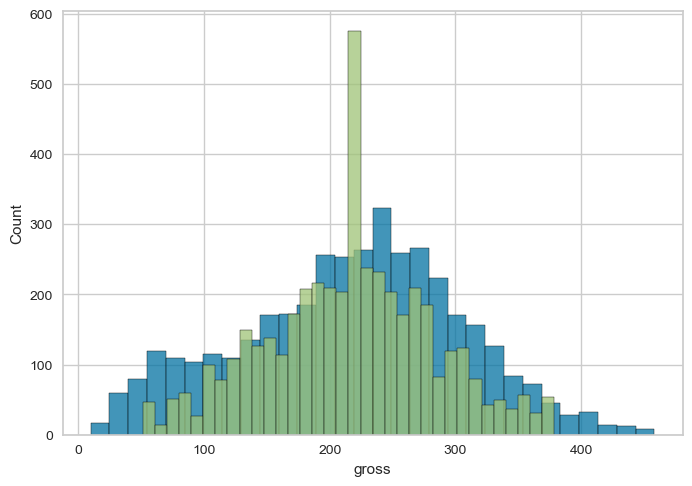

In [1280]:
sns.histplot(df_film['gross'])
sns.histplot(df_film['budget'])

In [1286]:
df_film.loc[[358, 3997, 1254, 2919, 2297, 1929, 1436, 2212, 1769, 2500, 3823], ['gross', 'budget', 'movie_imdb_link']]

gross      budget  \
358    41.968859  311.960062   
3997   30.508799  128.671022   
1254   93.038446  255.762100   
2919  293.421714  183.486311   
2297   47.946491  211.286600   
1929   38.999779  226.357573   
1436   68.078851  247.731843   
2212  107.677850  216.688342   
1769   87.147981  238.769499   
2500  158.991208  202.249268   
3823  135.742861  137.232973   

                                        movie_imdb_link  
358   http://www.imdb.com/title/tt0266987/?ref_=fn_t...  
3997  http://www.imdb.com/title/tt0040525/?ref_=fn_t...  
1254  http://www.imdb.com/title/tt0457495/?ref_=fn_t...  
2919  http://www.imdb.com/title/tt4094724/?ref_=fn_t...  
2297  http://www.imdb.com/title/tt0081398/?ref_=fn_t...  
1929  http://www.imdb.com/title/tt0238948/?ref_=fn_t...  
1436  http://www.imdb.com/title/tt1656186/?ref_=fn_t...  
2212  http://www.imdb.com/title/tt0238380/?ref_=fn_t...  
1769  http://www.imdb.com/title/tt0335345/?ref_=fn_t...  
2500  http://www.imdb.com/title/tt0056172/?ref_=fn_t...  
3823  http://www.imdb.com/title/tt3367294/?ref_=fn_t...

In [1294]:
df_film.iloc[[358, 3997, 1254, 2919, 2297, 1929, 1436, 2212, 1769, 2500, 3823],:]

color    director_name  num_critic_for_reviews  duration  \
358       1       Tony Scott                4.962845     114.0   
3997      0     Orson Welles                4.510860      92.0   
1254      1     Geoffrey Sax                4.204693      93.0   
2919      1   James DeMonaco                5.111988     109.0   
2297      0  Martin Scorsese                5.023881     121.0   
1929      1     George Gallo                3.828641      88.0   
1436      1       Simon West                4.595120      96.0   
2212      1      Kurt Wimmer                4.990433     107.0   
1769      1       Mel Gibson                6.008813     120.0   
2500      1       David Lean                5.204007     154.0   
3823      1    Enrique Begne                2.322227     101.0   

      director_facebook_likes  actor_3_facebook_likes         actor_2_name  \
358                  8.820456               -0.193363      Stephen Dillane   
3997                 0.000000               -1.586862       Everett Sloane   
1254                 2.592501               -0.598629       Sophie Okonedo   
2919                 4.073129                0.013692  Joseph Julian Soria   
2297                 9.126456               -0.079265       Cathy Moriarty   
1929                 5.391661               -0.011407        Eddie Griffin   
1436                 4.939222                0.455395          Mark Valley   
2212                 4.562633                0.850733         Emily Watson   
1769                 0.000000               -0.821027     Maia Morgenstern   
2500                 6.353956               -0.961322          José Ferrer   
3823                 0.000000               -0.623465       Héctor Jiménez   

      actor_1_facebook_likes       gross    actor_1_name  ... War  Western  \
358                 0.618093   41.968859       Brad Pitt  ...   0        0   
3997                0.072778   30.508799   Rita Hayworth  ...   0        0   
1254                1.015875   93.038446   Alex Pettyfer  ...   0        0   
2919               -0.438237  293.421714    Frank Grillo  ...   0        0   
2297                1.466989   47.946491  Robert De Niro  ...   0        0   
1929                0.072778   38.999779  Daniel Roebuck  ...   0        0   
1436                0.735389   68.078851    Nicolas Cage  ...   0        0   
2212                1.581728  107.677850  Christian Bale  ...   0        0   
1769               -1.391720   87.147981  Christo Jivkov  ...   0        0   
2500               -0.767684  158.991208    Claude Rains  ...   1        0   
3823               -0.840767  135.742861    Kevin Pollak  ...   0        0   

      genre_aver_bud_aver_freq genre_low_bud_low_freq  \
358                          1                      0   
3997                         0                      0   
1254                         1                      0   
2919                         1                      0   
2297                         0                      0   
1929                         1                      0   
1436                         1                      0   
2212                         1                      0   
1769                         0                      0   
2500                         1                      0   
3823                         1                      0   

     genre_high_bud_aver_freq  genre_aver_bud_high_freq  \
358                         1                         0   
3997                        1                         1   
1254                        1                         0   
2919                        1                         0   
2297                        1                         1   
1929                        1                         1   
1436                        1                         1   
2212                        1                         1   
1769                        0                         1   
2500                        1                         1   
3823 

In [ ]:
### Conclusion: outliers for all models are movies which have gross and budget with significant differences